In [ ]:
import torch
import pandas as pd
from ultralytics import YOLO
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device} -> {torch.cuda.get_device_name(0)}')

Using device: cuda -> NVIDIA GeForce RTX 3090


TRAINING AND VALIDATION

In [3]:
epochs = 500
imgsize_base = 64
imgsize_affectnet = 128
batchsize = 160

In [4]:
project_dir = '../data'
images_dir = '../data/images'
affectnet_dir = '../data/affectnet'

base_name_n = 'images_classifier_nano/train'
model_n = YOLO('yolov8m-cls.pt')
model_n.to(device)

base_name_m = 'images_classifier_medium/train'
model_m = YOLO('yolov8m-cls.pt')
model_m.to(device)

base_name_x = 'images_classifier_large/train'
model_x = YOLO('yolov8x-cls.pt')
model_x.to(device)

affectnet_name_n = 'affectnet_classifier_nano/train'
model_affectnet_n = YOLO('yolov8m-cls.pt')
model_affectnet_n.to(device)

affectnet_name_m = 'affectnet_classifier_medium/train'
model_affectnet_m = YOLO('yolov8m-cls.pt')
model_affectnet_m.to(device)

affectnet_name_x = 'affectnet_classifier_large/train'
model_affectnet_x = YOLO('yolov8x-cls.pt')
model_affectnet_x.to(device)

YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 80, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(400, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(160, eps=1e-05, momentum=0.1, affine=True, track_

In [5]:
model_n.train(data=images_dir,
              epochs=epochs,
              imgsz=imgsize_base,
              batch=batchsize,
              device=device,
              project=project_dir,
              name=base_name_n,
              plots=True)

model_m.train(data=images_dir,
              epochs=epochs,
              imgsz=imgsize_base,
              batch=batchsize,
              device=device,
              project=project_dir,
              name=base_name_m,
              plots=True)

model_x.train(data=images_dir,
              epochs=epochs,
              imgsz=imgsize_base,
              batch=batchsize,
              device=device,
              project=project_dir,
              name=base_name_x,
              plots=True)

model_affectnet_n.train(data=affectnet_dir,
                        epochs=epochs,
                        imgsz=imgsize_affectnet,
                        batch=batchsize,
                        device=device,
                        project=project_dir,
                        name=affectnet_name_n,
                        plots=True)

model_affectnet_m.train(data=affectnet_dir,
                        epochs=epochs,
                        imgsz=imgsize_affectnet,
                        batch=batchsize,
                        device=device,
                        project=project_dir,
                        name=affectnet_name_m,
                        plots=True)

model_affectnet_x.train(data=affectnet_dir,
                        epochs=epochs,
                        imgsz=imgsize_affectnet,
                        batch=batchsize,
                        device=device,
                        project=project_dir,
                        name=affectnet_name_x,
                        plots=True)

New https://pypi.org/project/ultralytics/8.2.41 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.38  Python-3.11.9 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=../data/images, epochs=500, time=None, patience=100, batch=160, imgsz=64, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=../data, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

train: Scanning C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\images\train... 28821 images, 0 corrupt: 100%|██████████| 28821/28821 [00:00<?, ?it/s]
val: Scanning C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\images\validation... 7066 images, 0 corrupt: 100%|██████████| 7066/7066 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.00125), 39 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 64 train, 64 val
Using 8 dataloader workers
Logging results to ..\data\images_classifier_nano\train
Starting training for 500 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/500      1.55G      1.847         21         64: 100%|██████████| 181/181 [00:06<00:00, 28.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 79.31it/s]

                   all      0.329      0.918



      Epoch    GPU_mem       loss  Instances       Size


      2/500      1.53G      1.677         21         64: 100%|██████████| 181/181 [00:06<00:00, 29.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.42it/s]

                   all      0.371       0.93



      Epoch    GPU_mem       loss  Instances       Size


      3/500      1.54G      1.579         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.94it/s]

                   all      0.466       0.96



      Epoch    GPU_mem       loss  Instances       Size


      4/500      1.52G      1.432         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.57it/s]

                   all      0.527      0.974



      Epoch    GPU_mem       loss  Instances       Size


      5/500      1.53G      1.297         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.42it/s]

                   all      0.557       0.98



      Epoch    GPU_mem       loss  Instances       Size


      6/500      1.53G      1.228         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.15it/s]

                   all      0.583      0.982



      Epoch    GPU_mem       loss  Instances       Size


      7/500      1.55G      1.179         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 102.61it/s]

                   all      0.597      0.985



      Epoch    GPU_mem       loss  Instances       Size


      8/500      1.54G      1.148         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.35it/s]

                   all      0.608      0.986



      Epoch    GPU_mem       loss  Instances       Size


      9/500      1.54G      1.108         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.76it/s]

                   all      0.624      0.988



      Epoch    GPU_mem       loss  Instances       Size


     10/500      1.53G      1.083         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.92it/s]

                   all      0.622      0.988



      Epoch    GPU_mem       loss  Instances       Size


     11/500      1.56G      1.058         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.17it/s]

                   all       0.63      0.987



      Epoch    GPU_mem       loss  Instances       Size


     12/500      1.51G      1.042         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.00it/s]

                   all       0.64      0.989



      Epoch    GPU_mem       loss  Instances       Size


     13/500      1.53G      1.029         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.65it/s]

                   all      0.642       0.99



      Epoch    GPU_mem       loss  Instances       Size


     14/500      1.56G      1.005         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.11it/s]

                   all      0.646      0.989



      Epoch    GPU_mem       loss  Instances       Size


     15/500      1.51G     0.9968         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.88it/s]

                   all      0.647      0.989



      Epoch    GPU_mem       loss  Instances       Size


     16/500      1.53G     0.9839         21         64: 100%|██████████| 181/181 [00:06<00:00, 28.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 95.56it/s]

                   all      0.647      0.988



      Epoch    GPU_mem       loss  Instances       Size


     17/500      1.53G     0.9675         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 82.57it/s]

                   all      0.651      0.989



      Epoch    GPU_mem       loss  Instances       Size


     18/500      1.52G     0.9558         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.39it/s]

                   all      0.654      0.986



      Epoch    GPU_mem       loss  Instances       Size


     19/500      1.53G     0.9485         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.21it/s]

                   all      0.655       0.99



      Epoch    GPU_mem       loss  Instances       Size


     20/500      1.56G     0.9447         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.98it/s]

                   all      0.658      0.988



      Epoch    GPU_mem       loss  Instances       Size


     21/500      1.56G      0.933         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.36it/s]

                   all      0.662      0.988



      Epoch    GPU_mem       loss  Instances       Size


     22/500      1.51G     0.9198         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.67it/s]

                   all      0.664      0.989



      Epoch    GPU_mem       loss  Instances       Size


     23/500      1.53G     0.9178         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.02it/s]

                   all      0.656      0.988



      Epoch    GPU_mem       loss  Instances       Size


     24/500      1.56G     0.9107         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.84it/s]

                   all      0.667      0.989



      Epoch    GPU_mem       loss  Instances       Size


     25/500      1.51G     0.9064         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.56it/s]

                   all       0.66      0.989



      Epoch    GPU_mem       loss  Instances       Size


     26/500      1.53G     0.9034         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.88it/s]

                   all      0.666      0.989



      Epoch    GPU_mem       loss  Instances       Size


     27/500      1.53G     0.8996         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.75it/s]

                   all       0.67      0.989



      Epoch    GPU_mem       loss  Instances       Size


     28/500      1.52G     0.8895         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.61it/s]

                   all      0.666      0.989



      Epoch    GPU_mem       loss  Instances       Size


     29/500      1.53G      0.886         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.38it/s]

                   all      0.671       0.99



      Epoch    GPU_mem       loss  Instances       Size


     30/500      1.56G     0.8795         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.98it/s]

                   all      0.668      0.991



      Epoch    GPU_mem       loss  Instances       Size


     31/500      1.56G     0.8794         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.79it/s]

                   all       0.67      0.988



      Epoch    GPU_mem       loss  Instances       Size


     32/500      1.51G     0.8763         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.23it/s]

                   all      0.672      0.988



      Epoch    GPU_mem       loss  Instances       Size


     33/500      1.53G     0.8791         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.97it/s]

                   all      0.673      0.989



      Epoch    GPU_mem       loss  Instances       Size


     34/500      1.56G     0.8778         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.01it/s]

                   all      0.677       0.99



      Epoch    GPU_mem       loss  Instances       Size


     35/500      1.51G     0.8765         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.30it/s]

                   all      0.679      0.989



      Epoch    GPU_mem       loss  Instances       Size


     36/500      1.53G     0.8766         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.42it/s]

                   all      0.681      0.989



      Epoch    GPU_mem       loss  Instances       Size


     37/500      1.53G     0.8615         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.68it/s]

                   all       0.68      0.989



      Epoch    GPU_mem       loss  Instances       Size


     38/500      1.52G     0.8707         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.62it/s]

                   all      0.679       0.99



      Epoch    GPU_mem       loss  Instances       Size


     39/500      1.53G     0.8748         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.15it/s]

                   all      0.685       0.99



      Epoch    GPU_mem       loss  Instances       Size


     40/500      1.56G     0.8737         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.20it/s]

                   all      0.685       0.99



      Epoch    GPU_mem       loss  Instances       Size


     41/500      1.56G     0.8795         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.26it/s]

                   all      0.682       0.99



      Epoch    GPU_mem       loss  Instances       Size


     42/500      1.51G     0.8727         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.49it/s]

                   all      0.693      0.989



      Epoch    GPU_mem       loss  Instances       Size


     43/500      1.53G      0.867         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.75it/s]

                   all      0.685       0.99



      Epoch    GPU_mem       loss  Instances       Size


     44/500      1.56G     0.8683         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.44it/s]

                   all      0.688      0.989



      Epoch    GPU_mem       loss  Instances       Size


     45/500      1.51G     0.8707         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.63it/s]

                   all       0.69      0.989



      Epoch    GPU_mem       loss  Instances       Size


     46/500      1.53G     0.8625         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.77it/s]

                   all      0.687      0.989



      Epoch    GPU_mem       loss  Instances       Size


     47/500      1.53G     0.8643         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.32it/s]

                   all       0.69       0.99



      Epoch    GPU_mem       loss  Instances       Size


     48/500      1.52G     0.8718         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.10it/s]

                   all       0.69      0.991



      Epoch    GPU_mem       loss  Instances       Size


     49/500      1.53G     0.8672         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.52it/s]

                   all      0.694      0.991



      Epoch    GPU_mem       loss  Instances       Size


     50/500      1.56G     0.8578         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.59it/s]

                   all      0.695       0.99



      Epoch    GPU_mem       loss  Instances       Size


     51/500      1.55G     0.8693         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.67it/s]

                   all      0.696       0.99



      Epoch    GPU_mem       loss  Instances       Size


     52/500      1.51G     0.8684         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 94.28it/s]

                   all      0.696       0.99



      Epoch    GPU_mem       loss  Instances       Size


     53/500      1.53G     0.8659         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 94.02it/s]

                   all        0.7       0.99



      Epoch    GPU_mem       loss  Instances       Size


     54/500      1.56G     0.8704         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 87.24it/s]

                   all      0.696      0.989



      Epoch    GPU_mem       loss  Instances       Size


     55/500      1.51G     0.8674         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.15it/s]

                   all      0.695       0.99



      Epoch    GPU_mem       loss  Instances       Size


     56/500      1.53G     0.8545         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.14it/s]

                   all      0.691      0.991



      Epoch    GPU_mem       loss  Instances       Size


     57/500      1.53G     0.8605         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.64it/s]

                   all      0.694      0.991



      Epoch    GPU_mem       loss  Instances       Size


     58/500      1.52G     0.8596         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.84it/s]

                   all      0.698       0.99



      Epoch    GPU_mem       loss  Instances       Size


     59/500      1.53G      0.865         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.46it/s]

                   all      0.696      0.991



      Epoch    GPU_mem       loss  Instances       Size


     60/500      1.56G     0.8508         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.98it/s]

                   all        0.7      0.991



      Epoch    GPU_mem       loss  Instances       Size


     61/500      1.55G     0.8462         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.92it/s]

                   all      0.699      0.991



      Epoch    GPU_mem       loss  Instances       Size


     62/500      1.51G     0.8522         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.58it/s]

                   all      0.702      0.991



      Epoch    GPU_mem       loss  Instances       Size


     63/500      1.53G     0.8468         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.68it/s]

                   all      0.705      0.991



      Epoch    GPU_mem       loss  Instances       Size


     64/500      1.56G     0.8566         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.65it/s]

                   all      0.703      0.991



      Epoch    GPU_mem       loss  Instances       Size


     65/500      1.51G     0.8467         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.62it/s]

                   all      0.703      0.991



      Epoch    GPU_mem       loss  Instances       Size


     66/500      1.53G     0.8533         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.82it/s]

                   all      0.703      0.991



      Epoch    GPU_mem       loss  Instances       Size


     67/500      1.53G     0.8473         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.15it/s]

                   all      0.708      0.991



      Epoch    GPU_mem       loss  Instances       Size


     68/500      1.52G     0.8485         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.13it/s]

                   all      0.705      0.992



      Epoch    GPU_mem       loss  Instances       Size


     69/500      1.53G     0.8434         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.69it/s]

                   all      0.704      0.991



      Epoch    GPU_mem       loss  Instances       Size


     70/500      1.56G     0.8464         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.02it/s]

                   all      0.706      0.991



      Epoch    GPU_mem       loss  Instances       Size


     71/500      1.56G     0.8405         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 86.90it/s]

                   all      0.706      0.991



      Epoch    GPU_mem       loss  Instances       Size


     72/500      1.51G     0.8352         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.79it/s]

                   all      0.708      0.991



      Epoch    GPU_mem       loss  Instances       Size


     73/500      1.53G     0.8399         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.68it/s]

                   all      0.709      0.991



      Epoch    GPU_mem       loss  Instances       Size


     74/500      1.56G     0.8301         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.94it/s]

                   all      0.709       0.99



      Epoch    GPU_mem       loss  Instances       Size


     75/500      1.51G      0.825         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.19it/s]

                   all      0.711      0.991



      Epoch    GPU_mem       loss  Instances       Size


     76/500      1.53G      0.834         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.85it/s]

                   all      0.711       0.99



      Epoch    GPU_mem       loss  Instances       Size


     77/500      1.53G     0.8331         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.59it/s]

                   all       0.71      0.991



      Epoch    GPU_mem       loss  Instances       Size


     78/500      1.52G     0.8293         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.73it/s]

                   all      0.713       0.99



      Epoch    GPU_mem       loss  Instances       Size


     79/500      1.53G     0.8305         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.84it/s]

                   all      0.711       0.99



      Epoch    GPU_mem       loss  Instances       Size


     80/500      1.56G     0.8334         21         64: 100%|██████████| 181/181 [00:06<00:00, 27.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.76it/s]

                   all       0.71       0.99



      Epoch    GPU_mem       loss  Instances       Size


     81/500      1.56G     0.8277         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.08it/s]

                   all      0.709       0.99



      Epoch    GPU_mem       loss  Instances       Size


     82/500      1.51G     0.8185         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.23it/s]

                   all      0.712      0.991



      Epoch    GPU_mem       loss  Instances       Size


     83/500      1.53G     0.8176         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.84it/s]

                   all      0.712      0.991



      Epoch    GPU_mem       loss  Instances       Size


     84/500      1.56G     0.8198         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.87it/s]

                   all      0.712      0.991



      Epoch    GPU_mem       loss  Instances       Size


     85/500      1.51G     0.8061         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.23it/s]

                   all      0.714      0.991



      Epoch    GPU_mem       loss  Instances       Size


     86/500      1.53G     0.8154         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.03it/s]

                   all      0.713       0.99



      Epoch    GPU_mem       loss  Instances       Size


     87/500      1.53G     0.8202         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.04it/s]

                   all      0.711       0.99



      Epoch    GPU_mem       loss  Instances       Size


     88/500      1.52G     0.8026         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.96it/s]

                   all      0.711       0.99



      Epoch    GPU_mem       loss  Instances       Size


     89/500      1.53G     0.8076         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.52it/s]

                   all      0.712       0.99



      Epoch    GPU_mem       loss  Instances       Size


     90/500      1.56G     0.7986         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.64it/s]

                   all      0.712       0.99



      Epoch    GPU_mem       loss  Instances       Size


     91/500      1.55G     0.8061         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.36it/s]

                   all      0.712       0.99



      Epoch    GPU_mem       loss  Instances       Size


     92/500      1.51G     0.7976         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 86.64it/s]

                   all      0.712       0.99



      Epoch    GPU_mem       loss  Instances       Size


     93/500      1.53G     0.7976         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.83it/s]

                   all      0.713       0.99



      Epoch    GPU_mem       loss  Instances       Size


     94/500      1.56G     0.7913         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 86.16it/s]

                   all      0.713      0.991



      Epoch    GPU_mem       loss  Instances       Size


     95/500      1.51G     0.7878         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.41it/s]

                   all      0.714      0.991



      Epoch    GPU_mem       loss  Instances       Size


     96/500      1.53G     0.7847         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.73it/s]

                   all      0.713      0.991



      Epoch    GPU_mem       loss  Instances       Size


     97/500      1.53G     0.7879         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.92it/s]

                   all      0.714      0.991



      Epoch    GPU_mem       loss  Instances       Size


     98/500      1.52G     0.7859         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 87.98it/s]

                   all      0.715      0.991



      Epoch    GPU_mem       loss  Instances       Size


     99/500      1.53G       0.78         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.52it/s]

                   all      0.714      0.991



      Epoch    GPU_mem       loss  Instances       Size


    100/500      1.56G     0.7718         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.72it/s]

                   all      0.714      0.991



      Epoch    GPU_mem       loss  Instances       Size


    101/500      1.55G     0.7754         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.74it/s]

                   all      0.715      0.991



      Epoch    GPU_mem       loss  Instances       Size


    102/500      1.51G     0.7821         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.45it/s]

                   all      0.715      0.991



      Epoch    GPU_mem       loss  Instances       Size


    103/500      1.53G     0.7654         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 87.23it/s]

                   all      0.715      0.991



      Epoch    GPU_mem       loss  Instances       Size


    104/500      1.56G     0.7779         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.09it/s]

                   all      0.714      0.991



      Epoch    GPU_mem       loss  Instances       Size


    105/500      1.51G     0.7553         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.77it/s]

                   all      0.714      0.991



      Epoch    GPU_mem       loss  Instances       Size


    106/500      1.53G     0.7594         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.73it/s]

                   all      0.714      0.991



      Epoch    GPU_mem       loss  Instances       Size


    107/500      1.53G     0.7578         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 84.65it/s]

                   all      0.713      0.991



      Epoch    GPU_mem       loss  Instances       Size


    108/500      1.52G     0.7554         21         64: 100%|██████████| 181/181 [00:07<00:00, 22.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 96.17it/s]

                   all      0.712      0.992



      Epoch    GPU_mem       loss  Instances       Size


    109/500      1.53G     0.7547         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.45it/s]

                   all      0.713      0.991



      Epoch    GPU_mem       loss  Instances       Size


    110/500      1.56G     0.7632         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 95.97it/s]

                   all      0.713      0.991



      Epoch    GPU_mem       loss  Instances       Size


    111/500      1.55G     0.7573         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.29it/s]

                   all      0.713      0.991



      Epoch    GPU_mem       loss  Instances       Size


    112/500      1.51G     0.7496         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 84.06it/s]

                   all      0.713      0.991



      Epoch    GPU_mem       loss  Instances       Size


    113/500      1.53G     0.7508         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.09it/s]

                   all      0.711      0.991



      Epoch    GPU_mem       loss  Instances       Size


    114/500      1.56G     0.7403         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 87.74it/s]

                   all      0.712      0.991



      Epoch    GPU_mem       loss  Instances       Size


    115/500      1.51G     0.7456         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.15it/s]

                   all      0.712      0.992



      Epoch    GPU_mem       loss  Instances       Size


    116/500      1.53G     0.7469         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.66it/s]

                   all      0.712      0.992



      Epoch    GPU_mem       loss  Instances       Size


    117/500      1.53G     0.7369         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.67it/s]

                   all      0.714      0.992



      Epoch    GPU_mem       loss  Instances       Size


    118/500      1.52G     0.7446         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.44it/s]

                   all      0.714      0.992



      Epoch    GPU_mem       loss  Instances       Size


    119/500      1.53G     0.7368         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.04it/s]

                   all      0.715      0.992



      Epoch    GPU_mem       loss  Instances       Size


    120/500      1.56G     0.7302         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.43it/s]

                   all      0.715      0.992



      Epoch    GPU_mem       loss  Instances       Size


    121/500      1.56G     0.7296         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.43it/s]

                   all      0.715      0.992



      Epoch    GPU_mem       loss  Instances       Size


    122/500      1.51G     0.7306         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.94it/s]

                   all      0.715      0.992



      Epoch    GPU_mem       loss  Instances       Size


    123/500      1.53G     0.7171         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.24it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    124/500      1.56G     0.7115         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.62it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    125/500      1.51G      0.713         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.79it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    126/500      1.53G     0.7187         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 86.89it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    127/500      1.52G      0.715         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.41it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    128/500      1.52G     0.7091         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.93it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    129/500      1.53G     0.7187         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.81it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    130/500      1.56G      0.706         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.39it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    131/500      1.55G     0.7092         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 87.63it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    132/500      1.51G     0.7052         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 86.68it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    133/500      1.53G     0.7036         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 87.25it/s]

                   all      0.717      0.992



      Epoch    GPU_mem       loss  Instances       Size


    134/500      1.56G     0.7014         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.94it/s]

                   all      0.717      0.992



      Epoch    GPU_mem       loss  Instances       Size


    135/500      1.51G     0.6914         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 94.16it/s]

                   all      0.717      0.992



      Epoch    GPU_mem       loss  Instances       Size


    136/500      1.53G     0.6946         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.75it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    137/500      1.53G     0.6935         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.63it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    138/500      1.52G     0.6907         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.96it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    139/500      1.53G     0.6886         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.91it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    140/500      1.56G     0.6832         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.10it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    141/500      1.56G     0.6837         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.11it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    142/500      1.51G     0.6741         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.92it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    143/500      1.53G      0.681         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 95.08it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    144/500      1.56G     0.6776         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.67it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    145/500      1.51G     0.6747         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.03it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    146/500      1.53G     0.6687         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 87.86it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    147/500      1.53G     0.6642         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.12it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    148/500      1.52G      0.663         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.27it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    149/500      1.53G     0.6703         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.85it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    150/500      1.56G     0.6629         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.41it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    151/500      1.55G      0.651         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.08it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    152/500      1.51G     0.6493         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 84.96it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    153/500      1.53G     0.6552         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.27it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    154/500      1.56G     0.6499         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.64it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    155/500      1.51G     0.6467         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.76it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    156/500      1.53G     0.6434         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.36it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    157/500      1.53G     0.6425         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 95.56it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    158/500      1.52G     0.6374         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.97it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    159/500      1.53G     0.6428         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.84it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    160/500      1.56G     0.6388         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.01it/s]

                   all      0.717      0.991



      Epoch    GPU_mem       loss  Instances       Size


    161/500      1.55G     0.6317         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.40it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    162/500      1.51G     0.6259         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 94.21it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    163/500      1.53G     0.6291         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.05it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    164/500      1.56G      0.621         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 95.58it/s]

                   all      0.717      0.991



      Epoch    GPU_mem       loss  Instances       Size


    165/500      1.51G     0.6276         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.20it/s]

                   all      0.717      0.991



      Epoch    GPU_mem       loss  Instances       Size


    166/500      1.53G     0.6284         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.21it/s]

                   all      0.717      0.991



      Epoch    GPU_mem       loss  Instances       Size


    167/500      1.53G     0.6262         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.78it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    168/500      1.52G     0.6106         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.02it/s]

                   all      0.719       0.99



      Epoch    GPU_mem       loss  Instances       Size


    169/500      1.53G     0.6142         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.54it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    170/500      1.56G     0.6127         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.53it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    171/500      1.55G     0.6114         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.44it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    172/500      1.51G     0.6057         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 84.80it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    173/500      1.53G      0.607         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 86.09it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    174/500      1.56G     0.5944         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 95.11it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    175/500      1.51G     0.5971         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.96it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    176/500      1.53G     0.6014         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.85it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


    177/500      1.53G     0.5984         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.73it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    178/500      1.52G      0.598         21         64: 100%|██████████| 181/181 [00:07<00:00, 25.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.85it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    179/500      1.53G     0.5906         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.68it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    180/500      1.56G     0.5927         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.87it/s]

                   all       0.72       0.99



      Epoch    GPU_mem       loss  Instances       Size


    181/500      1.55G     0.5833         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.61it/s]

                   all       0.72       0.99



      Epoch    GPU_mem       loss  Instances       Size


    182/500      1.51G     0.5874         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.36it/s]

                   all       0.72       0.99



      Epoch    GPU_mem       loss  Instances       Size


    183/500      1.53G     0.5773         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.63it/s]

                   all       0.72       0.99



      Epoch    GPU_mem       loss  Instances       Size


    184/500      1.56G     0.5793         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.43it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    185/500      1.51G     0.5796         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.96it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    186/500      1.53G     0.5818         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 85.07it/s]


                   all       0.72      0.991

      Epoch    GPU_mem       loss  Instances       Size


    187/500      1.53G     0.5766         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.37it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    188/500      1.52G     0.5691         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 87.07it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    189/500      1.53G     0.5695         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.58it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    190/500      1.56G     0.5695         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 94.21it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    191/500      1.55G     0.5703         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 87.51it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    192/500      1.51G     0.5655         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 94.57it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    193/500      1.53G     0.5687         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.10it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


    194/500      1.56G     0.5644         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.75it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    195/500      1.51G     0.5584         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.82it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    196/500      1.53G     0.5603         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.59it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    197/500      1.53G     0.5518         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.64it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    198/500      1.52G     0.5488         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.34it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    199/500      1.53G     0.5567         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.04it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


    200/500      1.56G     0.5563         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.03it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


    201/500      1.55G     0.5441         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 87.72it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


    202/500      1.51G     0.5501         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.87it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


    203/500      1.53G     0.5367         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 94.20it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


    204/500      1.56G     0.5403         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.90it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


    205/500      1.51G      0.546         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.44it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    206/500      1.53G       0.54         21         64: 100%|██████████| 181/181 [00:07<00:00, 25.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.64it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    207/500      1.53G     0.5259         21         64: 100%|██████████| 181/181 [00:06<00:00, 28.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 100.18it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


    208/500      1.52G     0.5209         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.58it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    209/500      1.53G     0.5345         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.89it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    210/500      1.56G     0.5299         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.45it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    211/500      1.56G      0.521         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 87.97it/s]

                   all      0.721       0.99



      Epoch    GPU_mem       loss  Instances       Size


    212/500      1.51G     0.5284         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.31it/s]

                   all      0.722       0.99



      Epoch    GPU_mem       loss  Instances       Size


    213/500      1.53G     0.5204         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 87.56it/s]

                   all      0.721       0.99



      Epoch    GPU_mem       loss  Instances       Size


    214/500      1.56G     0.5151         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.67it/s]

                   all       0.72       0.99



      Epoch    GPU_mem       loss  Instances       Size


    215/500      1.51G     0.5137         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.40it/s]

                   all       0.72       0.99



      Epoch    GPU_mem       loss  Instances       Size


    216/500      1.53G     0.5083         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 104.18it/s]

                   all       0.72       0.99



      Epoch    GPU_mem       loss  Instances       Size


    217/500      1.53G     0.5107         21         64: 100%|██████████| 181/181 [00:07<00:00, 25.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.33it/s]

                   all       0.72       0.99



      Epoch    GPU_mem       loss  Instances       Size


    218/500      1.52G     0.5148         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.50it/s]

                   all      0.721       0.99



      Epoch    GPU_mem       loss  Instances       Size


    219/500      1.53G     0.5106         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 94.50it/s]

                   all      0.722       0.99



      Epoch    GPU_mem       loss  Instances       Size


    220/500      1.56G     0.5083         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.44it/s]

                   all      0.722       0.99



      Epoch    GPU_mem       loss  Instances       Size


    221/500      1.55G     0.5122         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.27it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    222/500      1.51G     0.5077         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.21it/s]

                   all      0.722       0.99



      Epoch    GPU_mem       loss  Instances       Size


    223/500      1.53G     0.5019         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.07it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    224/500      1.56G     0.4987         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.32it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    225/500      1.51G     0.4999         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.29it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    226/500      1.53G     0.4999         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 99.70it/s] 

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    227/500      1.53G     0.4981         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.42it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    228/500      1.52G     0.4848         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 87.90it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    229/500      1.53G     0.4928         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.46it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    230/500      1.56G     0.4962         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.44it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    231/500      1.56G     0.4961         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.95it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    232/500      1.51G     0.4813         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 86.55it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    233/500      1.53G     0.4825         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.78it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    234/500      1.56G     0.4811         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.47it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    235/500      1.51G     0.4919         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.28it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    236/500      1.53G      0.482         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.70it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    237/500      1.53G     0.4819         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.65it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    238/500      1.52G     0.4735         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.71it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    239/500      1.53G     0.4746         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 86.57it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    240/500      1.56G     0.4787         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.89it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    241/500      1.56G      0.462         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 95.28it/s]

                   all      0.723      0.991



      Epoch    GPU_mem       loss  Instances       Size


    242/500      1.51G     0.4723         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.72it/s]

                   all      0.723      0.991



      Epoch    GPU_mem       loss  Instances       Size


    243/500      1.53G      0.471         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.30it/s]

                   all      0.723      0.991



      Epoch    GPU_mem       loss  Instances       Size


    244/500      1.56G     0.4634         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 87.75it/s]

                   all      0.723      0.991



      Epoch    GPU_mem       loss  Instances       Size


    245/500      1.51G     0.4597         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 86.73it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    246/500      1.53G     0.4557         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.55it/s]

                   all      0.722       0.99



      Epoch    GPU_mem       loss  Instances       Size


    247/500      1.53G     0.4547         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 85.09it/s]

                   all      0.722       0.99



      Epoch    GPU_mem       loss  Instances       Size


    248/500      1.52G     0.4631         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.61it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    249/500      1.53G     0.4591         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 85.58it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    250/500      1.56G      0.449         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.97it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    251/500      1.56G     0.4569         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.61it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    252/500      1.51G     0.4494         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.21it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    253/500      1.53G     0.4521         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.63it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    254/500      1.56G     0.4547         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 87.37it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    255/500      1.51G     0.4482         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.79it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    256/500      1.53G       0.45         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.63it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    257/500      1.53G     0.4335         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.22it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    258/500      1.52G      0.445         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.66it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    259/500      1.53G      0.432         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 83.68it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    260/500      1.56G     0.4356         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.38it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    261/500      1.56G     0.4353         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.81it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    262/500      1.51G     0.4314         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.02it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    263/500      1.53G     0.4273         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.76it/s]

                   all      0.724      0.991



      Epoch    GPU_mem       loss  Instances       Size


    264/500      1.56G     0.4362         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.85it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    265/500      1.51G     0.4379         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.48it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    266/500      1.53G     0.4304         21         64: 100%|██████████| 181/181 [00:06<00:00, 27.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 103.48it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    267/500      1.53G     0.4298         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 98.37it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    268/500      1.52G     0.4249         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 104.74it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    269/500      1.53G     0.4261         21         64: 100%|██████████| 181/181 [00:06<00:00, 29.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 99.49it/s] 

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    270/500      1.56G     0.4181         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 104.52it/s]

                   all      0.726      0.991



      Epoch    GPU_mem       loss  Instances       Size


    271/500      1.55G     0.4236         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 104.96it/s]

                   all      0.726      0.991



      Epoch    GPU_mem       loss  Instances       Size


    272/500      1.51G     0.4201         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.66it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    273/500      1.53G     0.4183         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.16it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    274/500      1.56G     0.4094         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.87it/s]

                   all      0.727      0.991



      Epoch    GPU_mem       loss  Instances       Size


    275/500      1.51G     0.4087         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.35it/s]

                   all      0.727      0.991



      Epoch    GPU_mem       loss  Instances       Size


    276/500      1.53G     0.4186         21         64: 100%|██████████| 181/181 [00:06<00:00, 29.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.86it/s]

                   all      0.727      0.991



      Epoch    GPU_mem       loss  Instances       Size


    277/500      1.53G     0.4198         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.93it/s]

                   all      0.727      0.991



      Epoch    GPU_mem       loss  Instances       Size


    278/500      1.52G     0.4114         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 94.75it/s] 

                   all      0.727      0.991



      Epoch    GPU_mem       loss  Instances       Size


    279/500      1.53G     0.4069         21         64: 100%|██████████| 181/181 [00:06<00:00, 30.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 102.12it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    280/500      1.56G     0.4021         21         64: 100%|██████████| 181/181 [00:06<00:00, 30.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.89it/s]

                   all      0.726      0.991



      Epoch    GPU_mem       loss  Instances       Size


    281/500      1.55G     0.4014         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.41it/s]

                   all      0.727      0.991



      Epoch    GPU_mem       loss  Instances       Size


    282/500      1.51G     0.3946         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 101.79it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    283/500      1.53G     0.3971         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.95it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    284/500      1.56G     0.4028         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.41it/s]

                   all      0.726      0.991



      Epoch    GPU_mem       loss  Instances       Size


    285/500      1.51G     0.3999         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.45it/s]

                   all      0.726      0.991



      Epoch    GPU_mem       loss  Instances       Size


    286/500      1.53G     0.3948         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 103.32it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    287/500      1.53G     0.3902         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 103.87it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    288/500      1.52G     0.3798         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 103.53it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    289/500      1.53G      0.394         21         64: 100%|██████████| 181/181 [00:06<00:00, 30.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 100.16it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    290/500      1.56G     0.3929         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.15it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    291/500      1.56G     0.3848         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 104.67it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    292/500      1.51G     0.3893         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.31it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    293/500      1.53G     0.3892         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 103.73it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    294/500      1.56G     0.3857         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 104.96it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    295/500      1.51G     0.3822         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.20it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    296/500      1.53G     0.3794         21         64: 100%|██████████| 181/181 [00:07<00:00, 25.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.32it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    297/500      1.53G     0.3801         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.17it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    298/500      1.52G     0.3788         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.43it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    299/500      1.53G     0.3807         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.81it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    300/500      1.56G     0.3782         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 96.20it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    301/500      1.56G     0.3896         21         64: 100%|██████████| 181/181 [00:07<00:00, 25.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 98.35it/s] 

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    302/500      1.51G     0.3721         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.84it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    303/500      1.53G     0.3733         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.70it/s]

                   all      0.727       0.99



      Epoch    GPU_mem       loss  Instances       Size


    304/500      1.56G     0.3676         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.86it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    305/500      1.51G     0.3677         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.28it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    306/500      1.53G     0.3589         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 95.42it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    307/500      1.53G     0.3683         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 94.06it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    308/500      1.52G     0.3618         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.28it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    309/500      1.53G     0.3679         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 94.74it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    310/500      1.56G     0.3621         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.16it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    311/500      1.55G     0.3537         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.54it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    312/500      1.51G     0.3594         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.89it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    313/500      1.53G      0.358         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.43it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    314/500      1.56G      0.353         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.25it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    315/500      1.51G     0.3589         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.71it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    316/500      1.53G     0.3527         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.16it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    317/500      1.53G     0.3482         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.71it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    318/500      1.52G     0.3445         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.67it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    319/500      1.53G     0.3439         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.53it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    320/500      1.56G     0.3516         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.40it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    321/500      1.55G     0.3454         21         64: 100%|██████████| 181/181 [00:07<00:00, 23.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.53it/s]

                   all      0.724      0.989



      Epoch    GPU_mem       loss  Instances       Size


    322/500      1.51G     0.3374         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 88.89it/s]

                   all      0.724      0.989



      Epoch    GPU_mem       loss  Instances       Size


    323/500      1.53G     0.3335         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.90it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    324/500      1.56G     0.3331         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.72it/s]

                   all      0.723      0.989



      Epoch    GPU_mem       loss  Instances       Size


    325/500      1.51G     0.3295         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.60it/s]

                   all      0.723      0.989



      Epoch    GPU_mem       loss  Instances       Size


    326/500      1.53G     0.3426         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 95.28it/s]

                   all      0.723      0.989



      Epoch    GPU_mem       loss  Instances       Size


    327/500      1.53G     0.3389         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.43it/s]

                   all      0.724      0.989



      Epoch    GPU_mem       loss  Instances       Size


    328/500      1.52G     0.3386         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 94.04it/s]

                   all      0.724      0.989



      Epoch    GPU_mem       loss  Instances       Size


    329/500      1.53G     0.3468         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.76it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    330/500      1.56G     0.3272         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 90.18it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    331/500      1.55G     0.3211         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.98it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    332/500      1.51G     0.3269         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.99it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    333/500      1.53G     0.3348         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 89.83it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    334/500      1.56G     0.3227         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 95.03it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    335/500      1.51G     0.3341         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.62it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    336/500      1.53G     0.3233         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.23it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    337/500      1.53G     0.3228         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.69it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    338/500      1.52G     0.3256         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.72it/s]

                   all      0.722       0.99



      Epoch    GPU_mem       loss  Instances       Size


    339/500      1.53G     0.3166         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 93.45it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    340/500      1.56G     0.3084         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 92.90it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    341/500      1.56G     0.3156         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 96.62it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    342/500      1.51G     0.3108         21         64: 100%|██████████| 181/181 [00:07<00:00, 24.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 91.23it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    343/500      1.53G     0.3149         21         64: 100%|██████████| 181/181 [00:06<00:00, 27.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.96it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    344/500      1.56G     0.3159         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.18it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    345/500      1.51G      0.304         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.94it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    346/500      1.53G     0.3032         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.73it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    347/500      1.53G     0.3037         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.96it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    348/500      1.52G     0.2979         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.56it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    349/500      1.53G     0.3023         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.00it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    350/500      1.56G     0.3021         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.67it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    351/500      1.55G     0.3006         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.72it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    352/500      1.51G     0.2982         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 103.77it/s]

                   all      0.726      0.989



      Epoch    GPU_mem       loss  Instances       Size


    353/500      1.53G      0.295         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.50it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    354/500      1.56G     0.2947         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.38it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    355/500      1.51G      0.289         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.49it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    356/500      1.53G      0.297         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.97it/s]

                   all      0.726      0.989



      Epoch    GPU_mem       loss  Instances       Size


    357/500      1.53G     0.2935         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.82it/s]

                   all      0.726      0.989



      Epoch    GPU_mem       loss  Instances       Size


    358/500      1.52G     0.2883         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.78it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    359/500      1.53G     0.2916         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.68it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    360/500      1.56G     0.2885         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.72it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    361/500      1.56G       0.28         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.23it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    362/500      1.51G     0.2854         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.25it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    363/500      1.53G     0.2743         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all      0.726      0.989



      Epoch    GPU_mem       loss  Instances       Size


    364/500      1.56G     0.2758         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.21it/s]

                   all      0.726      0.989



      Epoch    GPU_mem       loss  Instances       Size


    365/500      1.51G     0.2766         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.19it/s]

                   all      0.726      0.989



      Epoch    GPU_mem       loss  Instances       Size


    366/500      1.53G     0.2801         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.50it/s]

                   all      0.726      0.989



      Epoch    GPU_mem       loss  Instances       Size


    367/500      1.53G     0.2787         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.45it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    368/500      1.52G     0.2739         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    369/500      1.53G     0.2737         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.03it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    370/500      1.56G     0.2716         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.44it/s]

                   all      0.724      0.989



      Epoch    GPU_mem       loss  Instances       Size


    371/500      1.56G     0.2647         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    372/500      1.51G     0.2709         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.24it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    373/500      1.53G     0.2588         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    374/500      1.56G     0.2636         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.63it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    375/500      1.51G     0.2651         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.43it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    376/500      1.53G      0.253         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.68it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    377/500      1.53G     0.2498         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.79it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    378/500      1.52G      0.253         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    379/500      1.53G     0.2553         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.15it/s]

                   all      0.724      0.989



      Epoch    GPU_mem       loss  Instances       Size


    380/500      1.56G     0.2469         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.99it/s]

                   all      0.724      0.989



      Epoch    GPU_mem       loss  Instances       Size


    381/500      1.56G      0.251         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.50it/s]

                   all      0.724      0.989
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 281, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



381 epochs completed in 0.828 hours.
Optimizer stripped from ..\data\images_classifier_nano\train\weights\last.pt, 31.7MB
Optimizer stripped from ..\data\images_classifier_nano\train\weights\best.pt, 31.7MB

Validating ..\data\images_classifier_nano\train\weights\best.pt...
Ultralytics YOLOv8.2.38  Python-3.11.9 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLOv8m-cls summary (fused): 103 layers, 15771623 parameters, 0 gradients, 41.6 GFLOPs
train: C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\images\train... found 28821 images in 7 classes  
val: C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\images\validation... found 7066 images in 7 classes  
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 124.25it/s]


                   all      0.727      0.991
Speed: 0.0ms preprocess, 0.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to ..\data\images_classifier_nano\train
Results saved to ..\data\images_classifier_nano\train
New https://pypi.org/project/ultralytics/8.2.41 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.38  Python-3.11.9 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=../data/images, epochs=500, time=None, patience=100, batch=160, imgsz=64, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=../data, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hy

train: Scanning C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\images\train... 28821 images, 0 corrupt: 100%|██████████| 28821/28821 [00:00<?, ?it/s]
val: Scanning C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\images\validation... 7066 images, 0 corrupt: 100%|██████████| 7066/7066 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.00125), 39 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 64 train, 64 val
Using 8 dataloader workers
Logging results to ..\data\images_classifier_medium\train
Starting training for 500 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/500      1.73G      1.847         21         64: 100%|██████████| 181/181 [00:05<00:00, 30.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all      0.329      0.918



      Epoch    GPU_mem       loss  Instances       Size


      2/500      1.73G      1.677         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.88it/s]

                   all      0.371       0.93



      Epoch    GPU_mem       loss  Instances       Size


      3/500      1.75G      1.579         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.17it/s]

                   all      0.466       0.96



      Epoch    GPU_mem       loss  Instances       Size


      4/500      1.74G      1.432         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all      0.527      0.974



      Epoch    GPU_mem       loss  Instances       Size


      5/500      1.74G      1.297         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.01it/s]

                   all      0.557       0.98



      Epoch    GPU_mem       loss  Instances       Size


      6/500      1.75G      1.228         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all      0.583      0.982



      Epoch    GPU_mem       loss  Instances       Size


      7/500      1.76G      1.179         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.33it/s]

                   all      0.597      0.985



      Epoch    GPU_mem       loss  Instances       Size


      8/500      1.71G      1.148         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.03it/s]

                   all      0.608      0.986



      Epoch    GPU_mem       loss  Instances       Size


      9/500      1.73G      1.108         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 101.31it/s]

                   all      0.624      0.988



      Epoch    GPU_mem       loss  Instances       Size


     10/500       1.7G      1.083         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 102.42it/s]

                   all      0.622      0.988



      Epoch    GPU_mem       loss  Instances       Size


     11/500      1.73G      1.058         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all       0.63      0.987



      Epoch    GPU_mem       loss  Instances       Size


     12/500      1.71G      1.042         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.03it/s]

                   all       0.64      0.989



      Epoch    GPU_mem       loss  Instances       Size


     13/500      1.73G      1.029         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.72it/s]

                   all      0.642       0.99



      Epoch    GPU_mem       loss  Instances       Size


     14/500      1.71G      1.005         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.50it/s]

                   all      0.646      0.989



      Epoch    GPU_mem       loss  Instances       Size


     15/500      1.73G     0.9968         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.73it/s]

                   all      0.647      0.989



      Epoch    GPU_mem       loss  Instances       Size


     16/500      1.71G     0.9839         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.18it/s]

                   all      0.647      0.988



      Epoch    GPU_mem       loss  Instances       Size


     17/500      1.73G     0.9675         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.26it/s]

                   all      0.651      0.989



      Epoch    GPU_mem       loss  Instances       Size


     18/500      1.71G     0.9558         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.20it/s]

                   all      0.654      0.986



      Epoch    GPU_mem       loss  Instances       Size


     19/500      1.73G     0.9485         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.02it/s]

                   all      0.655       0.99



      Epoch    GPU_mem       loss  Instances       Size


     20/500      1.71G     0.9447         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.72it/s]

                   all      0.658      0.988



      Epoch    GPU_mem       loss  Instances       Size


     21/500      1.73G      0.933         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.96it/s]

                   all      0.662      0.988



      Epoch    GPU_mem       loss  Instances       Size


     22/500      1.71G     0.9198         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.95it/s]

                   all      0.664      0.989



      Epoch    GPU_mem       loss  Instances       Size


     23/500      1.73G     0.9178         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.21it/s]

                   all      0.656      0.988



      Epoch    GPU_mem       loss  Instances       Size


     24/500      1.71G     0.9107         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.20it/s]

                   all      0.667      0.989



      Epoch    GPU_mem       loss  Instances       Size


     25/500      1.73G     0.9064         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.50it/s]

                   all       0.66      0.989



      Epoch    GPU_mem       loss  Instances       Size


     26/500       1.7G     0.9034         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.95it/s]

                   all      0.666      0.989



      Epoch    GPU_mem       loss  Instances       Size


     27/500      1.73G     0.8996         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.45it/s]

                   all       0.67      0.989



      Epoch    GPU_mem       loss  Instances       Size


     28/500       1.7G     0.8895         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.18it/s]

                   all      0.666      0.989



      Epoch    GPU_mem       loss  Instances       Size


     29/500      1.73G      0.886         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.12it/s]

                   all      0.671       0.99



      Epoch    GPU_mem       loss  Instances       Size


     30/500       1.7G     0.8795         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.89it/s]

                   all      0.668      0.991



      Epoch    GPU_mem       loss  Instances       Size


     31/500      1.73G     0.8794         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.48it/s]

                   all       0.67      0.988



      Epoch    GPU_mem       loss  Instances       Size


     32/500      1.71G     0.8763         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.98it/s]

                   all      0.672      0.988



      Epoch    GPU_mem       loss  Instances       Size


     33/500      1.73G     0.8791         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all      0.673      0.989



      Epoch    GPU_mem       loss  Instances       Size


     34/500       1.7G     0.8778         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.677       0.99



      Epoch    GPU_mem       loss  Instances       Size


     35/500      1.73G     0.8765         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.96it/s]

                   all      0.679      0.989



      Epoch    GPU_mem       loss  Instances       Size


     36/500       1.7G     0.8766         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.93it/s]

                   all      0.681      0.989



      Epoch    GPU_mem       loss  Instances       Size


     37/500      1.73G     0.8615         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.37it/s]

                   all       0.68      0.989



      Epoch    GPU_mem       loss  Instances       Size


     38/500       1.7G     0.8707         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 100.15it/s]

                   all      0.679       0.99



      Epoch    GPU_mem       loss  Instances       Size


     39/500      1.73G     0.8748         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.03it/s]

                   all      0.685       0.99



      Epoch    GPU_mem       loss  Instances       Size


     40/500       1.7G     0.8737         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all      0.685       0.99



      Epoch    GPU_mem       loss  Instances       Size


     41/500      1.73G     0.8795         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.82it/s]

                   all      0.682       0.99



      Epoch    GPU_mem       loss  Instances       Size


     42/500       1.7G     0.8727         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.01it/s]

                   all      0.693      0.989



      Epoch    GPU_mem       loss  Instances       Size


     43/500      1.73G      0.867         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.23it/s]

                   all      0.685       0.99



      Epoch    GPU_mem       loss  Instances       Size


     44/500       1.7G     0.8683         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 104.76it/s]

                   all      0.688      0.989



      Epoch    GPU_mem       loss  Instances       Size


     45/500      1.73G     0.8707         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.30it/s]

                   all       0.69      0.989



      Epoch    GPU_mem       loss  Instances       Size


     46/500      1.71G     0.8625         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.98it/s]

                   all      0.687      0.989



      Epoch    GPU_mem       loss  Instances       Size


     47/500      1.73G     0.8643         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.03it/s]

                   all       0.69       0.99



      Epoch    GPU_mem       loss  Instances       Size


     48/500      1.71G     0.8718         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.51it/s]

                   all       0.69      0.991



      Epoch    GPU_mem       loss  Instances       Size


     49/500      1.73G     0.8672         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.46it/s]

                   all      0.694      0.991



      Epoch    GPU_mem       loss  Instances       Size


     50/500       1.7G     0.8578         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.98it/s]

                   all      0.695       0.99



      Epoch    GPU_mem       loss  Instances       Size


     51/500      1.73G     0.8693         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.99it/s]

                   all      0.696       0.99



      Epoch    GPU_mem       loss  Instances       Size


     52/500       1.7G     0.8684         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.81it/s]

                   all      0.696       0.99



      Epoch    GPU_mem       loss  Instances       Size


     53/500      1.73G     0.8659         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.75it/s]

                   all        0.7       0.99



      Epoch    GPU_mem       loss  Instances       Size


     54/500       1.7G     0.8704         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.68it/s]

                   all      0.696      0.989



      Epoch    GPU_mem       loss  Instances       Size


     55/500      1.73G     0.8674         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.95it/s]

                   all      0.695       0.99



      Epoch    GPU_mem       loss  Instances       Size


     56/500       1.7G     0.8545         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.79it/s]

                   all      0.691      0.991



      Epoch    GPU_mem       loss  Instances       Size


     57/500      1.73G     0.8605         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.02it/s]

                   all      0.694      0.991



      Epoch    GPU_mem       loss  Instances       Size


     58/500       1.7G     0.8596         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.03it/s]

                   all      0.698       0.99



      Epoch    GPU_mem       loss  Instances       Size


     59/500      1.73G      0.865         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.26it/s]

                   all      0.696      0.991



      Epoch    GPU_mem       loss  Instances       Size


     60/500      1.71G     0.8508         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.98it/s]

                   all        0.7      0.991



      Epoch    GPU_mem       loss  Instances       Size


     61/500      1.73G     0.8462         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 112.17it/s]

                   all      0.699      0.991



      Epoch    GPU_mem       loss  Instances       Size


     62/500      1.71G     0.8522         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.99it/s]

                   all      0.702      0.991



      Epoch    GPU_mem       loss  Instances       Size


     63/500      1.73G     0.8468         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.55it/s]

                   all      0.705      0.991



      Epoch    GPU_mem       loss  Instances       Size


     64/500       1.7G     0.8566         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 112.13it/s]

                   all      0.703      0.991



      Epoch    GPU_mem       loss  Instances       Size


     65/500      1.73G     0.8467         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.21it/s]

                   all      0.703      0.991



      Epoch    GPU_mem       loss  Instances       Size


     66/500       1.7G     0.8533         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.26it/s]

                   all      0.703      0.991



      Epoch    GPU_mem       loss  Instances       Size


     67/500      1.73G     0.8473         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.46it/s]

                   all      0.708      0.991



      Epoch    GPU_mem       loss  Instances       Size


     68/500      1.71G     0.8485         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.75it/s]

                   all      0.705      0.992



      Epoch    GPU_mem       loss  Instances       Size


     69/500      1.73G     0.8434         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.95it/s]

                   all      0.704      0.991



      Epoch    GPU_mem       loss  Instances       Size


     70/500       1.7G     0.8464         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.96it/s]

                   all      0.706      0.991



      Epoch    GPU_mem       loss  Instances       Size


     71/500      1.73G     0.8405         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.706      0.991



      Epoch    GPU_mem       loss  Instances       Size


     72/500       1.7G     0.8352         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.708      0.991



      Epoch    GPU_mem       loss  Instances       Size


     73/500      1.73G     0.8399         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.63it/s]

                   all      0.709      0.991



      Epoch    GPU_mem       loss  Instances       Size


     74/500       1.7G     0.8301         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.98it/s]

                   all      0.709       0.99



      Epoch    GPU_mem       loss  Instances       Size


     75/500      1.73G      0.825         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.35it/s]

                   all      0.711      0.991



      Epoch    GPU_mem       loss  Instances       Size


     76/500       1.7G      0.834         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.54it/s]

                   all      0.711       0.99



      Epoch    GPU_mem       loss  Instances       Size


     77/500      1.73G     0.8331         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.74it/s]

                   all       0.71      0.991



      Epoch    GPU_mem       loss  Instances       Size


     78/500       1.7G     0.8293         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.713       0.99



      Epoch    GPU_mem       loss  Instances       Size


     79/500      1.73G     0.8305         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.63it/s]

                   all      0.711       0.99



      Epoch    GPU_mem       loss  Instances       Size


     80/500       1.7G     0.8334         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.67it/s]

                   all       0.71       0.99



      Epoch    GPU_mem       loss  Instances       Size


     81/500      1.73G     0.8277         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.87it/s]

                   all      0.709       0.99



      Epoch    GPU_mem       loss  Instances       Size


     82/500       1.7G     0.8185         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.02it/s]

                   all      0.712      0.991



      Epoch    GPU_mem       loss  Instances       Size


     83/500      1.73G     0.8176         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.55it/s]

                   all      0.712      0.991



      Epoch    GPU_mem       loss  Instances       Size


     84/500       1.7G     0.8198         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.29it/s]

                   all      0.712      0.991



      Epoch    GPU_mem       loss  Instances       Size


     85/500      1.73G     0.8061         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.79it/s]

                   all      0.714      0.991



      Epoch    GPU_mem       loss  Instances       Size


     86/500       1.7G     0.8154         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.93it/s]

                   all      0.713       0.99



      Epoch    GPU_mem       loss  Instances       Size


     87/500      1.73G     0.8202         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.97it/s]

                   all      0.711       0.99



      Epoch    GPU_mem       loss  Instances       Size


     88/500       1.7G     0.8026         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.60it/s]

                   all      0.711       0.99



      Epoch    GPU_mem       loss  Instances       Size


     89/500      1.73G     0.8076         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.20it/s]

                   all      0.712       0.99



      Epoch    GPU_mem       loss  Instances       Size


     90/500       1.7G     0.7986         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 112.18it/s]

                   all      0.712       0.99



      Epoch    GPU_mem       loss  Instances       Size


     91/500      1.73G     0.8061         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.96it/s]

                   all      0.712       0.99



      Epoch    GPU_mem       loss  Instances       Size


     92/500       1.7G     0.7976         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.712       0.99



      Epoch    GPU_mem       loss  Instances       Size


     93/500      1.73G     0.7976         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.26it/s]

                   all      0.713       0.99



      Epoch    GPU_mem       loss  Instances       Size


     94/500       1.7G     0.7913         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.38it/s]

                   all      0.713      0.991



      Epoch    GPU_mem       loss  Instances       Size


     95/500      1.73G     0.7878         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.58it/s]

                   all      0.714      0.991



      Epoch    GPU_mem       loss  Instances       Size


     96/500      1.71G     0.7847         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.79it/s]

                   all      0.713      0.991



      Epoch    GPU_mem       loss  Instances       Size


     97/500      1.73G     0.7879         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.08it/s]

                   all      0.714      0.991



      Epoch    GPU_mem       loss  Instances       Size


     98/500       1.7G     0.7859         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.02it/s]

                   all      0.715      0.991



      Epoch    GPU_mem       loss  Instances       Size


     99/500      1.73G       0.78         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.23it/s]

                   all      0.714      0.991



      Epoch    GPU_mem       loss  Instances       Size


    100/500       1.7G     0.7718         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.99it/s]

                   all      0.714      0.991



      Epoch    GPU_mem       loss  Instances       Size


    101/500      1.73G     0.7754         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.08it/s]

                   all      0.715      0.991



      Epoch    GPU_mem       loss  Instances       Size


    102/500      1.71G     0.7821         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.27it/s]

                   all      0.715      0.991



      Epoch    GPU_mem       loss  Instances       Size


    103/500      1.73G     0.7654         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.08it/s]

                   all      0.715      0.991



      Epoch    GPU_mem       loss  Instances       Size


    104/500      1.71G     0.7779         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.25it/s]

                   all      0.714      0.991



      Epoch    GPU_mem       loss  Instances       Size


    105/500      1.73G     0.7553         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.02it/s]

                   all      0.714      0.991



      Epoch    GPU_mem       loss  Instances       Size


    106/500      1.71G     0.7594         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 112.77it/s]

                   all      0.714      0.991



      Epoch    GPU_mem       loss  Instances       Size


    107/500      1.73G     0.7578         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.55it/s]

                   all      0.713      0.991



      Epoch    GPU_mem       loss  Instances       Size


    108/500      1.71G     0.7554         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.712      0.992



      Epoch    GPU_mem       loss  Instances       Size


    109/500      1.73G     0.7547         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.06it/s]

                   all      0.713      0.991



      Epoch    GPU_mem       loss  Instances       Size


    110/500      1.71G     0.7632         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.28it/s]

                   all      0.713      0.991



      Epoch    GPU_mem       loss  Instances       Size


    111/500      1.73G     0.7573         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.713      0.991



      Epoch    GPU_mem       loss  Instances       Size


    112/500      1.71G     0.7496         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.713      0.991



      Epoch    GPU_mem       loss  Instances       Size


    113/500      1.73G     0.7508         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.711      0.991



      Epoch    GPU_mem       loss  Instances       Size


    114/500       1.7G     0.7403         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.712      0.991



      Epoch    GPU_mem       loss  Instances       Size


    115/500      1.73G     0.7456         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.29it/s]

                   all      0.712      0.992



      Epoch    GPU_mem       loss  Instances       Size


    116/500      1.71G     0.7469         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.96it/s]

                   all      0.712      0.992



      Epoch    GPU_mem       loss  Instances       Size


    117/500      1.73G     0.7369         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.714      0.992



      Epoch    GPU_mem       loss  Instances       Size


    118/500       1.7G     0.7446         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.36it/s]

                   all      0.714      0.992



      Epoch    GPU_mem       loss  Instances       Size


    119/500      1.73G     0.7368         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.83it/s]

                   all      0.715      0.992



      Epoch    GPU_mem       loss  Instances       Size


    120/500       1.7G     0.7302         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.87it/s]

                   all      0.715      0.992



      Epoch    GPU_mem       loss  Instances       Size


    121/500      1.73G     0.7296         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.715      0.992



      Epoch    GPU_mem       loss  Instances       Size


    122/500       1.7G     0.7306         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all      0.715      0.992



      Epoch    GPU_mem       loss  Instances       Size


    123/500      1.73G     0.7171         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.63it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    124/500       1.7G     0.7115         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.37it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    125/500      1.73G      0.713         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.96it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    126/500       1.7G     0.7187         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    127/500      1.73G      0.715         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.46it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    128/500       1.7G     0.7091         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.80it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    129/500      1.73G     0.7187         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.46it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    130/500      1.71G      0.706         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.78it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    131/500      1.73G     0.7092         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.45it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    132/500       1.7G     0.7052         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.71it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


    133/500      1.73G     0.7036         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.97it/s]

                   all      0.717      0.992



      Epoch    GPU_mem       loss  Instances       Size


    134/500      1.71G     0.7014         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.82it/s]

                   all      0.717      0.992



      Epoch    GPU_mem       loss  Instances       Size


    135/500      1.73G     0.6914         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.03it/s]

                   all      0.717      0.992



      Epoch    GPU_mem       loss  Instances       Size


    136/500       1.7G     0.6946         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.62it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    137/500      1.73G     0.6935         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.08it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    138/500       1.7G     0.6907         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.08it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    139/500      1.73G     0.6886         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.18it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    140/500       1.7G     0.6832         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.45it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    141/500      1.73G     0.6837         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.32it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    142/500       1.7G     0.6741         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.50it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    143/500      1.73G      0.681         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.91it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    144/500       1.7G     0.6776         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.03it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    145/500      1.73G     0.6747         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    146/500       1.7G     0.6687         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.48it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    147/500      1.73G     0.6642         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.81it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    148/500       1.7G      0.663         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.62it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    149/500      1.73G     0.6703         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    150/500       1.7G     0.6629         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    151/500      1.73G      0.651         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.69it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    152/500      1.71G     0.6493         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.63it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    153/500      1.73G     0.6552         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    154/500       1.7G     0.6499         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.23it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    155/500      1.73G     0.6467         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 112.73it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    156/500      1.71G     0.6434         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 104.24it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    157/500      1.73G     0.6425         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.20it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    158/500       1.7G     0.6374         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    159/500      1.73G     0.6428         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.62it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    160/500       1.7G     0.6388         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.27it/s]

                   all      0.717      0.991



      Epoch    GPU_mem       loss  Instances       Size


    161/500      1.73G     0.6317         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.28it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    162/500      1.71G     0.6259         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 112.38it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    163/500      1.73G     0.6291         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.08it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    164/500       1.7G      0.621         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.55it/s]

                   all      0.717      0.991



      Epoch    GPU_mem       loss  Instances       Size


    165/500      1.73G     0.6276         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.08it/s]

                   all      0.717      0.991



      Epoch    GPU_mem       loss  Instances       Size


    166/500       1.7G     0.6284         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.08it/s]

                   all      0.717      0.991



      Epoch    GPU_mem       loss  Instances       Size


    167/500      1.73G     0.6262         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.33it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    168/500      1.71G     0.6106         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 112.72it/s]

                   all      0.719       0.99



      Epoch    GPU_mem       loss  Instances       Size


    169/500      1.73G     0.6142         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.28it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    170/500       1.7G     0.6127         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.55it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


    171/500      1.73G     0.6114         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.88it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    172/500       1.7G     0.6057         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 112.64it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


    173/500      1.73G      0.607         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.82it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    174/500      1.71G     0.5944         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    175/500      1.73G     0.5971         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    176/500       1.7G     0.6014         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.46it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


    177/500      1.73G     0.5984         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.87it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    178/500       1.7G      0.598         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.63it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    179/500      1.73G     0.5906         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    180/500       1.7G     0.5927         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.99it/s]

                   all       0.72       0.99



      Epoch    GPU_mem       loss  Instances       Size


    181/500      1.73G     0.5833         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.45it/s]

                   all       0.72       0.99



      Epoch    GPU_mem       loss  Instances       Size


    182/500       1.7G     0.5874         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all       0.72       0.99



      Epoch    GPU_mem       loss  Instances       Size


    183/500      1.73G     0.5773         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all       0.72       0.99



      Epoch    GPU_mem       loss  Instances       Size


    184/500       1.7G     0.5793         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.03it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    185/500      1.73G     0.5796         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.97it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    186/500       1.7G     0.5818         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.63it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


    187/500      1.73G     0.5766         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    188/500       1.7G     0.5691         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.76it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    189/500      1.73G     0.5695         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    190/500       1.7G     0.5695         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.55it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    191/500      1.73G     0.5703         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.63it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    192/500       1.7G     0.5655         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.55it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    193/500      1.73G     0.5687         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.67it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


    194/500       1.7G     0.5644         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.83it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    195/500      1.73G     0.5584         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    196/500       1.7G     0.5603         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.02it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    197/500      1.73G     0.5518         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.11it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    198/500       1.7G     0.5488         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.55it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    199/500      1.73G     0.5567         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.50it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


    200/500       1.7G     0.5563         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.71it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


    201/500      1.73G     0.5441         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.10it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


    202/500       1.7G     0.5501         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.99it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


    203/500      1.73G     0.5367         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.78it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


    204/500       1.7G     0.5403         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.03it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


    205/500      1.73G      0.546         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    206/500       1.7G       0.54         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.66it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    207/500      1.73G     0.5259         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.96it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


    208/500       1.7G     0.5209         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.72it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    209/500      1.73G     0.5345         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    210/500       1.7G     0.5299         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.74it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


    211/500      1.73G      0.521         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.24it/s]

                   all      0.721       0.99



      Epoch    GPU_mem       loss  Instances       Size


    212/500       1.7G     0.5284         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.722       0.99



      Epoch    GPU_mem       loss  Instances       Size


    213/500      1.73G     0.5204         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.48it/s]

                   all      0.721       0.99



      Epoch    GPU_mem       loss  Instances       Size


    214/500      1.71G     0.5151         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.63it/s]

                   all       0.72       0.99



      Epoch    GPU_mem       loss  Instances       Size


    215/500      1.73G     0.5137         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.99it/s]

                   all       0.72       0.99



      Epoch    GPU_mem       loss  Instances       Size


    216/500       1.7G     0.5083         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.20it/s]

                   all       0.72       0.99



      Epoch    GPU_mem       loss  Instances       Size


    217/500      1.73G     0.5107         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.41it/s]

                   all       0.72       0.99



      Epoch    GPU_mem       loss  Instances       Size


    218/500       1.7G     0.5148         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.721       0.99



      Epoch    GPU_mem       loss  Instances       Size


    219/500      1.73G     0.5106         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.03it/s]

                   all      0.722       0.99



      Epoch    GPU_mem       loss  Instances       Size


    220/500       1.7G     0.5083         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.27it/s]

                   all      0.722       0.99



      Epoch    GPU_mem       loss  Instances       Size


    221/500      1.73G     0.5122         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.45it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    222/500       1.7G     0.5077         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.07it/s]

                   all      0.722       0.99



      Epoch    GPU_mem       loss  Instances       Size


    223/500      1.73G     0.5019         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    224/500       1.7G     0.4987         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    225/500      1.73G     0.4999         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.28it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    226/500       1.7G     0.4999         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.52it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    227/500      1.73G     0.4981         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.95it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    228/500      1.71G     0.4848         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.98it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    229/500      1.73G     0.4928         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.46it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    230/500       1.7G     0.4962         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.52it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    231/500      1.73G     0.4961         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.46it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    232/500       1.7G     0.4813         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.43it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    233/500      1.73G     0.4825         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.28it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    234/500       1.7G     0.4811         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.08it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    235/500      1.73G     0.4919         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.77it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    236/500       1.7G      0.482         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.20it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    237/500      1.73G     0.4819         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.17it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    238/500       1.7G     0.4735         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.47it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    239/500      1.73G     0.4746         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.03it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    240/500       1.7G     0.4787         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.78it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    241/500      1.73G      0.462         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.83it/s]

                   all      0.723      0.991



      Epoch    GPU_mem       loss  Instances       Size


    242/500       1.7G     0.4723         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.98it/s]

                   all      0.723      0.991



      Epoch    GPU_mem       loss  Instances       Size


    243/500      1.73G      0.471         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.47it/s]

                   all      0.723      0.991



      Epoch    GPU_mem       loss  Instances       Size


    244/500       1.7G     0.4634         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 112.18it/s]

                   all      0.723      0.991



      Epoch    GPU_mem       loss  Instances       Size


    245/500      1.73G     0.4597         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    246/500       1.7G     0.4557         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.722       0.99



      Epoch    GPU_mem       loss  Instances       Size


    247/500      1.73G     0.4547         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.46it/s]

                   all      0.722       0.99



      Epoch    GPU_mem       loss  Instances       Size


    248/500       1.7G     0.4631         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.63it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    249/500      1.73G     0.4591         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.63it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    250/500       1.7G      0.449         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 104.27it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    251/500      1.73G     0.4569         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.87it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    252/500       1.7G     0.4494         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.46it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    253/500      1.73G     0.4521         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 112.70it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    254/500       1.7G     0.4547         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 112.16it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    255/500      1.73G     0.4482         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.49it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    256/500       1.7G       0.45         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.28it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    257/500      1.73G     0.4335         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 102.82it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    258/500       1.7G      0.445         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    259/500      1.73G      0.432         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.32it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    260/500       1.7G     0.4356         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.50it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    261/500      1.73G     0.4353         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 112.38it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    262/500       1.7G     0.4314         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.63it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    263/500      1.73G     0.4273         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.46it/s]

                   all      0.724      0.991



      Epoch    GPU_mem       loss  Instances       Size


    264/500       1.7G     0.4362         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.03it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    265/500      1.73G     0.4379         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.75it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    266/500       1.7G     0.4304         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    267/500      1.73G     0.4298         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.44it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    268/500       1.7G     0.4249         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    269/500      1.73G     0.4261         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.49it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    270/500       1.7G     0.4181         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.34it/s]

                   all      0.726      0.991



      Epoch    GPU_mem       loss  Instances       Size


    271/500      1.73G     0.4236         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.97it/s]

                   all      0.726      0.991



      Epoch    GPU_mem       loss  Instances       Size


    272/500       1.7G     0.4201         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.71it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    273/500      1.73G     0.4183         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.18it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    274/500       1.7G     0.4094         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.76it/s]

                   all      0.727      0.991



      Epoch    GPU_mem       loss  Instances       Size


    275/500      1.73G     0.4087         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.63it/s]

                   all      0.727      0.991



      Epoch    GPU_mem       loss  Instances       Size


    276/500       1.7G     0.4186         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 102.21it/s]

                   all      0.727      0.991



      Epoch    GPU_mem       loss  Instances       Size


    277/500      1.73G     0.4198         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.96it/s]

                   all      0.727      0.991



      Epoch    GPU_mem       loss  Instances       Size


    278/500      1.71G     0.4114         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.727      0.991



      Epoch    GPU_mem       loss  Instances       Size


    279/500      1.73G     0.4069         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.71it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    280/500      1.71G     0.4021         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all      0.726      0.991



      Epoch    GPU_mem       loss  Instances       Size


    281/500      1.73G     0.4014         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.81it/s]

                   all      0.727      0.991



      Epoch    GPU_mem       loss  Instances       Size


    282/500       1.7G     0.3946         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    283/500      1.73G     0.3971         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.72it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    284/500       1.7G     0.4028         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.45it/s]

                   all      0.726      0.991



      Epoch    GPU_mem       loss  Instances       Size


    285/500      1.73G     0.3999         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.26it/s]

                   all      0.726      0.991



      Epoch    GPU_mem       loss  Instances       Size


    286/500       1.7G     0.3948         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.55it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    287/500      1.73G     0.3902         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    288/500       1.7G     0.3798         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.80it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    289/500      1.73G      0.394         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.49it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    290/500       1.7G     0.3929         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.10it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    291/500      1.73G     0.3848         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.71it/s]

                   all      0.725      0.991



      Epoch    GPU_mem       loss  Instances       Size


    292/500       1.7G     0.3893         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.65it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    293/500      1.73G     0.3892         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.25it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    294/500       1.7G     0.3857         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.22it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    295/500      1.73G     0.3822         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.55it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    296/500       1.7G     0.3794         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.67it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    297/500      1.73G     0.3801         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.96it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    298/500       1.7G     0.3788         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    299/500      1.73G     0.3807         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    300/500       1.7G     0.3782         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.58it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    301/500      1.73G     0.3896         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.29it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    302/500       1.7G     0.3721         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.82it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    303/500      1.73G     0.3733         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.70it/s]

                   all      0.727       0.99



      Epoch    GPU_mem       loss  Instances       Size


    304/500       1.7G     0.3676         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.82it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    305/500      1.73G     0.3677         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.03it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    306/500       1.7G     0.3589         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.90it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    307/500      1.73G     0.3683         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.96it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    308/500       1.7G     0.3618         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    309/500      1.73G     0.3679         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.41it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    310/500       1.7G     0.3621         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.03it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    311/500      1.73G     0.3537         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.16it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    312/500       1.7G     0.3594         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.98it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    313/500      1.73G      0.358         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.99it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    314/500       1.7G      0.353         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.25it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    315/500      1.73G     0.3589         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.70it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    316/500       1.7G     0.3527         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.24it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    317/500      1.73G     0.3482         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.63it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    318/500       1.7G     0.3445         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.34it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    319/500      1.73G     0.3439         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.29it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    320/500       1.7G     0.3516         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.35it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    321/500      1.73G     0.3454         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.06it/s]

                   all      0.724      0.989



      Epoch    GPU_mem       loss  Instances       Size


    322/500       1.7G     0.3374         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.724      0.989



      Epoch    GPU_mem       loss  Instances       Size


    323/500      1.73G     0.3335         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.72it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    324/500       1.7G     0.3331         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.62it/s]

                   all      0.723      0.989



      Epoch    GPU_mem       loss  Instances       Size


    325/500      1.73G     0.3295         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 112.17it/s]

                   all      0.723      0.989



      Epoch    GPU_mem       loss  Instances       Size


    326/500      1.71G     0.3426         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.39it/s]

                   all      0.723      0.989



      Epoch    GPU_mem       loss  Instances       Size


    327/500      1.73G     0.3389         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.724      0.989



      Epoch    GPU_mem       loss  Instances       Size


    328/500      1.71G     0.3386         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.27it/s]

                   all      0.724      0.989



      Epoch    GPU_mem       loss  Instances       Size


    329/500      1.73G     0.3468         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.03it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    330/500      1.71G     0.3272         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    331/500      1.73G     0.3211         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 105.24it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    332/500       1.7G     0.3269         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.30it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    333/500      1.73G     0.3348         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.45it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    334/500      1.71G     0.3227         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    335/500      1.73G     0.3341         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.80it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    336/500       1.7G     0.3233         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.64it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    337/500      1.73G     0.3228         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.73it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    338/500       1.7G     0.3256         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.722       0.99



      Epoch    GPU_mem       loss  Instances       Size


    339/500      1.73G     0.3166         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    340/500       1.7G     0.3084         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    341/500      1.73G     0.3156         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.64it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    342/500       1.7G     0.3108         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.03it/s]

                   all      0.724       0.99



      Epoch    GPU_mem       loss  Instances       Size


    343/500      1.73G     0.3149         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 107.96it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    344/500       1.7G     0.3159         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.38it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    345/500      1.73G      0.304         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.98it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    346/500       1.7G     0.3032         21         64: 100%|██████████| 181/181 [00:05<00:00, 31.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.43it/s]

                   all      0.723       0.99



      Epoch    GPU_mem       loss  Instances       Size


    347/500      1.73G     0.3037         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.40it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    348/500       1.7G     0.2979         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 113.18it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    349/500      1.73G     0.3023         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 102.20it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    350/500      1.71G     0.3021         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 112.17it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    351/500      1.73G     0.3006         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.38it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    352/500       1.7G     0.2982         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 104.05it/s]

                   all      0.726      0.989



      Epoch    GPU_mem       loss  Instances       Size


    353/500      1.73G      0.295         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.62it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    354/500       1.7G     0.2947         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.28it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    355/500      1.73G      0.289         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.76it/s]

                   all      0.726       0.99



      Epoch    GPU_mem       loss  Instances       Size


    356/500       1.7G      0.297         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.48it/s]

                   all      0.726      0.989



      Epoch    GPU_mem       loss  Instances       Size


    357/500      1.73G     0.2935         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.25it/s]

                   all      0.726      0.989



      Epoch    GPU_mem       loss  Instances       Size


    358/500      1.71G     0.2883         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 106.95it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    359/500      1.73G     0.2916         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.30it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    360/500       1.7G     0.2885         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.50it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    361/500      1.73G       0.28         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.34it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    362/500       1.7G     0.2854         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    363/500      1.73G     0.2743         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.88it/s]

                   all      0.726      0.989



      Epoch    GPU_mem       loss  Instances       Size


    364/500       1.7G     0.2758         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.81it/s]

                   all      0.726      0.989



      Epoch    GPU_mem       loss  Instances       Size


    365/500      1.73G     0.2766         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.52it/s]

                   all      0.726      0.989



      Epoch    GPU_mem       loss  Instances       Size


    366/500       1.7G     0.2801         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.53it/s]

                   all      0.726      0.989



      Epoch    GPU_mem       loss  Instances       Size


    367/500      1.73G     0.2787         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.47it/s]

                   all      0.725       0.99



      Epoch    GPU_mem       loss  Instances       Size


    368/500      1.71G     0.2739         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    369/500      1.73G     0.2737         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    370/500       1.7G     0.2716         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 112.73it/s]

                   all      0.724      0.989



      Epoch    GPU_mem       loss  Instances       Size


    371/500      1.73G     0.2647         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.19it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    372/500       1.7G     0.2709         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.56it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    373/500      1.73G     0.2588         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.21it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    374/500      1.71G     0.2636         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 111.09it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    375/500      1.73G     0.2651         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.55it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    376/500       1.7G      0.253         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.03it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    377/500      1.73G     0.2498         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 109.50it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    378/500       1.7G      0.253         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 108.88it/s]

                   all      0.725      0.989



      Epoch    GPU_mem       loss  Instances       Size


    379/500      1.73G     0.2553         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.03it/s]

                   all      0.724      0.989



      Epoch    GPU_mem       loss  Instances       Size


    380/500      1.71G     0.2469         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.81it/s]

                   all      0.724      0.989



      Epoch    GPU_mem       loss  Instances       Size


    381/500      1.73G      0.251         21         64: 100%|██████████| 181/181 [00:05<00:00, 32.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 110.54it/s]

                   all      0.724      0.989
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 281, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



381 epochs completed in 0.664 hours.
Optimizer stripped from ..\data\images_classifier_medium\train\weights\last.pt, 31.7MB
Optimizer stripped from ..\data\images_classifier_medium\train\weights\best.pt, 31.7MB

Validating ..\data\images_classifier_medium\train\weights\best.pt...
Ultralytics YOLOv8.2.38  Python-3.11.9 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLOv8m-cls summary (fused): 103 layers, 15771623 parameters, 0 gradients, 41.6 GFLOPs
train: C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\images\train... found 28821 images in 7 classes  
val: C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\images\validation... found 7066 images in 7 classes  
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 114.36it/s]


                   all      0.727      0.991
Speed: 0.0ms preprocess, 0.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to ..\data\images_classifier_medium\train
Results saved to ..\data\images_classifier_medium\train
New https://pypi.org/project/ultralytics/8.2.41 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.38  Python-3.11.9 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: task=classify, mode=train, model=yolov8x-cls.pt, data=../data/images, epochs=500, time=None, patience=100, batch=160, imgsz=64, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=../data, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, sav

train: Scanning C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\images\train... 28821 images, 0 corrupt: 100%|██████████| 28821/28821 [00:00<?, ?it/s]
val: Scanning C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\images\validation... 7066 images, 0 corrupt: 100%|██████████| 7066/7066 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.00125), 51 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 64 train, 64 val
Using 8 dataloader workers
Logging results to ..\data\images_classifier_large\train
Starting training for 500 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/500      3.05G      1.867         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 45.20it/s]

                   all      0.336      0.927



      Epoch    GPU_mem       loss  Instances       Size


      2/500       3.1G      1.667         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.54it/s]

                   all      0.394       0.93



      Epoch    GPU_mem       loss  Instances       Size


      3/500      3.09G      1.549         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.33it/s]

                   all      0.475      0.962



      Epoch    GPU_mem       loss  Instances       Size


      4/500      3.11G      1.389         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.19it/s]

                   all      0.547      0.974



      Epoch    GPU_mem       loss  Instances       Size


      5/500      3.11G      1.247         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.08it/s]

                   all      0.579      0.978



      Epoch    GPU_mem       loss  Instances       Size


      6/500      3.11G      1.184         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.83it/s]

                   all      0.604      0.983



      Epoch    GPU_mem       loss  Instances       Size


      7/500      3.11G      1.117         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.97it/s]

                   all      0.619      0.985



      Epoch    GPU_mem       loss  Instances       Size


      8/500      3.11G      1.079         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.95it/s]

                   all      0.623      0.988



      Epoch    GPU_mem       loss  Instances       Size


      9/500      3.11G      1.039         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.97it/s]

                   all      0.628      0.986



      Epoch    GPU_mem       loss  Instances       Size


     10/500      3.11G      1.009         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.98it/s]

                   all      0.638      0.987



      Epoch    GPU_mem       loss  Instances       Size


     11/500      3.11G     0.9889         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.07it/s]

                   all      0.648      0.988



      Epoch    GPU_mem       loss  Instances       Size


     12/500      3.11G     0.9655         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.15it/s]

                   all      0.659      0.987



      Epoch    GPU_mem       loss  Instances       Size


     13/500      3.11G     0.9431         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.14it/s]

                   all      0.658      0.989



      Epoch    GPU_mem       loss  Instances       Size


     14/500      3.11G     0.9177         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.23it/s]

                   all      0.668      0.988



      Epoch    GPU_mem       loss  Instances       Size


     15/500      3.11G     0.9035         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.98it/s]

                   all      0.664      0.988



      Epoch    GPU_mem       loss  Instances       Size


     16/500      3.11G     0.8875         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.06it/s]

                   all      0.669       0.99



      Epoch    GPU_mem       loss  Instances       Size


     17/500      3.11G     0.8687         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.46it/s]

                   all       0.67      0.989



      Epoch    GPU_mem       loss  Instances       Size


     18/500      3.11G     0.8557         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.64it/s]

                   all      0.675      0.988



      Epoch    GPU_mem       loss  Instances       Size


     19/500      3.11G     0.8433         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.46it/s]

                   all      0.675       0.99



      Epoch    GPU_mem       loss  Instances       Size


     20/500      3.11G     0.8356         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.86it/s]

                   all      0.669      0.988



      Epoch    GPU_mem       loss  Instances       Size


     21/500      3.11G     0.8239         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.87it/s]

                   all      0.673      0.989



      Epoch    GPU_mem       loss  Instances       Size


     22/500      3.11G     0.8126         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.87it/s]

                   all      0.675      0.988



      Epoch    GPU_mem       loss  Instances       Size


     23/500      3.11G     0.8037         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.67it/s]

                   all      0.671      0.989



      Epoch    GPU_mem       loss  Instances       Size


     24/500      3.11G     0.7914         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.80it/s]

                   all      0.677      0.989



      Epoch    GPU_mem       loss  Instances       Size


     25/500      3.11G     0.7866         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.71it/s]

                   all      0.676      0.989



      Epoch    GPU_mem       loss  Instances       Size


     26/500      3.11G     0.7805         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.77it/s]

                   all      0.682       0.99



      Epoch    GPU_mem       loss  Instances       Size


     27/500      3.11G     0.7687         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.36it/s]

                   all      0.683      0.989



      Epoch    GPU_mem       loss  Instances       Size


     28/500      3.11G     0.7659         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.72it/s]

                   all      0.683       0.99



      Epoch    GPU_mem       loss  Instances       Size


     29/500      3.11G     0.7622         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.41it/s]

                   all      0.686       0.99



      Epoch    GPU_mem       loss  Instances       Size


     30/500      3.11G     0.7538         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.77it/s]

                   all      0.683      0.989



      Epoch    GPU_mem       loss  Instances       Size


     31/500      3.11G     0.7463         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.42it/s]

                   all      0.675       0.99



      Epoch    GPU_mem       loss  Instances       Size


     32/500      3.11G     0.7472         21         64: 100%|██████████| 181/181 [00:10<00:00, 16.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.14it/s]

                   all      0.681      0.989



      Epoch    GPU_mem       loss  Instances       Size


     33/500      3.11G     0.7581         21         64: 100%|██████████| 181/181 [00:10<00:00, 16.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.42it/s]

                   all      0.685      0.988



      Epoch    GPU_mem       loss  Instances       Size


     34/500      3.11G     0.7378         21         64: 100%|██████████| 181/181 [00:10<00:00, 17.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 47.55it/s]

                   all      0.691      0.988



      Epoch    GPU_mem       loss  Instances       Size


     35/500      3.11G     0.7449         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.70it/s]

                   all      0.691      0.989



      Epoch    GPU_mem       loss  Instances       Size


     36/500      3.11G     0.7417         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.57it/s]

                   all      0.687      0.988



      Epoch    GPU_mem       loss  Instances       Size


     37/500      3.11G     0.7388         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.60it/s]

                   all      0.686      0.988



      Epoch    GPU_mem       loss  Instances       Size


     38/500      3.11G     0.7487         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.67it/s]

                   all      0.689      0.991



      Epoch    GPU_mem       loss  Instances       Size


     39/500      3.11G     0.7448         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.41it/s]

                   all      0.696       0.99



      Epoch    GPU_mem       loss  Instances       Size


     40/500      3.11G     0.7457         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.36it/s]

                   all      0.695      0.986



      Epoch    GPU_mem       loss  Instances       Size


     41/500      3.11G     0.7511         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.63it/s]

                   all      0.691      0.989



      Epoch    GPU_mem       loss  Instances       Size


     42/500      3.11G     0.7513         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.51it/s]

                   all      0.691      0.989



      Epoch    GPU_mem       loss  Instances       Size


     43/500      3.11G     0.7423         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.95it/s]

                   all      0.696      0.989



      Epoch    GPU_mem       loss  Instances       Size


     44/500      3.11G     0.7426         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.67it/s]

                   all      0.695       0.99



      Epoch    GPU_mem       loss  Instances       Size


     45/500      3.11G      0.749         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.37it/s]

                   all      0.697      0.989



      Epoch    GPU_mem       loss  Instances       Size


     46/500      3.11G     0.7385         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.67it/s]

                   all      0.697      0.989



      Epoch    GPU_mem       loss  Instances       Size


     47/500      3.11G     0.7471         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.46it/s]

                   all      0.697      0.991



      Epoch    GPU_mem       loss  Instances       Size


     48/500      3.11G     0.7459         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.82it/s]

                   all      0.702      0.989



      Epoch    GPU_mem       loss  Instances       Size


     49/500      3.11G     0.7375         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.56it/s]

                   all      0.701      0.991



      Epoch    GPU_mem       loss  Instances       Size


     50/500      3.11G     0.7438         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.62it/s]

                   all      0.703      0.991



      Epoch    GPU_mem       loss  Instances       Size


     51/500      3.11G     0.7398         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.84it/s]

                   all      0.704       0.99



      Epoch    GPU_mem       loss  Instances       Size


     52/500      3.11G     0.7459         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.30it/s]

                   all      0.708      0.989



      Epoch    GPU_mem       loss  Instances       Size


     53/500      3.11G     0.7405         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.87it/s]

                   all      0.709      0.989



      Epoch    GPU_mem       loss  Instances       Size


     54/500      3.11G     0.7434         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.37it/s]

                   all      0.702       0.99



      Epoch    GPU_mem       loss  Instances       Size


     55/500      3.11G     0.7403         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.40it/s]

                   all      0.708      0.991



      Epoch    GPU_mem       loss  Instances       Size


     56/500      3.11G     0.7341         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.39it/s]

                   all       0.71      0.991



      Epoch    GPU_mem       loss  Instances       Size


     57/500      3.11G     0.7312         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.65it/s]

                   all      0.712       0.99



      Epoch    GPU_mem       loss  Instances       Size


     58/500      3.11G     0.7405         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.87it/s]

                   all      0.708      0.989



      Epoch    GPU_mem       loss  Instances       Size


     59/500      3.11G     0.7355         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.40it/s]

                   all      0.711       0.99



      Epoch    GPU_mem       loss  Instances       Size


     60/500      3.11G      0.731         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.64it/s]

                   all       0.71      0.989



      Epoch    GPU_mem       loss  Instances       Size


     61/500      3.11G     0.7248         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.57it/s]

                   all      0.714      0.992



      Epoch    GPU_mem       loss  Instances       Size


     62/500      3.11G     0.7229         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.51it/s]

                   all       0.71       0.99



      Epoch    GPU_mem       loss  Instances       Size


     63/500      3.11G      0.729         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.61it/s]

                   all      0.713       0.99



      Epoch    GPU_mem       loss  Instances       Size


     64/500      3.11G     0.7245         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.46it/s]

                   all      0.714       0.99



      Epoch    GPU_mem       loss  Instances       Size


     65/500      3.11G     0.7137         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.37it/s]

                   all      0.716      0.992



      Epoch    GPU_mem       loss  Instances       Size


     66/500      3.11G     0.7163         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.46it/s]

                   all      0.717      0.991



      Epoch    GPU_mem       loss  Instances       Size


     67/500      3.11G     0.7253         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.36it/s]

                   all      0.715      0.991



      Epoch    GPU_mem       loss  Instances       Size


     68/500      3.11G     0.7191         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.60it/s]

                   all      0.721       0.99



      Epoch    GPU_mem       loss  Instances       Size


     69/500      3.11G     0.7229         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.67it/s]

                   all      0.716       0.99



      Epoch    GPU_mem       loss  Instances       Size


     70/500      3.11G     0.7213         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.03it/s]

                   all      0.716       0.99



      Epoch    GPU_mem       loss  Instances       Size


     71/500      3.11G     0.7184         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.88it/s]

                   all      0.715      0.991



      Epoch    GPU_mem       loss  Instances       Size


     72/500      3.11G     0.7125         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.61it/s]

                   all      0.715      0.991



      Epoch    GPU_mem       loss  Instances       Size


     73/500      3.11G      0.713         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.72it/s]

                   all      0.717      0.991



      Epoch    GPU_mem       loss  Instances       Size


     74/500      3.11G     0.6999         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.58it/s]

                   all      0.717      0.991



      Epoch    GPU_mem       loss  Instances       Size


     75/500      3.11G     0.6989         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.01it/s]

                   all      0.717      0.991



      Epoch    GPU_mem       loss  Instances       Size


     76/500      3.11G     0.6979         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.36it/s]

                   all      0.718      0.991



      Epoch    GPU_mem       loss  Instances       Size


     77/500      3.11G     0.6917         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.71it/s]

                   all      0.719      0.991



      Epoch    GPU_mem       loss  Instances       Size


     78/500      3.11G     0.6983         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.62it/s]

                   all       0.72       0.99



      Epoch    GPU_mem       loss  Instances       Size


     79/500      3.11G     0.6927         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.05it/s]

                   all       0.72      0.991



      Epoch    GPU_mem       loss  Instances       Size


     80/500      3.11G     0.6967         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.72it/s]

                   all      0.723      0.991



      Epoch    GPU_mem       loss  Instances       Size


     81/500      3.11G      0.688         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.91it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


     82/500      3.11G     0.6795         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.71it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


     83/500      3.11G     0.6837         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.77it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


     84/500      3.11G     0.6859         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.82it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


     85/500      3.11G     0.6787         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.92it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


     86/500      3.11G     0.6737         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.77it/s]

                   all      0.722      0.991



      Epoch    GPU_mem       loss  Instances       Size


     87/500      3.11G     0.6781         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.72it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


     88/500      3.11G     0.6639         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.86it/s]

                   all      0.721      0.991



      Epoch    GPU_mem       loss  Instances       Size


     89/500      3.11G     0.6726         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.56it/s]

                   all      0.722      0.992



      Epoch    GPU_mem       loss  Instances       Size


     90/500      3.11G     0.6609         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.88it/s]

                   all      0.722      0.992



      Epoch    GPU_mem       loss  Instances       Size


     91/500      3.11G     0.6672         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.57it/s]

                   all      0.721      0.992



      Epoch    GPU_mem       loss  Instances       Size


     92/500      3.11G     0.6593         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.92it/s]

                   all      0.722      0.992



      Epoch    GPU_mem       loss  Instances       Size


     93/500      3.11G     0.6554         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.71it/s]

                   all      0.724      0.992



      Epoch    GPU_mem       loss  Instances       Size


     94/500      3.11G     0.6458         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.62it/s]

                   all      0.722      0.992



      Epoch    GPU_mem       loss  Instances       Size


     95/500      3.11G     0.6461         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.83it/s]

                   all       0.72      0.992



      Epoch    GPU_mem       loss  Instances       Size


     96/500      3.11G     0.6405         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.77it/s]

                   all      0.721      0.992



      Epoch    GPU_mem       loss  Instances       Size


     97/500      3.11G     0.6468         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.93it/s]

                   all      0.721      0.992



      Epoch    GPU_mem       loss  Instances       Size


     98/500      3.11G     0.6406         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.67it/s]

                   all      0.721      0.992



      Epoch    GPU_mem       loss  Instances       Size


     99/500      3.11G     0.6396         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.77it/s]

                   all      0.721      0.992



      Epoch    GPU_mem       loss  Instances       Size


    100/500      3.11G     0.6353         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.72it/s]

                   all      0.721      0.992



      Epoch    GPU_mem       loss  Instances       Size


    101/500      3.11G     0.6266         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.76it/s]

                   all      0.722      0.992



      Epoch    GPU_mem       loss  Instances       Size


    102/500      3.11G     0.6295         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.64it/s]

                   all      0.722      0.993



      Epoch    GPU_mem       loss  Instances       Size


    103/500      3.11G     0.6242         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.03it/s]

                   all      0.723      0.992



      Epoch    GPU_mem       loss  Instances       Size


    104/500      3.11G     0.6254         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.55it/s]

                   all      0.723      0.992



      Epoch    GPU_mem       loss  Instances       Size


    105/500      3.11G     0.6082         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.73it/s]

                   all      0.723      0.992



      Epoch    GPU_mem       loss  Instances       Size


    106/500      3.11G     0.6174         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.66it/s]

                   all      0.723      0.992



      Epoch    GPU_mem       loss  Instances       Size


    107/500      3.11G     0.6073         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.77it/s]

                   all      0.723      0.993



      Epoch    GPU_mem       loss  Instances       Size


    108/500      3.11G     0.6073         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.70it/s]

                   all      0.723      0.993



      Epoch    GPU_mem       loss  Instances       Size


    109/500      3.11G     0.6104         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.77it/s]

                   all      0.723      0.993



      Epoch    GPU_mem       loss  Instances       Size


    110/500      3.11G     0.6134         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.61it/s]

                   all      0.723      0.993



      Epoch    GPU_mem       loss  Instances       Size


    111/500      3.11G     0.6077         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.92it/s]

                   all      0.724      0.992



      Epoch    GPU_mem       loss  Instances       Size


    112/500      3.11G     0.6079         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.12it/s]

                   all      0.723      0.992



      Epoch    GPU_mem       loss  Instances       Size


    113/500      3.11G     0.5911         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.66it/s]

                   all      0.724      0.992



      Epoch    GPU_mem       loss  Instances       Size


    114/500      3.11G     0.5898         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.62it/s]

                   all      0.724      0.992



      Epoch    GPU_mem       loss  Instances       Size


    115/500      3.11G     0.6004         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.84it/s]

                   all      0.724      0.992



      Epoch    GPU_mem       loss  Instances       Size


    116/500      3.11G     0.5765         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.61it/s]

                   all      0.725      0.992



      Epoch    GPU_mem       loss  Instances       Size


    117/500      3.11G     0.5886         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.55it/s]

                   all      0.724      0.992



      Epoch    GPU_mem       loss  Instances       Size


    118/500      3.11G      0.596         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.81it/s]

                   all      0.723      0.992



      Epoch    GPU_mem       loss  Instances       Size


    119/500      3.11G     0.5823         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.45it/s]

                   all      0.724      0.992



      Epoch    GPU_mem       loss  Instances       Size


    120/500      3.11G     0.5882         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.61it/s]

                   all      0.725      0.992



      Epoch    GPU_mem       loss  Instances       Size


    121/500      3.11G     0.5825         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.77it/s]

                   all      0.725      0.992



      Epoch    GPU_mem       loss  Instances       Size


    122/500      3.11G     0.5627         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.92it/s]

                   all      0.725      0.992



      Epoch    GPU_mem       loss  Instances       Size


    123/500      3.11G     0.5781         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.94it/s]

                   all      0.726      0.992



      Epoch    GPU_mem       loss  Instances       Size


    124/500      3.11G     0.5626         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.82it/s]

                   all      0.726      0.993



      Epoch    GPU_mem       loss  Instances       Size


    125/500      3.11G     0.5625         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.70it/s]

                   all      0.726      0.993



      Epoch    GPU_mem       loss  Instances       Size


    126/500      3.11G     0.5684         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.67it/s]

                   all      0.726      0.993



      Epoch    GPU_mem       loss  Instances       Size


    127/500      3.11G     0.5643         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.72it/s]

                   all      0.726      0.992



      Epoch    GPU_mem       loss  Instances       Size


    128/500      3.11G     0.5632         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.50it/s]

                   all      0.727      0.992



      Epoch    GPU_mem       loss  Instances       Size


    129/500      3.11G      0.561         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.74it/s]

                   all      0.727      0.992



      Epoch    GPU_mem       loss  Instances       Size


    130/500      3.11G     0.5479         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.61it/s]

                   all      0.727      0.992



      Epoch    GPU_mem       loss  Instances       Size


    131/500      3.11G     0.5537         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.67it/s]

                   all      0.727      0.992



      Epoch    GPU_mem       loss  Instances       Size


    132/500      3.11G     0.5523         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.82it/s]

                   all      0.727      0.992



      Epoch    GPU_mem       loss  Instances       Size


    133/500      3.11G     0.5482         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.71it/s]

                   all      0.728      0.992



      Epoch    GPU_mem       loss  Instances       Size


    134/500      3.11G       0.54         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.56it/s]

                   all      0.728      0.992



      Epoch    GPU_mem       loss  Instances       Size


    135/500      3.11G     0.5409         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.08it/s]

                   all      0.729      0.992



      Epoch    GPU_mem       loss  Instances       Size


    136/500      3.11G     0.5394         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.89it/s]

                   all      0.729      0.992



      Epoch    GPU_mem       loss  Instances       Size


    137/500      3.11G     0.5341         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.92it/s]

                   all      0.729      0.992



      Epoch    GPU_mem       loss  Instances       Size


    138/500      3.11G     0.5278         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.57it/s]

                   all       0.73      0.992



      Epoch    GPU_mem       loss  Instances       Size


    139/500      3.11G      0.524         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.92it/s]

                   all       0.73      0.992



      Epoch    GPU_mem       loss  Instances       Size


    140/500      3.11G     0.5322         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.08it/s]

                   all       0.73      0.992



      Epoch    GPU_mem       loss  Instances       Size


    141/500      3.11G     0.5316         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.08it/s]

                   all       0.73      0.992



      Epoch    GPU_mem       loss  Instances       Size


    142/500      3.11G      0.525         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.73it/s]

                   all      0.729      0.992



      Epoch    GPU_mem       loss  Instances       Size


    143/500      3.11G     0.5188         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.71it/s]

                   all      0.728      0.992



      Epoch    GPU_mem       loss  Instances       Size


    144/500      3.11G     0.5275         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.62it/s]

                   all      0.729      0.992



      Epoch    GPU_mem       loss  Instances       Size


    145/500      3.11G     0.5252         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.62it/s]

                   all      0.729      0.992



      Epoch    GPU_mem       loss  Instances       Size


    146/500      3.11G     0.5171         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.08it/s]

                   all      0.729      0.992



      Epoch    GPU_mem       loss  Instances       Size


    147/500      3.11G     0.5215         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.05it/s]

                   all      0.729      0.991



      Epoch    GPU_mem       loss  Instances       Size


    148/500      3.11G     0.5098         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.13it/s]

                   all      0.729      0.991



      Epoch    GPU_mem       loss  Instances       Size


    149/500      3.11G     0.5201         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.98it/s]

                   all      0.729      0.991



      Epoch    GPU_mem       loss  Instances       Size


    150/500      3.11G     0.5092         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.24it/s]

                   all      0.729      0.991



      Epoch    GPU_mem       loss  Instances       Size


    151/500      3.11G     0.4925         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.99it/s]

                   all      0.729      0.991



      Epoch    GPU_mem       loss  Instances       Size


    152/500      3.11G     0.4937         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.47it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    153/500      3.11G     0.4935         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.18it/s]

                   all      0.729      0.991



      Epoch    GPU_mem       loss  Instances       Size


    154/500      3.11G     0.4975         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.19it/s]

                   all      0.729      0.991



      Epoch    GPU_mem       loss  Instances       Size


    155/500      3.11G     0.4868         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.98it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    156/500      3.11G     0.5001         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.36it/s]

                   all      0.729      0.991



      Epoch    GPU_mem       loss  Instances       Size


    157/500      3.11G     0.4919         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.04it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    158/500      3.11G     0.4848         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.18it/s]

                   all      0.731      0.991



      Epoch    GPU_mem       loss  Instances       Size


    159/500      3.11G     0.4798         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.92it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    160/500      3.11G      0.495         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.13it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    161/500      3.11G     0.4873         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.02it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    162/500      3.11G     0.4782         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.12it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    163/500      3.11G     0.4803         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.08it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    164/500      3.11G     0.4793         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.29it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    165/500      3.11G     0.4829         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.30it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    166/500      3.11G     0.4665         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.24it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    167/500      3.11G     0.4765         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.24it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    168/500      3.11G     0.4591         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.29it/s]

                   all      0.731      0.991



      Epoch    GPU_mem       loss  Instances       Size


    169/500      3.11G     0.4665         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.29it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    170/500      3.11G     0.4722         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.06it/s]

                   all      0.731      0.991



      Epoch    GPU_mem       loss  Instances       Size


    171/500      3.11G     0.4682         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.40it/s]

                   all      0.732      0.991



      Epoch    GPU_mem       loss  Instances       Size


    172/500      3.11G     0.4628         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.14it/s]

                   all      0.731      0.991



      Epoch    GPU_mem       loss  Instances       Size


    173/500      3.11G     0.4574         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.14it/s]

                   all      0.731      0.991



      Epoch    GPU_mem       loss  Instances       Size


    174/500      3.11G     0.4575         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.40it/s]

                   all      0.731      0.991



      Epoch    GPU_mem       loss  Instances       Size


    175/500      3.11G     0.4594         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.14it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    176/500      3.11G     0.4549         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.34it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    177/500      3.11G     0.4595         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.19it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    178/500      3.11G     0.4544         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.25it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    179/500      3.11G     0.4515         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.18it/s]

                   all      0.729      0.991



      Epoch    GPU_mem       loss  Instances       Size


    180/500      3.11G     0.4519         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.14it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    181/500      3.11G     0.4336         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.03it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    182/500      3.11G     0.4512         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.11it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    183/500      3.11G     0.4483         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.19it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    184/500      3.11G     0.4377         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.18it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    185/500      3.11G     0.4342         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.39it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    186/500      3.11G     0.4372         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.40it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    187/500      3.11G     0.4436         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.28it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    188/500      3.11G     0.4318         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.23it/s]

                   all      0.729      0.991



      Epoch    GPU_mem       loss  Instances       Size


    189/500      3.11G     0.4299         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.08it/s]

                   all      0.729      0.991



      Epoch    GPU_mem       loss  Instances       Size


    190/500      3.11G      0.434         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.07it/s]

                   all      0.729      0.991



      Epoch    GPU_mem       loss  Instances       Size


    191/500      3.11G     0.4307         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.18it/s]

                   all      0.729      0.991



      Epoch    GPU_mem       loss  Instances       Size


    192/500      3.11G     0.4196         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.08it/s]

                   all      0.729       0.99



      Epoch    GPU_mem       loss  Instances       Size


    193/500      3.11G     0.4223         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.40it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    194/500      3.11G      0.434         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.24it/s]

                   all      0.731      0.991



      Epoch    GPU_mem       loss  Instances       Size


    195/500      3.11G     0.4166         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.24it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    196/500      3.11G     0.4238         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.98it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    197/500      3.11G     0.4134         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.63it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    198/500      3.11G      0.417         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.08it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    199/500      3.11G     0.4223         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.98it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    200/500      3.11G     0.4161         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.67it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    201/500      3.11G     0.4113         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.46it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    202/500      3.11G     0.4167         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.98it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    203/500      3.11G     0.4071         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.88it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    204/500      3.11G     0.4041         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.88it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    205/500      3.11G     0.4181         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.77it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    206/500      3.11G     0.4101         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.82it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    207/500      3.11G     0.4037         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.72it/s]

                   all      0.731      0.991



      Epoch    GPU_mem       loss  Instances       Size


    208/500      3.11G     0.3964         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.92it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    209/500      3.11G     0.3959         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.93it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    210/500      3.11G     0.4051         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.94it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    211/500      3.11G     0.3993         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.31it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    212/500      3.11G     0.3957         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.58it/s]

                   all       0.73      0.991



      Epoch    GPU_mem       loss  Instances       Size


    213/500      3.11G     0.3871         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.93it/s]

                   all      0.731      0.991



      Epoch    GPU_mem       loss  Instances       Size


    214/500      3.11G     0.3917         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.49it/s]

                   all      0.731      0.991



      Epoch    GPU_mem       loss  Instances       Size


    215/500      3.11G     0.3881         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.78it/s]

                   all      0.731      0.991



      Epoch    GPU_mem       loss  Instances       Size


    216/500      3.11G     0.3917         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.87it/s]

                   all      0.731      0.991



      Epoch    GPU_mem       loss  Instances       Size


    217/500      3.11G     0.3997         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.12it/s]

                   all      0.732      0.991



      Epoch    GPU_mem       loss  Instances       Size


    218/500      3.11G     0.3928         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.77it/s]

                   all      0.732      0.991



      Epoch    GPU_mem       loss  Instances       Size


    219/500      3.11G     0.3853         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.93it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    220/500      3.11G     0.3795         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.97it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    221/500      3.11G     0.3861         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.75it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    222/500      3.11G     0.3781         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.81it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    223/500      3.11G     0.3865         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.77it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    224/500      3.11G     0.3825         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.81it/s]

                   all      0.729       0.99



      Epoch    GPU_mem       loss  Instances       Size


    225/500      3.11G     0.3821         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.77it/s]

                   all      0.729       0.99



      Epoch    GPU_mem       loss  Instances       Size


    226/500      3.11G     0.3903         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.98it/s]

                   all      0.729       0.99



      Epoch    GPU_mem       loss  Instances       Size


    227/500      3.11G     0.3779         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.82it/s]

                   all      0.729       0.99



      Epoch    GPU_mem       loss  Instances       Size


    228/500      3.11G     0.3699         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.87it/s]

                   all      0.729       0.99



      Epoch    GPU_mem       loss  Instances       Size


    229/500      3.11G     0.3766         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.72it/s]

                   all      0.728      0.991



      Epoch    GPU_mem       loss  Instances       Size


    230/500      3.11G     0.3713         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.86it/s]

                   all      0.728      0.991



      Epoch    GPU_mem       loss  Instances       Size


    231/500      3.11G     0.3751         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.24it/s]

                   all      0.728      0.991



      Epoch    GPU_mem       loss  Instances       Size


    232/500      3.11G     0.3742         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.09it/s]

                   all      0.728       0.99



      Epoch    GPU_mem       loss  Instances       Size


    233/500      3.11G     0.3688         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.06it/s]

                   all      0.728       0.99



      Epoch    GPU_mem       loss  Instances       Size


    234/500      3.11G     0.3635         21         64: 100%|██████████| 181/181 [00:08<00:00, 20.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.26it/s]

                   all      0.728      0.991



      Epoch    GPU_mem       loss  Instances       Size


    235/500      3.11G     0.3648         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.79it/s]

                   all      0.728      0.991



      Epoch    GPU_mem       loss  Instances       Size


    236/500      3.11G     0.3599         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.70it/s]

                   all      0.728      0.991



      Epoch    GPU_mem       loss  Instances       Size


    237/500      3.11G     0.3568         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.83it/s]

                   all      0.729      0.991



      Epoch    GPU_mem       loss  Instances       Size


    238/500      3.11G     0.3624         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.73it/s]

                   all      0.729       0.99



      Epoch    GPU_mem       loss  Instances       Size


    239/500      3.11G     0.3587         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.04it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    240/500      3.11G     0.3635         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.77it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    241/500      3.11G     0.3514         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.79it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    242/500      3.11G     0.3537         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.03it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    243/500      3.11G     0.3567         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.97it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    244/500      3.11G      0.348         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.67it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    245/500      3.11G     0.3519         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.02it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    246/500      3.11G     0.3434         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.69it/s]

                   all       0.73       0.99



      Epoch    GPU_mem       loss  Instances       Size


    247/500      3.11G     0.3474         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.57it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    248/500      3.11G     0.3501         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.91it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    249/500      3.11G     0.3417         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.72it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    250/500      3.11G     0.3441         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.67it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    251/500      3.11G     0.3468         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.76it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    252/500      3.11G     0.3441         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.76it/s]

                   all      0.732       0.99



      Epoch    GPU_mem       loss  Instances       Size


    253/500      3.11G     0.3345         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.74it/s]

                   all      0.732       0.99



      Epoch    GPU_mem       loss  Instances       Size


    254/500      3.11G     0.3402         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.77it/s]

                   all      0.732       0.99



      Epoch    GPU_mem       loss  Instances       Size


    255/500      3.11G     0.3396         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.76it/s]

                   all      0.732       0.99



      Epoch    GPU_mem       loss  Instances       Size


    256/500      3.11G     0.3373         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.09it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    257/500      3.11G     0.3297         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.95it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    258/500      3.11G     0.3299         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.86it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    259/500      3.11G     0.3355         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.72it/s]

                   all      0.732       0.99



      Epoch    GPU_mem       loss  Instances       Size


    260/500      3.11G     0.3325         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.65it/s]

                   all      0.732       0.99



      Epoch    GPU_mem       loss  Instances       Size


    261/500      3.11G     0.3265         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.11it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    262/500      3.11G     0.3284         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.72it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    263/500      3.11G     0.3277         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.43it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    264/500      3.11G     0.3251         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.92it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    265/500      3.11G     0.3284         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.08it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    266/500      3.11G     0.3182         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.29it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    267/500      3.11G     0.3247         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.60it/s]

                   all      0.732       0.99



      Epoch    GPU_mem       loss  Instances       Size


    268/500      3.11G     0.3267         21         64: 100%|██████████| 181/181 [00:09<00:00, 20.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 49.15it/s]

                   all      0.732       0.99



      Epoch    GPU_mem       loss  Instances       Size


    269/500      3.11G     0.3176         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.93it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    270/500      3.11G     0.3146         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.70it/s]

                   all      0.731       0.99



      Epoch    GPU_mem       loss  Instances       Size


    271/500      3.11G     0.3185         21         64: 100%|██████████| 181/181 [00:09<00:00, 19.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 48.87it/s]

                   all      0.731       0.99
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 171, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



271 epochs completed in 0.779 hours.
Optimizer stripped from ..\data\images_classifier_large\train\weights\last.pt, 112.5MB
Optimizer stripped from ..\data\images_classifier_large\train\weights\best.pt, 112.5MB

Validating ..\data\images_classifier_large\train\weights\best.pt...
Ultralytics YOLOv8.2.38  Python-3.11.9 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLOv8x-cls summary (fused): 133 layers, 56132167 parameters, 0 gradients, 153.8 GFLOPs
train: C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\images\train... found 28821 images in 7 classes  
val: C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\images\validation... found 7066 images in 7 classes  
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:00<00:00, 56.07it/s]


                   all      0.732      0.991
Speed: 0.0ms preprocess, 0.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to ..\data\images_classifier_large\train
Results saved to ..\data\images_classifier_large\train
New https://pypi.org/project/ultralytics/8.2.41 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.38  Python-3.11.9 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=../data/affectnet, epochs=500, time=None, patience=100, batch=160, imgsz=128, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=../data, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, s

train: Scanning C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\affectnet\train... 33803 images, 0 corrupt: 100%|██████████| 33803/33803 [00:00<?, ?it/s]
val: Scanning C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\affectnet\val... 700 images, 0 corrupt: 100%|██████████| 700/700 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.00125), 39 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to ..\data\affectnet_classifier_nano\train
Starting training for 500 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/500      3.85G      1.888         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 20.97it/s]

                   all      0.324      0.861



      Epoch    GPU_mem       loss  Instances       Size


      2/500      4.01G      1.674         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.37it/s]

                   all      0.397       0.91



      Epoch    GPU_mem       loss  Instances       Size


      3/500      4.01G      1.506         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.36it/s]

                   all      0.464      0.944



      Epoch    GPU_mem       loss  Instances       Size


      4/500      4.01G      1.353         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.43it/s]

                   all      0.539       0.95



      Epoch    GPU_mem       loss  Instances       Size


      5/500      4.01G      1.237         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.37it/s]

                   all      0.574       0.96



      Epoch    GPU_mem       loss  Instances       Size


      6/500      4.01G      1.166         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.02it/s]

                   all      0.586      0.961



      Epoch    GPU_mem       loss  Instances       Size


      7/500      4.01G      1.122         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.12it/s]

                   all      0.586      0.964



      Epoch    GPU_mem       loss  Instances       Size


      8/500      4.01G      1.089         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.79it/s]

                   all      0.591      0.969



      Epoch    GPU_mem       loss  Instances       Size


      9/500      4.01G      1.059         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.54it/s]

                   all       0.58      0.964



      Epoch    GPU_mem       loss  Instances       Size


     10/500      4.01G       1.04         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.12it/s]

                   all      0.587      0.973



      Epoch    GPU_mem       loss  Instances       Size


     11/500      4.01G      1.016         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.79it/s]

                   all      0.584      0.974



      Epoch    GPU_mem       loss  Instances       Size


     12/500      4.01G      1.002         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.86it/s]

                   all      0.596      0.974



      Epoch    GPU_mem       loss  Instances       Size


     13/500      4.01G     0.9796         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.42it/s]

                   all       0.59      0.974



      Epoch    GPU_mem       loss  Instances       Size


     14/500      4.01G     0.9699         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.80it/s]

                   all      0.607      0.979



      Epoch    GPU_mem       loss  Instances       Size


     15/500      4.01G     0.9457         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.55it/s]

                   all      0.586      0.973



      Epoch    GPU_mem       loss  Instances       Size


     16/500      4.01G     0.9367         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.77it/s]

                   all      0.586      0.974



      Epoch    GPU_mem       loss  Instances       Size


     17/500      4.01G     0.9206         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.85it/s]

                   all      0.593      0.973



      Epoch    GPU_mem       loss  Instances       Size


     18/500      4.01G      0.918         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.43it/s]

                   all      0.597      0.977



      Epoch    GPU_mem       loss  Instances       Size


     19/500      4.01G     0.9035         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.80it/s]

                   all      0.591      0.974



      Epoch    GPU_mem       loss  Instances       Size


     20/500      4.01G     0.8988         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.21it/s]

                   all      0.601      0.964



      Epoch    GPU_mem       loss  Instances       Size


     21/500      4.01G     0.8979         43        128: 100%|██████████| 212/212 [00:26<00:00,  7.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.46it/s]

                   all      0.601      0.969



      Epoch    GPU_mem       loss  Instances       Size


     22/500      4.01G     0.8839         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.85it/s]

                   all      0.601      0.971



      Epoch    GPU_mem       loss  Instances       Size


     23/500      4.01G     0.8783         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.69it/s]

                   all      0.591      0.966



      Epoch    GPU_mem       loss  Instances       Size


     24/500      4.01G     0.8765         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.42it/s]

                   all       0.58      0.964



      Epoch    GPU_mem       loss  Instances       Size


     25/500      4.01G     0.8769         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.78it/s]

                   all        0.6      0.963



      Epoch    GPU_mem       loss  Instances       Size


     26/500      4.01G     0.8575         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.11it/s]

                   all      0.587      0.967



      Epoch    GPU_mem       loss  Instances       Size


     27/500      4.01G      0.869         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.72it/s]

                   all      0.596      0.956



      Epoch    GPU_mem       loss  Instances       Size


     28/500      4.01G     0.8687         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 45.45it/s]

                   all      0.589      0.963



      Epoch    GPU_mem       loss  Instances       Size


     29/500      4.01G     0.8607         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.12it/s]

                   all      0.581      0.964



      Epoch    GPU_mem       loss  Instances       Size


     30/500      4.01G     0.8682         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.72it/s]

                   all      0.597      0.969



      Epoch    GPU_mem       loss  Instances       Size


     31/500      4.01G     0.8659         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.11it/s]

                   all      0.583      0.967



      Epoch    GPU_mem       loss  Instances       Size


     32/500      4.01G     0.8614         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.47it/s]

                   all      0.604      0.961



      Epoch    GPU_mem       loss  Instances       Size


     33/500      4.01G     0.8697         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.98it/s]

                   all      0.591      0.971



      Epoch    GPU_mem       loss  Instances       Size


     34/500      4.01G     0.8699         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.85it/s]

                   all      0.606      0.961



      Epoch    GPU_mem       loss  Instances       Size


     35/500      4.01G     0.8815         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.78it/s]

                   all      0.591      0.974



      Epoch    GPU_mem       loss  Instances       Size


     36/500      4.01G     0.8687         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.15it/s]

                   all      0.607      0.974



      Epoch    GPU_mem       loss  Instances       Size


     37/500      4.01G     0.8768         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.67it/s]

                   all      0.599      0.971



      Epoch    GPU_mem       loss  Instances       Size


     38/500      4.01G      0.884         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.36it/s]

                   all      0.597      0.974



      Epoch    GPU_mem       loss  Instances       Size


     39/500      4.01G     0.8719         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.25it/s]

                   all      0.619      0.976



      Epoch    GPU_mem       loss  Instances       Size


     40/500      4.01G     0.8763         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.45it/s]

                   all      0.629      0.976



      Epoch    GPU_mem       loss  Instances       Size


     41/500      4.01G     0.8762         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.00it/s]

                   all      0.616      0.973



      Epoch    GPU_mem       loss  Instances       Size


     42/500      4.01G     0.8744         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.15it/s]

                   all      0.611      0.971



      Epoch    GPU_mem       loss  Instances       Size


     43/500      4.01G      0.876         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.94it/s]

                   all      0.613      0.981



      Epoch    GPU_mem       loss  Instances       Size


     44/500      4.01G     0.8791         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.12it/s]

                   all      0.606      0.973



      Epoch    GPU_mem       loss  Instances       Size


     45/500      4.01G     0.8767         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.54it/s]

                   all      0.607      0.974



      Epoch    GPU_mem       loss  Instances       Size


     46/500      4.01G     0.8833         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.64it/s]

                   all      0.606      0.974



      Epoch    GPU_mem       loss  Instances       Size


     47/500      4.01G     0.8833         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.47it/s]

                   all      0.607      0.976



      Epoch    GPU_mem       loss  Instances       Size


     48/500      4.01G     0.8808         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.78it/s]

                   all       0.61      0.967



      Epoch    GPU_mem       loss  Instances       Size


     49/500      4.01G     0.8756         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.76it/s]

                   all      0.614      0.969



      Epoch    GPU_mem       loss  Instances       Size


     50/500      4.01G     0.8846         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.37it/s]

                   all      0.603      0.967



      Epoch    GPU_mem       loss  Instances       Size


     51/500      4.01G      0.873         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.54it/s]

                   all      0.606      0.973



      Epoch    GPU_mem       loss  Instances       Size


     52/500      4.01G     0.8784         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.85it/s]

                   all      0.594      0.979



      Epoch    GPU_mem       loss  Instances       Size


     53/500      4.01G     0.8757         43        128: 100%|██████████| 212/212 [00:26<00:00,  8.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.95it/s]

                   all      0.601      0.977



      Epoch    GPU_mem       loss  Instances       Size


     54/500      4.01G     0.8739         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.15it/s]

                   all      0.609      0.976



      Epoch    GPU_mem       loss  Instances       Size


     55/500      4.01G     0.8723         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.49it/s]

                   all      0.611      0.977



      Epoch    GPU_mem       loss  Instances       Size


     56/500      4.01G     0.8711         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.54it/s]

                   all      0.623      0.979



      Epoch    GPU_mem       loss  Instances       Size


     57/500      4.01G     0.8707         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.15it/s]

                   all       0.63      0.977



      Epoch    GPU_mem       loss  Instances       Size


     58/500      4.01G     0.8687         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.25it/s]

                   all      0.623      0.979



      Epoch    GPU_mem       loss  Instances       Size


     59/500      4.01G     0.8604         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.15it/s]

                   all      0.631       0.98



      Epoch    GPU_mem       loss  Instances       Size


     60/500      4.01G     0.8639         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.15it/s]

                   all      0.626      0.979



      Epoch    GPU_mem       loss  Instances       Size


     61/500      4.01G     0.8642         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.53it/s]

                   all      0.621      0.979



      Epoch    GPU_mem       loss  Instances       Size


     62/500      4.01G     0.8627         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.25it/s]

                   all      0.627      0.981



      Epoch    GPU_mem       loss  Instances       Size


     63/500      4.01G     0.8594         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.25it/s]

                   all       0.62      0.983



      Epoch    GPU_mem       loss  Instances       Size


     64/500      4.01G     0.8561         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.79it/s]

                   all      0.621      0.979



      Epoch    GPU_mem       loss  Instances       Size


     65/500      4.01G     0.8691         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.79it/s]

                   all       0.62       0.98



      Epoch    GPU_mem       loss  Instances       Size


     66/500      4.01G     0.8562         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.85it/s]

                   all      0.626      0.979



      Epoch    GPU_mem       loss  Instances       Size


     67/500      4.01G     0.8502         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.36it/s]

                   all      0.624      0.977



      Epoch    GPU_mem       loss  Instances       Size


     68/500      4.01G     0.8471         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 45.08it/s]

                   all      0.631      0.979



      Epoch    GPU_mem       loss  Instances       Size


     69/500      4.01G      0.856         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.10it/s]

                   all      0.631       0.98



      Epoch    GPU_mem       loss  Instances       Size


     70/500      4.01G     0.8464         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 37.26it/s]

                   all      0.634      0.977



      Epoch    GPU_mem       loss  Instances       Size


     71/500      4.01G     0.8359         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.54it/s]

                   all       0.63      0.979



      Epoch    GPU_mem       loss  Instances       Size


     72/500      4.01G     0.8424         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.95it/s]

                   all      0.633      0.979



      Epoch    GPU_mem       loss  Instances       Size


     73/500      4.01G     0.8351         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.80it/s]

                   all       0.63      0.977



      Epoch    GPU_mem       loss  Instances       Size


     74/500      4.01G     0.8297         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.73it/s]

                   all       0.63       0.98



      Epoch    GPU_mem       loss  Instances       Size


     75/500      4.01G     0.8262         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.00it/s]

                   all      0.629       0.98



      Epoch    GPU_mem       loss  Instances       Size


     76/500      4.01G     0.8291         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.67it/s]

                   all      0.631      0.981



      Epoch    GPU_mem       loss  Instances       Size


     77/500      4.01G     0.8204         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 37.85it/s]

                   all      0.636      0.979



      Epoch    GPU_mem       loss  Instances       Size


     78/500      4.01G     0.8247         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.26it/s]

                   all      0.634      0.977



      Epoch    GPU_mem       loss  Instances       Size


     79/500      4.01G     0.8209         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.72it/s]

                   all      0.633      0.979



      Epoch    GPU_mem       loss  Instances       Size


     80/500      4.01G     0.8203         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all      0.627      0.977



      Epoch    GPU_mem       loss  Instances       Size


     81/500      4.01G     0.8145         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.54it/s]

                   all       0.62      0.977



      Epoch    GPU_mem       loss  Instances       Size


     82/500      4.01G     0.8134         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.48it/s]

                   all      0.616      0.979



      Epoch    GPU_mem       loss  Instances       Size


     83/500      4.01G     0.8075         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.37it/s]

                   all      0.616      0.977



      Epoch    GPU_mem       loss  Instances       Size


     84/500      4.01G     0.8039         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.81it/s]

                   all      0.623      0.977



      Epoch    GPU_mem       loss  Instances       Size


     85/500      4.01G     0.8037         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.85it/s]

                   all      0.617      0.981



      Epoch    GPU_mem       loss  Instances       Size


     86/500      4.01G     0.7946         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.79it/s]

                   all       0.62      0.981



      Epoch    GPU_mem       loss  Instances       Size


     87/500      4.01G      0.796         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.86it/s]

                   all      0.624      0.979



      Epoch    GPU_mem       loss  Instances       Size


     88/500      4.01G     0.7995         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.09it/s]

                   all      0.624      0.979



      Epoch    GPU_mem       loss  Instances       Size


     89/500      4.01G     0.7911         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 36.80it/s]

                   all      0.623      0.979



      Epoch    GPU_mem       loss  Instances       Size


     90/500      4.01G     0.7789         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.88it/s]

                   all       0.62      0.977



      Epoch    GPU_mem       loss  Instances       Size


     91/500      4.01G     0.7836         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.86it/s]

                   all      0.616      0.977



      Epoch    GPU_mem       loss  Instances       Size


     92/500      4.01G     0.7794         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.25it/s]

                   all      0.619      0.976



      Epoch    GPU_mem       loss  Instances       Size


     93/500      4.01G     0.7788         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.48it/s]

                   all      0.617      0.977



      Epoch    GPU_mem       loss  Instances       Size


     94/500      4.01G     0.7668         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.21it/s]

                   all      0.616      0.979



      Epoch    GPU_mem       loss  Instances       Size


     95/500      4.01G     0.7688         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.69it/s]

                   all      0.617      0.979



      Epoch    GPU_mem       loss  Instances       Size


     96/500      4.01G     0.7685         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.94it/s]

                   all      0.617      0.979



      Epoch    GPU_mem       loss  Instances       Size


     97/500      4.01G     0.7682         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.25it/s]

                   all      0.616      0.979



      Epoch    GPU_mem       loss  Instances       Size


     98/500      4.01G     0.7606         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.38it/s]

                   all      0.614      0.979



      Epoch    GPU_mem       loss  Instances       Size


     99/500      4.01G      0.757         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.37it/s]

                   all       0.61      0.979



      Epoch    GPU_mem       loss  Instances       Size


    100/500      4.01G     0.7506         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.45it/s]


                   all       0.61      0.977

      Epoch    GPU_mem       loss  Instances       Size


    101/500      4.01G     0.7545         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.16it/s]

                   all      0.609      0.977



      Epoch    GPU_mem       loss  Instances       Size


    102/500      4.01G     0.7441         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.25it/s]

                   all       0.61      0.977



      Epoch    GPU_mem       loss  Instances       Size


    103/500      4.01G     0.7502         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.80it/s]

                   all       0.61      0.979



      Epoch    GPU_mem       loss  Instances       Size


    104/500      4.01G     0.7412         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.15it/s]

                   all      0.609      0.977



      Epoch    GPU_mem       loss  Instances       Size


    105/500      4.01G     0.7438         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.11it/s]

                   all      0.611      0.977



      Epoch    GPU_mem       loss  Instances       Size


    106/500      4.01G     0.7316         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.95it/s]

                   all      0.613      0.977



      Epoch    GPU_mem       loss  Instances       Size


    107/500      4.01G     0.7414         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.03it/s]

                   all      0.614      0.979



      Epoch    GPU_mem       loss  Instances       Size


    108/500      4.01G     0.7363         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.47it/s]

                   all      0.614      0.979



      Epoch    GPU_mem       loss  Instances       Size


    109/500      4.01G     0.7329         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.16it/s]

                   all      0.613      0.979



      Epoch    GPU_mem       loss  Instances       Size


    110/500      4.01G     0.7188         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.79it/s]

                   all      0.613       0.98



      Epoch    GPU_mem       loss  Instances       Size


    111/500      4.01G     0.7203         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.09it/s]

                   all      0.614       0.98



      Epoch    GPU_mem       loss  Instances       Size


    112/500      4.01G     0.7229         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.37it/s]

                   all      0.614      0.981



      Epoch    GPU_mem       loss  Instances       Size


    113/500      4.01G     0.7106         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.44it/s]

                   all      0.614      0.981



      Epoch    GPU_mem       loss  Instances       Size


    114/500      4.01G     0.7172         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.48it/s]

                   all      0.619       0.98



      Epoch    GPU_mem       loss  Instances       Size


    115/500      4.01G     0.7109         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.43it/s]

                   all      0.617      0.979



      Epoch    GPU_mem       loss  Instances       Size


    116/500      4.01G     0.7006         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.54it/s]

                   all      0.619      0.977



      Epoch    GPU_mem       loss  Instances       Size


    117/500      4.01G     0.7068         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.66it/s]

                   all      0.617      0.977



      Epoch    GPU_mem       loss  Instances       Size


    118/500      4.01G     0.6998         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.80it/s]

                   all      0.619      0.976



      Epoch    GPU_mem       loss  Instances       Size


    119/500      4.01G     0.7025         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all      0.619      0.973



      Epoch    GPU_mem       loss  Instances       Size


    120/500      4.01G     0.6943         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.00it/s]

                   all      0.616      0.973



      Epoch    GPU_mem       loss  Instances       Size


    121/500      4.01G     0.6989         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.95it/s]

                   all      0.617      0.973



      Epoch    GPU_mem       loss  Instances       Size


    122/500      4.01G     0.6924         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.78it/s]

                   all       0.62      0.973



      Epoch    GPU_mem       loss  Instances       Size


    123/500      4.01G     0.6907         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.79it/s]

                   all       0.62      0.973



      Epoch    GPU_mem       loss  Instances       Size


    124/500      4.01G     0.6846         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 45.09it/s]

                   all      0.619      0.973



      Epoch    GPU_mem       loss  Instances       Size


    125/500      4.01G     0.6738         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.77it/s]

                   all      0.619      0.971



      Epoch    GPU_mem       loss  Instances       Size


    126/500      4.01G     0.6754         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.78it/s]

                   all      0.619      0.971



      Epoch    GPU_mem       loss  Instances       Size


    127/500      4.01G     0.6825         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.00it/s]

                   all       0.62      0.971



      Epoch    GPU_mem       loss  Instances       Size


    128/500      4.01G     0.6672         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.79it/s]

                   all       0.62      0.971



      Epoch    GPU_mem       loss  Instances       Size


    129/500      4.01G     0.6676         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.94it/s]

                   all       0.62      0.971



      Epoch    GPU_mem       loss  Instances       Size


    130/500      4.01G     0.6752         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.42it/s]

                   all      0.621      0.971



      Epoch    GPU_mem       loss  Instances       Size


    131/500      4.01G     0.6687         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.93it/s]

                   all      0.623      0.971



      Epoch    GPU_mem       loss  Instances       Size


    132/500      4.01G     0.6654         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.35it/s]

                   all      0.621      0.971



      Epoch    GPU_mem       loss  Instances       Size


    133/500      4.01G     0.6623         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.77it/s]

                   all      0.621      0.971



      Epoch    GPU_mem       loss  Instances       Size


    134/500      4.01G      0.654         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.86it/s]

                   all      0.621      0.971



      Epoch    GPU_mem       loss  Instances       Size


    135/500      4.01G     0.6526         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.51it/s]

                   all       0.62       0.97



      Epoch    GPU_mem       loss  Instances       Size


    136/500      4.01G     0.6473         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.37it/s]

                   all      0.621       0.97



      Epoch    GPU_mem       loss  Instances       Size


    137/500      4.01G     0.6366         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.20it/s]

                   all      0.619      0.971



      Epoch    GPU_mem       loss  Instances       Size


    138/500      4.01G     0.6503         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.15it/s]

                   all      0.617      0.971



      Epoch    GPU_mem       loss  Instances       Size


    139/500      4.01G     0.6436         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.37it/s]

                   all      0.617       0.97



      Epoch    GPU_mem       loss  Instances       Size


    140/500      4.01G     0.6435         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.62it/s]

                   all      0.619       0.97



      Epoch    GPU_mem       loss  Instances       Size


    141/500      4.01G     0.6346         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.36it/s]

                   all      0.619       0.97



      Epoch    GPU_mem       loss  Instances       Size


    142/500      4.01G     0.6375         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all      0.616       0.97



      Epoch    GPU_mem       loss  Instances       Size


    143/500      4.01G     0.6317         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.80it/s]

                   all      0.616       0.97



      Epoch    GPU_mem       loss  Instances       Size


    144/500      4.01G     0.6278         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.16it/s]

                   all      0.614       0.97



      Epoch    GPU_mem       loss  Instances       Size


    145/500      4.01G     0.6163         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.78it/s]

                   all      0.616       0.97



      Epoch    GPU_mem       loss  Instances       Size


    146/500      4.01G     0.6251         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.95it/s]

                   all      0.616       0.97



      Epoch    GPU_mem       loss  Instances       Size


    147/500      4.01G     0.6191         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.42it/s]

                   all      0.616       0.97



      Epoch    GPU_mem       loss  Instances       Size


    148/500      4.01G     0.6165         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.37it/s]

                   all      0.616       0.97



      Epoch    GPU_mem       loss  Instances       Size


    149/500      4.01G     0.6228         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.78it/s]

                   all      0.614       0.97



      Epoch    GPU_mem       loss  Instances       Size


    150/500      4.01G     0.6089         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.71it/s]

                   all      0.617       0.97



      Epoch    GPU_mem       loss  Instances       Size


    151/500      4.01G     0.6123         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.48it/s]

                   all      0.616       0.97



      Epoch    GPU_mem       loss  Instances       Size


    152/500      4.01G     0.6094         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.09it/s]

                   all      0.617      0.971



      Epoch    GPU_mem       loss  Instances       Size


    153/500      4.01G     0.6082         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.11it/s]

                   all      0.617      0.973



      Epoch    GPU_mem       loss  Instances       Size


    154/500      4.01G     0.6135         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 35.91it/s]

                   all      0.619      0.971



      Epoch    GPU_mem       loss  Instances       Size


    155/500      4.01G     0.6087         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.54it/s]

                   all      0.616       0.97



      Epoch    GPU_mem       loss  Instances       Size


    156/500      4.01G     0.5979         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.48it/s]

                   all      0.617       0.97



      Epoch    GPU_mem       loss  Instances       Size


    157/500      4.01G     0.5904         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 45.09it/s]

                   all      0.616       0.97



      Epoch    GPU_mem       loss  Instances       Size


    158/500      4.01G      0.593         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.95it/s]

                   all       0.62       0.97



      Epoch    GPU_mem       loss  Instances       Size


    159/500      4.01G      0.588         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.11it/s]

                   all      0.617       0.97



      Epoch    GPU_mem       loss  Instances       Size


    160/500      4.01G     0.5889         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.15it/s]

                   all      0.611       0.97



      Epoch    GPU_mem       loss  Instances       Size


    161/500      4.01G     0.5919         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all      0.613       0.97



      Epoch    GPU_mem       loss  Instances       Size


    162/500      4.01G     0.5921         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.95it/s]

                   all      0.613      0.969



      Epoch    GPU_mem       loss  Instances       Size


    163/500      4.01G     0.5906         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.51it/s]

                   all       0.61      0.969



      Epoch    GPU_mem       loss  Instances       Size


    164/500      4.01G     0.5775         43        128: 100%|██████████| 212/212 [00:26<00:00,  7.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.80it/s]

                   all      0.609      0.969



      Epoch    GPU_mem       loss  Instances       Size


    165/500      4.01G     0.5816         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.47it/s]

                   all       0.61      0.969



      Epoch    GPU_mem       loss  Instances       Size


    166/500      4.01G     0.5764         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.77it/s]

                   all      0.611       0.97



      Epoch    GPU_mem       loss  Instances       Size


    167/500      4.01G       0.58         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.37it/s]

                   all      0.613      0.971



      Epoch    GPU_mem       loss  Instances       Size


    168/500      4.01G     0.5823         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 45.45it/s]

                   all      0.613      0.971



      Epoch    GPU_mem       loss  Instances       Size


    169/500      4.01G     0.5705         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.48it/s]

                   all      0.611      0.971



      Epoch    GPU_mem       loss  Instances       Size


    170/500      4.01G     0.5779         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 45.11it/s]

                   all      0.611      0.971



      Epoch    GPU_mem       loss  Instances       Size


    171/500      4.01G     0.5598         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.78it/s]

                   all      0.611      0.971



      Epoch    GPU_mem       loss  Instances       Size


    172/500      4.01G      0.563         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.44it/s]

                   all      0.611      0.971



      Epoch    GPU_mem       loss  Instances       Size


    173/500      4.01G     0.5579         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.54it/s]

                   all      0.611      0.971



      Epoch    GPU_mem       loss  Instances       Size


    174/500      4.01G     0.5535         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.74it/s]

                   all      0.613      0.971



      Epoch    GPU_mem       loss  Instances       Size


    175/500      4.01G     0.5564         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.95it/s]

                   all      0.613      0.971



      Epoch    GPU_mem       loss  Instances       Size


    176/500      4.01G     0.5468         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.36it/s]

                   all      0.611      0.971



      Epoch    GPU_mem       loss  Instances       Size


    177/500      4.01G     0.5609         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.78it/s]

                   all       0.61      0.971
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 77, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



177 epochs completed in 1.232 hours.
Optimizer stripped from ..\data\affectnet_classifier_nano\train\weights\last.pt, 31.7MB
Optimizer stripped from ..\data\affectnet_classifier_nano\train\weights\best.pt, 31.7MB

Validating ..\data\affectnet_classifier_nano\train\weights\best.pt...
Ultralytics YOLOv8.2.38  Python-3.11.9 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLOv8m-cls summary (fused): 103 layers, 15771623 parameters, 0 gradients, 41.6 GFLOPs
train: C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\affectnet\train... found 33803 images in 7 classes  
val: C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\affectnet\val... found 700 images in 7 classes  
test: C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\affectnet\test... found 2800 images in 7 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 34.28it/s]


                   all      0.636      0.979
Speed: 0.0ms preprocess, 0.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to ..\data\affectnet_classifier_nano\train
Results saved to ..\data\affectnet_classifier_nano\train
New https://pypi.org/project/ultralytics/8.2.41 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.38  Python-3.11.9 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=../data/affectnet, epochs=500, time=None, patience=100, batch=160, imgsz=128, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=../data, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=Fals

train: Scanning C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\affectnet\train... 33803 images, 0 corrupt: 100%|██████████| 33803/33803 [00:00<?, ?it/s]
val: Scanning C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\affectnet\val... 700 images, 0 corrupt: 100%|██████████| 700/700 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.00125), 39 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to ..\data\affectnet_classifier_medium\train
Starting training for 500 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/500      4.03G      1.888         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.95it/s]

                   all      0.324      0.861



      Epoch    GPU_mem       loss  Instances       Size


      2/500       4.2G      1.674         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all      0.397       0.91



      Epoch    GPU_mem       loss  Instances       Size


      3/500      4.09G      1.506         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.47it/s]

                   all      0.464      0.944



      Epoch    GPU_mem       loss  Instances       Size


      4/500       4.1G      1.353         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.16it/s]

                   all      0.539       0.95



      Epoch    GPU_mem       loss  Instances       Size


      5/500       4.1G      1.237         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.48it/s]

                   all      0.574       0.96



      Epoch    GPU_mem       loss  Instances       Size


      6/500       4.1G      1.166         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.15it/s]

                   all      0.586      0.961



      Epoch    GPU_mem       loss  Instances       Size


      7/500       4.1G      1.122         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.73it/s]

                   all      0.586      0.964



      Epoch    GPU_mem       loss  Instances       Size


      8/500       4.1G      1.089         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 37.73it/s]

                   all      0.591      0.969



      Epoch    GPU_mem       loss  Instances       Size


      9/500       4.1G      1.059         43        128: 100%|██████████| 212/212 [00:26<00:00,  7.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.73it/s]

                   all       0.58      0.964



      Epoch    GPU_mem       loss  Instances       Size


     10/500       4.1G       1.04         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.49it/s]

                   all      0.587      0.973



      Epoch    GPU_mem       loss  Instances       Size


     11/500       4.1G      1.016         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.47it/s]

                   all      0.584      0.974



      Epoch    GPU_mem       loss  Instances       Size


     12/500       4.1G      1.002         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.72it/s]

                   all      0.596      0.974



      Epoch    GPU_mem       loss  Instances       Size


     13/500       4.1G     0.9796         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.54it/s]

                   all       0.59      0.974



      Epoch    GPU_mem       loss  Instances       Size


     14/500       4.1G     0.9699         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.65it/s]

                   all      0.607      0.979



      Epoch    GPU_mem       loss  Instances       Size


     15/500       4.1G     0.9457         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.70it/s]

                   all      0.586      0.973



      Epoch    GPU_mem       loss  Instances       Size


     16/500       4.1G     0.9367         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.65it/s]

                   all      0.586      0.974



      Epoch    GPU_mem       loss  Instances       Size


     17/500       4.1G     0.9206         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.40it/s]

                   all      0.593      0.973



      Epoch    GPU_mem       loss  Instances       Size


     18/500       4.1G      0.918         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.46it/s]

                   all      0.597      0.977



      Epoch    GPU_mem       loss  Instances       Size


     19/500       4.1G     0.9035         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.25it/s]

                   all      0.591      0.974



      Epoch    GPU_mem       loss  Instances       Size


     20/500       4.1G     0.8988         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.82it/s]

                   all      0.601      0.964



      Epoch    GPU_mem       loss  Instances       Size


     21/500       4.1G     0.8979         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.09it/s]

                   all      0.601      0.969



      Epoch    GPU_mem       loss  Instances       Size


     22/500       4.1G     0.8839         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.86it/s]

                   all      0.601      0.971



      Epoch    GPU_mem       loss  Instances       Size


     23/500       4.1G     0.8783         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.93it/s]

                   all      0.591      0.966



      Epoch    GPU_mem       loss  Instances       Size


     24/500       4.1G     0.8765         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.18it/s]

                   all       0.58      0.964



      Epoch    GPU_mem       loss  Instances       Size


     25/500       4.1G     0.8769         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.44it/s]

                   all        0.6      0.963



      Epoch    GPU_mem       loss  Instances       Size


     26/500       4.1G     0.8575         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.06it/s]

                   all      0.587      0.967



      Epoch    GPU_mem       loss  Instances       Size


     27/500       4.1G      0.869         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.92it/s]

                   all      0.596      0.956



      Epoch    GPU_mem       loss  Instances       Size


     28/500       4.1G     0.8687         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.61it/s]

                   all      0.589      0.963



      Epoch    GPU_mem       loss  Instances       Size


     29/500       4.1G     0.8607         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.47it/s]

                   all      0.581      0.964



      Epoch    GPU_mem       loss  Instances       Size


     30/500       4.1G     0.8682         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.87it/s]

                   all      0.597      0.969



      Epoch    GPU_mem       loss  Instances       Size


     31/500       4.1G     0.8659         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.19it/s]

                   all      0.583      0.967



      Epoch    GPU_mem       loss  Instances       Size


     32/500       4.1G     0.8614         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.00it/s]

                   all      0.604      0.961



      Epoch    GPU_mem       loss  Instances       Size


     33/500       4.1G     0.8697         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.94it/s]

                   all      0.591      0.971



      Epoch    GPU_mem       loss  Instances       Size


     34/500       4.1G     0.8699         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.23it/s]

                   all      0.606      0.961



      Epoch    GPU_mem       loss  Instances       Size


     35/500       4.1G     0.8815         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.41it/s]

                   all      0.591      0.974



      Epoch    GPU_mem       loss  Instances       Size


     36/500       4.1G     0.8687         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.36it/s]

                   all      0.607      0.974



      Epoch    GPU_mem       loss  Instances       Size


     37/500       4.1G     0.8768         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all      0.599      0.971



      Epoch    GPU_mem       loss  Instances       Size


     38/500       4.1G      0.884         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.16it/s]

                   all      0.597      0.974



      Epoch    GPU_mem       loss  Instances       Size


     39/500       4.1G     0.8719         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.77it/s]

                   all      0.619      0.976



      Epoch    GPU_mem       loss  Instances       Size


     40/500       4.1G     0.8763         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.37it/s]

                   all      0.629      0.976



      Epoch    GPU_mem       loss  Instances       Size


     41/500       4.1G     0.8762         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.73it/s]

                   all      0.616      0.973



      Epoch    GPU_mem       loss  Instances       Size


     42/500       4.1G     0.8744         43        128: 100%|██████████| 212/212 [00:30<00:00,  7.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.72it/s]

                   all      0.611      0.971



      Epoch    GPU_mem       loss  Instances       Size


     43/500       4.1G      0.876         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.59it/s]

                   all      0.613      0.981



      Epoch    GPU_mem       loss  Instances       Size


     44/500       4.1G     0.8791         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 37.19it/s]

                   all      0.606      0.973



      Epoch    GPU_mem       loss  Instances       Size


     45/500       4.1G     0.8767         43        128: 100%|██████████| 212/212 [00:31<00:00,  6.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.40it/s]

                   all      0.607      0.974



      Epoch    GPU_mem       loss  Instances       Size


     46/500       4.1G     0.8833         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.44it/s]

                   all      0.606      0.974



      Epoch    GPU_mem       loss  Instances       Size


     47/500       4.1G     0.8833         43        128: 100%|██████████| 212/212 [00:30<00:00,  7.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.57it/s]

                   all      0.607      0.976



      Epoch    GPU_mem       loss  Instances       Size


     48/500       4.1G     0.8808         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.15it/s]

                   all       0.61      0.967



      Epoch    GPU_mem       loss  Instances       Size


     49/500       4.1G     0.8756         43        128: 100%|██████████| 212/212 [00:30<00:00,  7.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 37.42it/s]

                   all      0.614      0.969



      Epoch    GPU_mem       loss  Instances       Size


     50/500       4.1G     0.8846         43        128: 100%|██████████| 212/212 [00:30<00:00,  7.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 37.18it/s]

                   all      0.603      0.967



      Epoch    GPU_mem       loss  Instances       Size


     51/500       4.1G      0.873         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all      0.606      0.973



      Epoch    GPU_mem       loss  Instances       Size


     52/500       4.1G     0.8784         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.95it/s]

                   all      0.594      0.979



      Epoch    GPU_mem       loss  Instances       Size


     53/500       4.1G     0.8757         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.81it/s]

                   all      0.601      0.977



      Epoch    GPU_mem       loss  Instances       Size


     54/500       4.1G     0.8739         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.70it/s]

                   all      0.609      0.976



      Epoch    GPU_mem       loss  Instances       Size


     55/500       4.1G     0.8723         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.54it/s]

                   all      0.611      0.977



      Epoch    GPU_mem       loss  Instances       Size


     56/500       4.1G     0.8711         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.25it/s]

                   all      0.623      0.979



      Epoch    GPU_mem       loss  Instances       Size


     57/500       4.1G     0.8707         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.37it/s]

                   all       0.63      0.977



      Epoch    GPU_mem       loss  Instances       Size


     58/500       4.1G     0.8687         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.95it/s]


                   all      0.623      0.979

      Epoch    GPU_mem       loss  Instances       Size


     59/500       4.1G     0.8604         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 45.45it/s]

                   all      0.631       0.98



      Epoch    GPU_mem       loss  Instances       Size


     60/500       4.1G     0.8639         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.37it/s]

                   all      0.626      0.979



      Epoch    GPU_mem       loss  Instances       Size


     61/500       4.1G     0.8642         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.52it/s]

                   all      0.621      0.979



      Epoch    GPU_mem       loss  Instances       Size


     62/500       4.1G     0.8627         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.15it/s]

                   all      0.627      0.981



      Epoch    GPU_mem       loss  Instances       Size


     63/500       4.1G     0.8594         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.16it/s]

                   all       0.62      0.983



      Epoch    GPU_mem       loss  Instances       Size


     64/500       4.1G     0.8561         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all      0.621      0.979



      Epoch    GPU_mem       loss  Instances       Size


     65/500       4.1G     0.8691         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.21it/s]

                   all       0.62       0.98



      Epoch    GPU_mem       loss  Instances       Size


     66/500       4.1G     0.8562         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.85it/s]

                   all      0.626      0.979



      Epoch    GPU_mem       loss  Instances       Size


     67/500       4.1G     0.8502         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.54it/s]

                   all      0.624      0.977



      Epoch    GPU_mem       loss  Instances       Size


     68/500       4.1G     0.8471         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.12it/s]

                   all      0.631      0.979



      Epoch    GPU_mem       loss  Instances       Size


     69/500       4.1G      0.856         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.94it/s]

                   all      0.631       0.98



      Epoch    GPU_mem       loss  Instances       Size


     70/500       4.1G     0.8464         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.72it/s]

                   all      0.634      0.977



      Epoch    GPU_mem       loss  Instances       Size


     71/500       4.1G     0.8359         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.77it/s]

                   all       0.63      0.979



      Epoch    GPU_mem       loss  Instances       Size


     72/500       4.1G     0.8424         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.95it/s]

                   all      0.633      0.979



      Epoch    GPU_mem       loss  Instances       Size


     73/500       4.1G     0.8351         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.53it/s]

                   all       0.63      0.977



      Epoch    GPU_mem       loss  Instances       Size


     74/500       4.1G     0.8297         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 45.45it/s]

                   all       0.63       0.98



      Epoch    GPU_mem       loss  Instances       Size


     75/500       4.1G     0.8262         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 34.04it/s]

                   all      0.629       0.98



      Epoch    GPU_mem       loss  Instances       Size


     76/500       4.1G     0.8291         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.48it/s]

                   all      0.631      0.981



      Epoch    GPU_mem       loss  Instances       Size


     77/500       4.1G     0.8204         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.78it/s]

                   all      0.636      0.979



      Epoch    GPU_mem       loss  Instances       Size


     78/500       4.1G     0.8247         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.12it/s]

                   all      0.634      0.977



      Epoch    GPU_mem       loss  Instances       Size


     79/500       4.1G     0.8209         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.15it/s]

                   all      0.633      0.979



      Epoch    GPU_mem       loss  Instances       Size


     80/500       4.1G     0.8203         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.52it/s]

                   all      0.627      0.977



      Epoch    GPU_mem       loss  Instances       Size


     81/500       4.1G     0.8145         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.95it/s]

                   all       0.62      0.977



      Epoch    GPU_mem       loss  Instances       Size


     82/500       4.1G     0.8134         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all      0.616      0.979



      Epoch    GPU_mem       loss  Instances       Size


     83/500       4.1G     0.8075         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.00it/s]

                   all      0.616      0.977



      Epoch    GPU_mem       loss  Instances       Size


     84/500       4.1G     0.8039         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.43it/s]

                   all      0.623      0.977



      Epoch    GPU_mem       loss  Instances       Size


     85/500       4.1G     0.8037         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.15it/s]

                   all      0.617      0.981



      Epoch    GPU_mem       loss  Instances       Size


     86/500       4.1G     0.7946         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.25it/s]


                   all       0.62      0.981

      Epoch    GPU_mem       loss  Instances       Size


     87/500       4.1G      0.796         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.46it/s]

                   all      0.624      0.979



      Epoch    GPU_mem       loss  Instances       Size


     88/500       4.1G     0.7995         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.25it/s]

                   all      0.624      0.979



      Epoch    GPU_mem       loss  Instances       Size


     89/500       4.1G     0.7911         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.00it/s]

                   all      0.623      0.979



      Epoch    GPU_mem       loss  Instances       Size


     90/500       4.1G     0.7789         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 45.10it/s]

                   all       0.62      0.977



      Epoch    GPU_mem       loss  Instances       Size


     91/500       4.1G     0.7836         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.85it/s]

                   all      0.616      0.977



      Epoch    GPU_mem       loss  Instances       Size


     92/500       4.1G     0.7794         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.95it/s]

                   all      0.619      0.976



      Epoch    GPU_mem       loss  Instances       Size


     93/500       4.1G     0.7788         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.11it/s]

                   all      0.617      0.977



      Epoch    GPU_mem       loss  Instances       Size


     94/500       4.1G     0.7668         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.86it/s]

                   all      0.616      0.979



      Epoch    GPU_mem       loss  Instances       Size


     95/500       4.1G     0.7688         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.15it/s]

                   all      0.617      0.979



      Epoch    GPU_mem       loss  Instances       Size


     96/500       4.1G     0.7685         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all      0.617      0.979



      Epoch    GPU_mem       loss  Instances       Size


     97/500       4.1G     0.7682         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.16it/s]

                   all      0.616      0.979



      Epoch    GPU_mem       loss  Instances       Size


     98/500       4.1G     0.7606         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.25it/s]

                   all      0.614      0.979



      Epoch    GPU_mem       loss  Instances       Size


     99/500       4.1G      0.757         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.55it/s]

                   all       0.61      0.979



      Epoch    GPU_mem       loss  Instances       Size


    100/500       4.1G     0.7506         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 36.14it/s]

                   all       0.61      0.977



      Epoch    GPU_mem       loss  Instances       Size


    101/500       4.1G     0.7545         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.40it/s]

                   all      0.609      0.977



      Epoch    GPU_mem       loss  Instances       Size


    102/500       4.1G     0.7441         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all       0.61      0.977



      Epoch    GPU_mem       loss  Instances       Size


    103/500       4.1G     0.7502         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.78it/s]

                   all       0.61      0.979



      Epoch    GPU_mem       loss  Instances       Size


    104/500       4.1G     0.7412         43        128: 100%|██████████| 212/212 [00:23<00:00,  9.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.15it/s]

                   all      0.609      0.977



      Epoch    GPU_mem       loss  Instances       Size


    105/500       4.1G     0.7438         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.37it/s]

                   all      0.611      0.977



      Epoch    GPU_mem       loss  Instances       Size


    106/500       4.1G     0.7316         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.72it/s]


                   all      0.613      0.977

      Epoch    GPU_mem       loss  Instances       Size


    107/500       4.1G     0.7414         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.64it/s]

                   all      0.614      0.979



      Epoch    GPU_mem       loss  Instances       Size


    108/500       4.1G     0.7363         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.25it/s]

                   all      0.614      0.979



      Epoch    GPU_mem       loss  Instances       Size


    109/500       4.1G     0.7329         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.54it/s]

                   all      0.613      0.979



      Epoch    GPU_mem       loss  Instances       Size


    110/500       4.1G     0.7188         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all      0.613       0.98



      Epoch    GPU_mem       loss  Instances       Size


    111/500       4.1G     0.7203         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.53it/s]

                   all      0.614       0.98



      Epoch    GPU_mem       loss  Instances       Size


    112/500       4.1G     0.7229         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.08it/s]

                   all      0.614      0.981



      Epoch    GPU_mem       loss  Instances       Size


    113/500       4.1G     0.7106         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.25it/s]

                   all      0.614      0.981



      Epoch    GPU_mem       loss  Instances       Size


    114/500       4.1G     0.7172         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.96it/s]

                   all      0.619       0.98



      Epoch    GPU_mem       loss  Instances       Size


    115/500       4.1G     0.7109         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.47it/s]

                   all      0.617      0.979



      Epoch    GPU_mem       loss  Instances       Size


    116/500       4.1G     0.7006         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.54it/s]

                   all      0.619      0.977



      Epoch    GPU_mem       loss  Instances       Size


    117/500       4.1G     0.7068         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.43it/s]

                   all      0.617      0.977



      Epoch    GPU_mem       loss  Instances       Size


    118/500       4.1G     0.6998         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.54it/s]

                   all      0.619      0.976



      Epoch    GPU_mem       loss  Instances       Size


    119/500       4.1G     0.7025         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.78it/s]

                   all      0.619      0.973



      Epoch    GPU_mem       loss  Instances       Size


    120/500       4.1G     0.6943         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.54it/s]

                   all      0.616      0.973



      Epoch    GPU_mem       loss  Instances       Size


    121/500       4.1G     0.6989         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.57it/s]

                   all      0.617      0.973



      Epoch    GPU_mem       loss  Instances       Size


    122/500       4.1G     0.6924         43        128: 100%|██████████| 212/212 [00:24<00:00,  8.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.43it/s]

                   all       0.62      0.973



      Epoch    GPU_mem       loss  Instances       Size


    123/500       4.1G     0.6907         43        128: 100%|██████████| 212/212 [00:23<00:00,  8.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.77it/s]

                   all       0.62      0.973



      Epoch    GPU_mem       loss  Instances       Size


    124/500       4.1G     0.6846         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.47it/s]

                   all      0.619      0.973



      Epoch    GPU_mem       loss  Instances       Size


    125/500       4.1G     0.6738         43        128: 100%|██████████| 212/212 [00:31<00:00,  6.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all      0.619      0.971



      Epoch    GPU_mem       loss  Instances       Size


    126/500       4.1G     0.6754         43        128: 100%|██████████| 212/212 [00:30<00:00,  7.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.21it/s]

                   all      0.619      0.971



      Epoch    GPU_mem       loss  Instances       Size


    127/500       4.1G     0.6825         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.92it/s]

                   all       0.62      0.971



      Epoch    GPU_mem       loss  Instances       Size


    128/500       4.1G     0.6672         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.73it/s]

                   all       0.62      0.971



      Epoch    GPU_mem       loss  Instances       Size


    129/500       4.1G     0.6676         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.70it/s]

                   all       0.62      0.971



      Epoch    GPU_mem       loss  Instances       Size


    130/500       4.1G     0.6752         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.81it/s]

                   all      0.621      0.971



      Epoch    GPU_mem       loss  Instances       Size


    131/500       4.1G     0.6687         43        128: 100%|██████████| 212/212 [00:31<00:00,  6.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.70it/s]

                   all      0.623      0.971



      Epoch    GPU_mem       loss  Instances       Size


    132/500       4.1G     0.6654         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.52it/s]

                   all      0.621      0.971



      Epoch    GPU_mem       loss  Instances       Size


    133/500       4.1G     0.6623         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.81it/s]

                   all      0.621      0.971



      Epoch    GPU_mem       loss  Instances       Size


    134/500       4.1G      0.654         43        128: 100%|██████████| 212/212 [00:31<00:00,  6.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.73it/s]

                   all      0.621      0.971



      Epoch    GPU_mem       loss  Instances       Size


    135/500       4.1G     0.6526         43        128: 100%|██████████| 212/212 [00:30<00:00,  7.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all       0.62       0.97



      Epoch    GPU_mem       loss  Instances       Size


    136/500       4.1G     0.6473         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.15it/s]

                   all      0.621       0.97



      Epoch    GPU_mem       loss  Instances       Size


    137/500       4.1G     0.6366         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.54it/s]

                   all      0.619      0.971



      Epoch    GPU_mem       loss  Instances       Size


    138/500       4.1G     0.6503         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.47it/s]

                   all      0.617      0.971



      Epoch    GPU_mem       loss  Instances       Size


    139/500       4.1G     0.6436         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 37.26it/s]

                   all      0.617       0.97



      Epoch    GPU_mem       loss  Instances       Size


    140/500       4.1G     0.6435         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.21it/s]

                   all      0.619       0.97



      Epoch    GPU_mem       loss  Instances       Size


    141/500       4.1G     0.6346         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.72it/s]

                   all      0.619       0.97



      Epoch    GPU_mem       loss  Instances       Size


    142/500       4.1G     0.6375         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.10it/s]

                   all      0.616       0.97



      Epoch    GPU_mem       loss  Instances       Size


    143/500       4.1G     0.6317         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.80it/s]

                   all      0.616       0.97



      Epoch    GPU_mem       loss  Instances       Size


    144/500       4.1G     0.6278         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.81it/s]

                   all      0.614       0.97



      Epoch    GPU_mem       loss  Instances       Size


    145/500       4.1G     0.6163         43        128: 100%|██████████| 212/212 [00:30<00:00,  7.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.21it/s]

                   all      0.616       0.97



      Epoch    GPU_mem       loss  Instances       Size


    146/500       4.1G     0.6251         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 37.45it/s]

                   all      0.616       0.97



      Epoch    GPU_mem       loss  Instances       Size


    147/500       4.1G     0.6191         43        128: 100%|██████████| 212/212 [00:31<00:00,  6.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.09it/s]

                   all      0.616       0.97



      Epoch    GPU_mem       loss  Instances       Size


    148/500       4.1G     0.6165         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.80it/s]

                   all      0.616       0.97



      Epoch    GPU_mem       loss  Instances       Size


    149/500       4.1G     0.6228         43        128: 100%|██████████| 212/212 [00:31<00:00,  6.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.37it/s]

                   all      0.614       0.97



      Epoch    GPU_mem       loss  Instances       Size


    150/500       4.1G     0.6089         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all      0.617       0.97



      Epoch    GPU_mem       loss  Instances       Size


    151/500       4.1G     0.6123         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.81it/s]

                   all      0.616       0.97



      Epoch    GPU_mem       loss  Instances       Size


    152/500       4.1G     0.6094         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.73it/s]

                   all      0.617      0.971



      Epoch    GPU_mem       loss  Instances       Size


    153/500       4.1G     0.6082         43        128: 100%|██████████| 212/212 [00:30<00:00,  7.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.37it/s]

                   all      0.617      0.973



      Epoch    GPU_mem       loss  Instances       Size


    154/500       4.1G     0.6135         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all      0.619      0.971



      Epoch    GPU_mem       loss  Instances       Size


    155/500       4.1G     0.6087         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.21it/s]

                   all      0.616       0.97



      Epoch    GPU_mem       loss  Instances       Size


    156/500       4.1G     0.5979         43        128: 100%|██████████| 212/212 [00:31<00:00,  6.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.94it/s]

                   all      0.617       0.97



      Epoch    GPU_mem       loss  Instances       Size


    157/500       4.1G     0.5904         43        128: 100%|██████████| 212/212 [00:30<00:00,  7.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.10it/s]

                   all      0.616       0.97



      Epoch    GPU_mem       loss  Instances       Size


    158/500       4.1G      0.593         43        128: 100%|██████████| 212/212 [00:30<00:00,  7.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.81it/s]

                   all       0.62       0.97



      Epoch    GPU_mem       loss  Instances       Size


    159/500       4.1G      0.588         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.72it/s]

                   all      0.617       0.97



      Epoch    GPU_mem       loss  Instances       Size


    160/500       4.1G     0.5889         43        128: 100%|██████████| 212/212 [00:31<00:00,  6.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.54it/s]

                   all      0.611       0.97



      Epoch    GPU_mem       loss  Instances       Size


    161/500       4.1G     0.5919         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.93it/s]

                   all      0.613       0.97



      Epoch    GPU_mem       loss  Instances       Size


    162/500       4.1G     0.5921         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.96it/s]

                   all      0.613      0.969



      Epoch    GPU_mem       loss  Instances       Size


    163/500       4.1G     0.5906         43        128: 100%|██████████| 212/212 [00:30<00:00,  7.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.10it/s]

                   all       0.61      0.969



      Epoch    GPU_mem       loss  Instances       Size


    164/500       4.1G     0.5775         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.15it/s]

                   all      0.609      0.969



      Epoch    GPU_mem       loss  Instances       Size


    165/500       4.1G     0.5816         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.20it/s]

                   all       0.61      0.969



      Epoch    GPU_mem       loss  Instances       Size


    166/500       4.1G     0.5764         43        128: 100%|██████████| 212/212 [00:30<00:00,  7.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all      0.611       0.97



      Epoch    GPU_mem       loss  Instances       Size


    167/500       4.1G       0.58         43        128: 100%|██████████| 212/212 [00:30<00:00,  7.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.95it/s]

                   all      0.613      0.971



      Epoch    GPU_mem       loss  Instances       Size


    168/500       4.1G     0.5823         43        128: 100%|██████████| 212/212 [00:30<00:00,  7.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.21it/s]

                   all      0.613      0.971



      Epoch    GPU_mem       loss  Instances       Size


    169/500       4.1G     0.5705         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 42.22it/s]

                   all      0.611      0.971



      Epoch    GPU_mem       loss  Instances       Size


    170/500       4.1G     0.5779         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.80it/s]

                   all      0.611      0.971



      Epoch    GPU_mem       loss  Instances       Size


    171/500       4.1G     0.5598         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all      0.611      0.971



      Epoch    GPU_mem       loss  Instances       Size


    172/500       4.1G      0.563         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.65it/s]

                   all      0.611      0.971



      Epoch    GPU_mem       loss  Instances       Size


    173/500       4.1G     0.5579         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.73it/s]

                   all      0.611      0.971



      Epoch    GPU_mem       loss  Instances       Size


    174/500       4.1G     0.5535         43        128: 100%|██████████| 212/212 [00:30<00:00,  7.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.26it/s]

                   all      0.613      0.971



      Epoch    GPU_mem       loss  Instances       Size


    175/500       4.1G     0.5564         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.00it/s]

                   all      0.613      0.971



      Epoch    GPU_mem       loss  Instances       Size


    176/500       4.1G     0.5468         43        128: 100%|██████████| 212/212 [00:30<00:00,  6.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.80it/s]

                   all      0.611      0.971



      Epoch    GPU_mem       loss  Instances       Size


    177/500       4.1G     0.5609         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.10it/s]

                   all       0.61      0.971
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 77, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



177 epochs completed in 1.390 hours.
Optimizer stripped from ..\data\affectnet_classifier_medium\train\weights\last.pt, 31.7MB
Optimizer stripped from ..\data\affectnet_classifier_medium\train\weights\best.pt, 31.7MB

Validating ..\data\affectnet_classifier_medium\train\weights\best.pt...
Ultralytics YOLOv8.2.38  Python-3.11.9 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLOv8m-cls summary (fused): 103 layers, 15771623 parameters, 0 gradients, 41.6 GFLOPs
train: C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\affectnet\train... found 33803 images in 7 classes  
val: C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\affectnet\val... found 700 images in 7 classes  
test: C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\affectnet\test... found 2800 images in 7 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.12it/s]


                   all      0.636      0.979
Speed: 0.0ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to ..\data\affectnet_classifier_medium\train
Results saved to ..\data\affectnet_classifier_medium\train
New https://pypi.org/project/ultralytics/8.2.41 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.38  Python-3.11.9 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: task=classify, mode=train, model=yolov8x-cls.pt, data=../data/affectnet, epochs=500, time=None, patience=100, batch=160, imgsz=128, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=../data, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=

train: Scanning C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\affectnet\train... 33803 images, 0 corrupt: 100%|██████████| 33803/33803 [00:00<?, ?it/s]
val: Scanning C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\affectnet\val... 700 images, 0 corrupt: 100%|██████████| 700/700 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.00125), 51 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to ..\data\affectnet_classifier_large\train
Starting training for 500 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/500      6.49G      1.901         43        128: 100%|██████████| 212/212 [00:30<00:00,  7.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.58it/s]

                   all      0.289      0.873



      Epoch    GPU_mem       loss  Instances       Size


      2/500      6.59G      1.684         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.75it/s]


                   all      0.401      0.906

      Epoch    GPU_mem       loss  Instances       Size


      3/500      6.55G      1.494         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.33it/s]


                   all      0.484      0.951

      Epoch    GPU_mem       loss  Instances       Size


      4/500      6.55G       1.32         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.13it/s]

                   all      0.544      0.951



      Epoch    GPU_mem       loss  Instances       Size


      5/500      6.55G      1.194         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.17it/s]


                   all      0.573       0.97

      Epoch    GPU_mem       loss  Instances       Size


      6/500      6.55G       1.12         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.96it/s]

                   all      0.584      0.959



      Epoch    GPU_mem       loss  Instances       Size


      7/500      6.55G      1.073         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.14it/s]

                   all      0.577       0.96



      Epoch    GPU_mem       loss  Instances       Size


      8/500      6.55G      1.029         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 16.95it/s]

                   all      0.604       0.97



      Epoch    GPU_mem       loss  Instances       Size


      9/500      6.55G      0.999         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.24it/s]

                   all      0.601      0.964



      Epoch    GPU_mem       loss  Instances       Size


     10/500      6.55G      0.971         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.04it/s]

                   all      0.596      0.966



      Epoch    GPU_mem       loss  Instances       Size


     11/500      6.55G     0.9372         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.50it/s]

                   all      0.609      0.966



      Epoch    GPU_mem       loss  Instances       Size


     12/500      6.55G     0.9142         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.80it/s]

                   all      0.599      0.971



      Epoch    GPU_mem       loss  Instances       Size


     13/500      6.55G     0.8797         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.23it/s]

                   all      0.616      0.967



      Epoch    GPU_mem       loss  Instances       Size


     14/500      6.55G     0.8605         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.24it/s]

                   all      0.607      0.967



      Epoch    GPU_mem       loss  Instances       Size


     15/500      6.55G     0.8316         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 16.39it/s]

                   all      0.577       0.97



      Epoch    GPU_mem       loss  Instances       Size


     16/500      6.55G      0.813         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.46it/s]

                   all      0.614      0.959



      Epoch    GPU_mem       loss  Instances       Size


     17/500      6.55G      0.791         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.85it/s]

                   all      0.609      0.961



      Epoch    GPU_mem       loss  Instances       Size


     18/500      6.55G     0.7764         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.06it/s]

                   all      0.581       0.97



      Epoch    GPU_mem       loss  Instances       Size


     19/500      6.55G     0.7587         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.02it/s]

                   all      0.596      0.964



      Epoch    GPU_mem       loss  Instances       Size


     20/500      6.55G     0.7456         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.23it/s]

                   all      0.561      0.961



      Epoch    GPU_mem       loss  Instances       Size


     21/500      6.55G     0.7394         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.97it/s]

                   all      0.586      0.963



      Epoch    GPU_mem       loss  Instances       Size


     22/500      6.55G     0.7269         43        128: 100%|██████████| 212/212 [00:26<00:00,  7.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.59it/s]

                   all       0.57      0.969



      Epoch    GPU_mem       loss  Instances       Size


     23/500      6.55G     0.7145         43        128: 100%|██████████| 212/212 [00:26<00:00,  7.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.90it/s]

                   all      0.583      0.967



      Epoch    GPU_mem       loss  Instances       Size


     24/500      6.55G      0.714         43        128: 100%|██████████| 212/212 [00:26<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.12it/s]

                   all      0.593      0.964



      Epoch    GPU_mem       loss  Instances       Size


     25/500      6.55G     0.7153         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.70it/s]

                   all      0.577      0.954



      Epoch    GPU_mem       loss  Instances       Size


     26/500      6.55G     0.6996         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.96it/s]

                   all      0.573      0.963



      Epoch    GPU_mem       loss  Instances       Size


     27/500      6.55G     0.6951         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.96it/s]

                   all      0.576      0.959



      Epoch    GPU_mem       loss  Instances       Size


     28/500      6.55G     0.6961         43        128: 100%|██████████| 212/212 [00:26<00:00,  8.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.96it/s]

                   all      0.591       0.96



      Epoch    GPU_mem       loss  Instances       Size


     29/500      6.55G     0.6887         43        128: 100%|██████████| 212/212 [00:26<00:00,  8.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.96it/s]

                   all      0.583      0.959



      Epoch    GPU_mem       loss  Instances       Size


     30/500      6.55G     0.7006         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.18it/s]

                   all       0.57      0.956



      Epoch    GPU_mem       loss  Instances       Size


     31/500      6.55G     0.6911         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.07it/s]

                   all      0.574      0.959



      Epoch    GPU_mem       loss  Instances       Size


     32/500      6.55G      0.696         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.91it/s]

                   all       0.61      0.954



      Epoch    GPU_mem       loss  Instances       Size


     33/500      6.55G     0.6984         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.80it/s]

                   all       0.59       0.96



      Epoch    GPU_mem       loss  Instances       Size


     34/500      6.55G     0.6967         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.98it/s]

                   all      0.603      0.966



      Epoch    GPU_mem       loss  Instances       Size


     35/500      6.55G     0.7045         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.18it/s]


                   all      0.594      0.966

      Epoch    GPU_mem       loss  Instances       Size


     36/500      6.55G     0.7001         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.80it/s]

                   all      0.611       0.96



      Epoch    GPU_mem       loss  Instances       Size


     37/500      6.55G     0.7102         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.91it/s]

                   all      0.593      0.961



      Epoch    GPU_mem       loss  Instances       Size


     38/500      6.55G     0.7153         43        128: 100%|██████████| 212/212 [00:26<00:00,  8.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.44it/s]

                   all       0.59      0.969



      Epoch    GPU_mem       loss  Instances       Size


     39/500      6.55G     0.7121         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.85it/s]

                   all      0.581      0.971



      Epoch    GPU_mem       loss  Instances       Size


     40/500      6.55G     0.7109         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.64it/s]

                   all      0.596       0.97



      Epoch    GPU_mem       loss  Instances       Size


     41/500      6.55G     0.7073         43        128: 100%|██████████| 212/212 [00:26<00:00,  8.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.54it/s]

                   all        0.6      0.973



      Epoch    GPU_mem       loss  Instances       Size


     42/500      6.55G     0.7111         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.80it/s]

                   all      0.591      0.966



      Epoch    GPU_mem       loss  Instances       Size


     43/500      6.55G     0.7131         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.24it/s]

                   all      0.593      0.963



      Epoch    GPU_mem       loss  Instances       Size


     44/500      6.55G     0.7122         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.37it/s]

                   all      0.596      0.964



      Epoch    GPU_mem       loss  Instances       Size


     45/500      6.55G     0.7138         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.18it/s]

                   all      0.603      0.973



      Epoch    GPU_mem       loss  Instances       Size


     46/500      6.55G     0.7228         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.91it/s]

                   all      0.609      0.977



      Epoch    GPU_mem       loss  Instances       Size


     47/500      6.55G     0.7227         43        128: 100%|██████████| 212/212 [00:26<00:00,  8.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.96it/s]

                   all       0.62      0.973



      Epoch    GPU_mem       loss  Instances       Size


     48/500      6.55G     0.7167         43        128: 100%|██████████| 212/212 [00:26<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.80it/s]


                   all       0.62      0.977

      Epoch    GPU_mem       loss  Instances       Size


     49/500      6.55G     0.7068         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.75it/s]

                   all      0.624      0.971



      Epoch    GPU_mem       loss  Instances       Size


     50/500      6.55G     0.7087         43        128: 100%|██████████| 212/212 [00:26<00:00,  8.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.68it/s]

                   all      0.613      0.966



      Epoch    GPU_mem       loss  Instances       Size


     51/500      6.55G     0.7093         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.64it/s]

                   all      0.607      0.967



      Epoch    GPU_mem       loss  Instances       Size


     52/500      6.55G     0.7085         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.80it/s]

                   all      0.621      0.964



      Epoch    GPU_mem       loss  Instances       Size


     53/500      6.55G     0.7052         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.12it/s]

                   all      0.621      0.956



      Epoch    GPU_mem       loss  Instances       Size


     54/500      6.55G     0.7075         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.75it/s]

                   all      0.621      0.969



      Epoch    GPU_mem       loss  Instances       Size


     55/500      6.55G     0.7101         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.28it/s]

                   all      0.611      0.966



      Epoch    GPU_mem       loss  Instances       Size


     56/500      6.55G     0.7033         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.53it/s]


                   all      0.616      0.971

      Epoch    GPU_mem       loss  Instances       Size


     57/500      6.55G     0.6936         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.02it/s]

                   all      0.619      0.973



      Epoch    GPU_mem       loss  Instances       Size


     58/500      6.55G     0.6957         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.38it/s]

                   all      0.621      0.967



      Epoch    GPU_mem       loss  Instances       Size


     59/500      6.55G     0.6916         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.92it/s]

                   all       0.62      0.964



      Epoch    GPU_mem       loss  Instances       Size


     60/500      6.55G     0.6921         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.46it/s]

                   all      0.619      0.967



      Epoch    GPU_mem       loss  Instances       Size


     61/500      6.55G      0.687         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.91it/s]

                   all      0.606      0.964



      Epoch    GPU_mem       loss  Instances       Size


     62/500      6.55G      0.683         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.54it/s]

                   all      0.614      0.964



      Epoch    GPU_mem       loss  Instances       Size


     63/500      6.55G     0.6871         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.24it/s]

                   all       0.61      0.963



      Epoch    GPU_mem       loss  Instances       Size


     64/500      6.55G     0.6787         43        128: 100%|██████████| 212/212 [00:26<00:00,  8.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.23it/s]

                   all      0.621       0.97



      Epoch    GPU_mem       loss  Instances       Size


     65/500      6.55G     0.6804         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.12it/s]

                   all      0.629      0.969



      Epoch    GPU_mem       loss  Instances       Size


     66/500      6.55G     0.6662         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.18it/s]

                   all      0.633      0.967



      Epoch    GPU_mem       loss  Instances       Size


     67/500      6.55G     0.6592         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.18it/s]

                   all      0.624      0.969



      Epoch    GPU_mem       loss  Instances       Size


     68/500      6.55G     0.6654         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.85it/s]

                   all      0.627       0.97



      Epoch    GPU_mem       loss  Instances       Size


     69/500      6.55G     0.6737         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.29it/s]

                   all      0.629      0.973



      Epoch    GPU_mem       loss  Instances       Size


     70/500      6.55G     0.6561         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.40it/s]

                   all      0.631      0.973



      Epoch    GPU_mem       loss  Instances       Size


     71/500      6.55G     0.6567         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.00it/s]


                   all      0.634      0.973

      Epoch    GPU_mem       loss  Instances       Size


     72/500      6.55G     0.6546         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.54it/s]

                   all      0.633      0.971



      Epoch    GPU_mem       loss  Instances       Size


     73/500      6.55G     0.6507         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.91it/s]

                   all       0.63       0.97



      Epoch    GPU_mem       loss  Instances       Size


     74/500      6.55G     0.6427         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.09it/s]

                   all      0.631      0.969



      Epoch    GPU_mem       loss  Instances       Size


     75/500      6.55G     0.6381         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.06it/s]

                   all      0.624      0.969



      Epoch    GPU_mem       loss  Instances       Size


     76/500      6.55G     0.6471         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.80it/s]

                   all       0.63       0.97



      Epoch    GPU_mem       loss  Instances       Size


     77/500      6.55G     0.6381         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.12it/s]

                   all      0.629       0.97



      Epoch    GPU_mem       loss  Instances       Size


     78/500      6.55G     0.6311         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.07it/s]

                   all      0.637      0.971



      Epoch    GPU_mem       loss  Instances       Size


     79/500      6.55G     0.6233         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.01it/s]

                   all      0.631      0.973



      Epoch    GPU_mem       loss  Instances       Size


     80/500      6.55G     0.6302         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.29it/s]

                   all      0.631      0.974



      Epoch    GPU_mem       loss  Instances       Size


     81/500      6.55G     0.6215         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.64it/s]

                   all      0.634      0.976



      Epoch    GPU_mem       loss  Instances       Size


     82/500      6.55G     0.6181         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.96it/s]

                   all      0.631      0.974



      Epoch    GPU_mem       loss  Instances       Size


     83/500      6.55G     0.6223         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.70it/s]

                   all       0.63      0.971



      Epoch    GPU_mem       loss  Instances       Size


     84/500      6.55G     0.6174         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.07it/s]

                   all      0.633       0.97



      Epoch    GPU_mem       loss  Instances       Size


     85/500      6.55G     0.6126         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.18it/s]

                   all      0.633       0.97



      Epoch    GPU_mem       loss  Instances       Size


     86/500      6.55G     0.6096         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.07it/s]

                   all      0.629      0.969



      Epoch    GPU_mem       loss  Instances       Size


     87/500      6.55G     0.6034         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.85it/s]

                   all      0.626      0.969



      Epoch    GPU_mem       loss  Instances       Size


     88/500      6.55G      0.607         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.29it/s]

                   all      0.624       0.97



      Epoch    GPU_mem       loss  Instances       Size


     89/500      6.55G     0.5855         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.02it/s]

                   all      0.623       0.97



      Epoch    GPU_mem       loss  Instances       Size


     90/500      6.55G     0.5882         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.18it/s]

                   all      0.621      0.966



      Epoch    GPU_mem       loss  Instances       Size


     91/500      6.55G     0.5905         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.81it/s]

                   all      0.619      0.967



      Epoch    GPU_mem       loss  Instances       Size


     92/500      6.55G     0.5832         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.07it/s]

                   all       0.62      0.966



      Epoch    GPU_mem       loss  Instances       Size


     93/500      6.55G      0.586         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.18it/s]

                   all       0.62      0.969



      Epoch    GPU_mem       loss  Instances       Size


     94/500      6.55G     0.5796         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.04it/s]

                   all       0.62      0.969



      Epoch    GPU_mem       loss  Instances       Size


     95/500      6.55G     0.5694         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.23it/s]

                   all      0.624      0.969



      Epoch    GPU_mem       loss  Instances       Size


     96/500      6.55G     0.5722         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.18it/s]

                   all      0.621      0.969



      Epoch    GPU_mem       loss  Instances       Size


     97/500      6.55G     0.5735         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.18it/s]

                   all       0.62      0.967



      Epoch    GPU_mem       loss  Instances       Size


     98/500      6.55G     0.5717         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.04it/s]

                   all      0.621       0.97



      Epoch    GPU_mem       loss  Instances       Size


     99/500      6.55G     0.5706         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.75it/s]

                   all      0.623      0.971



      Epoch    GPU_mem       loss  Instances       Size


    100/500      6.55G     0.5659         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.91it/s]

                   all      0.621      0.973



      Epoch    GPU_mem       loss  Instances       Size


    101/500      6.55G     0.5621         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.85it/s]

                   all      0.619      0.973



      Epoch    GPU_mem       loss  Instances       Size


    102/500      6.55G     0.5607         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.75it/s]

                   all      0.614      0.973



      Epoch    GPU_mem       loss  Instances       Size


    103/500      6.55G      0.564         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.18it/s]

                   all       0.61      0.973



      Epoch    GPU_mem       loss  Instances       Size


    104/500      6.55G     0.5516         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.48it/s]


                   all      0.611      0.973

      Epoch    GPU_mem       loss  Instances       Size


    105/500      6.55G     0.5519         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.57it/s]

                   all      0.613      0.971



      Epoch    GPU_mem       loss  Instances       Size


    106/500      6.55G     0.5419         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.01it/s]

                   all       0.61      0.971



      Epoch    GPU_mem       loss  Instances       Size


    107/500      6.55G     0.5408         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.96it/s]

                   all      0.606      0.971



      Epoch    GPU_mem       loss  Instances       Size


    108/500      6.55G     0.5477         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.07it/s]

                   all      0.604      0.971



      Epoch    GPU_mem       loss  Instances       Size


    109/500      6.55G      0.544         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.49it/s]

                   all      0.606      0.971



      Epoch    GPU_mem       loss  Instances       Size


    110/500      6.55G     0.5342         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.79it/s]

                   all      0.606      0.971



      Epoch    GPU_mem       loss  Instances       Size


    111/500      6.55G     0.5303         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.64it/s]

                   all      0.603      0.971



      Epoch    GPU_mem       loss  Instances       Size


    112/500      6.55G     0.5289         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.75it/s]

                   all      0.601      0.971



      Epoch    GPU_mem       loss  Instances       Size


    113/500      6.55G     0.5285         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.13it/s]

                   all      0.603      0.971



      Epoch    GPU_mem       loss  Instances       Size


    114/500      6.55G     0.5346         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.24it/s]

                   all      0.599      0.971



      Epoch    GPU_mem       loss  Instances       Size


    115/500      6.55G     0.5263         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.12it/s]

                   all      0.597      0.971



      Epoch    GPU_mem       loss  Instances       Size


    116/500      6.55G     0.5181         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.12it/s]

                   all      0.597      0.971



      Epoch    GPU_mem       loss  Instances       Size


    117/500      6.55G     0.5181         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.07it/s]

                   all      0.596      0.971



      Epoch    GPU_mem       loss  Instances       Size


    118/500      6.55G     0.5154         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.07it/s]

                   all      0.596      0.971



      Epoch    GPU_mem       loss  Instances       Size


    119/500      6.55G     0.5122         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.22it/s]

                   all      0.597      0.971



      Epoch    GPU_mem       loss  Instances       Size


    120/500      6.55G     0.5134         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.01it/s]

                   all      0.599      0.971



      Epoch    GPU_mem       loss  Instances       Size


    121/500      6.55G     0.5071         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.07it/s]

                   all        0.6      0.971



      Epoch    GPU_mem       loss  Instances       Size


    122/500      6.55G     0.5118         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.02it/s]

                   all        0.6      0.971



      Epoch    GPU_mem       loss  Instances       Size


    123/500      6.55G     0.5066         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.12it/s]

                   all      0.601      0.971



      Epoch    GPU_mem       loss  Instances       Size


    124/500      6.55G     0.5002         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.18it/s]

                   all      0.604      0.971



      Epoch    GPU_mem       loss  Instances       Size


    125/500      6.55G     0.4934         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.11it/s]

                   all      0.607       0.97



      Epoch    GPU_mem       loss  Instances       Size


    126/500      6.55G     0.5009         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.71it/s]

                   all      0.609      0.971



      Epoch    GPU_mem       loss  Instances       Size


    127/500      6.55G     0.4942         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.14it/s]

                   all      0.611       0.97



      Epoch    GPU_mem       loss  Instances       Size


    128/500      6.55G     0.4945         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.05it/s]

                   all      0.609      0.971



      Epoch    GPU_mem       loss  Instances       Size


    129/500      6.55G     0.4909         43        128: 100%|██████████| 212/212 [00:27<00:00,  7.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.12it/s]

                   all      0.607      0.971



      Epoch    GPU_mem       loss  Instances       Size


    130/500      6.55G     0.4941         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.12it/s]

                   all      0.609      0.974



      Epoch    GPU_mem       loss  Instances       Size


    131/500      6.55G     0.4803         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.40it/s]

                   all      0.609      0.976



      Epoch    GPU_mem       loss  Instances       Size


    132/500      6.55G     0.4837         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.11it/s]

                   all      0.611      0.976



      Epoch    GPU_mem       loss  Instances       Size


    133/500      6.55G     0.4846         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.85it/s]

                   all      0.611      0.977



      Epoch    GPU_mem       loss  Instances       Size


    134/500      6.55G     0.4835         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.84it/s]

                   all      0.616      0.977



      Epoch    GPU_mem       loss  Instances       Size


    135/500      6.55G     0.4735         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.12it/s]

                   all      0.616      0.977



      Epoch    GPU_mem       loss  Instances       Size


    136/500      6.55G     0.4806         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.00it/s]

                   all      0.617      0.977



      Epoch    GPU_mem       loss  Instances       Size


    137/500      6.55G     0.4692         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.18it/s]

                   all      0.619      0.976



      Epoch    GPU_mem       loss  Instances       Size


    138/500      6.55G     0.4712         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.18it/s]

                   all      0.619      0.977



      Epoch    GPU_mem       loss  Instances       Size


    139/500      6.55G     0.4787         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.96it/s]

                   all      0.619      0.977



      Epoch    GPU_mem       loss  Instances       Size


    140/500      6.55G     0.4762         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.45it/s]

                   all      0.621      0.979



      Epoch    GPU_mem       loss  Instances       Size


    141/500      6.55G     0.4664         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.40it/s]

                   all      0.621      0.979



      Epoch    GPU_mem       loss  Instances       Size


    142/500      6.55G     0.4664         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.85it/s]

                   all      0.621      0.979



      Epoch    GPU_mem       loss  Instances       Size


    143/500      6.55G     0.4634         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.20it/s]

                   all      0.621      0.979



      Epoch    GPU_mem       loss  Instances       Size


    144/500      6.55G     0.4598         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.23it/s]

                   all      0.624       0.98



      Epoch    GPU_mem       loss  Instances       Size


    145/500      6.55G     0.4485         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.07it/s]

                   all      0.624      0.979



      Epoch    GPU_mem       loss  Instances       Size


    146/500      6.55G     0.4543         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.50it/s]

                   all       0.62       0.98



      Epoch    GPU_mem       loss  Instances       Size


    147/500      6.55G     0.4557         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.91it/s]


                   all      0.621       0.98

      Epoch    GPU_mem       loss  Instances       Size


    148/500      6.55G      0.449         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.07it/s]

                   all       0.62       0.98



      Epoch    GPU_mem       loss  Instances       Size


    149/500      6.55G     0.4466         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.07it/s]

                   all       0.62       0.98



      Epoch    GPU_mem       loss  Instances       Size


    150/500      6.55G     0.4497         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.02it/s]

                   all      0.616       0.98



      Epoch    GPU_mem       loss  Instances       Size


    151/500      6.55G     0.4503         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.96it/s]

                   all      0.614      0.979



      Epoch    GPU_mem       loss  Instances       Size


    152/500      6.55G     0.4492         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.93it/s]

                   all      0.611      0.977



      Epoch    GPU_mem       loss  Instances       Size


    153/500      6.55G     0.4399         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.29it/s]


                   all      0.611      0.977

      Epoch    GPU_mem       loss  Instances       Size


    154/500      6.55G     0.4372         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.07it/s]

                   all      0.611      0.977



      Epoch    GPU_mem       loss  Instances       Size


    155/500      6.55G     0.4467         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.29it/s]

                   all      0.611      0.976



      Epoch    GPU_mem       loss  Instances       Size


    156/500      6.55G     0.4495         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.18it/s]

                   all      0.611      0.977



      Epoch    GPU_mem       loss  Instances       Size


    157/500      6.55G     0.4413         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.07it/s]

                   all      0.611      0.979



      Epoch    GPU_mem       loss  Instances       Size


    158/500      6.55G     0.4389         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.96it/s]

                   all      0.607      0.979



      Epoch    GPU_mem       loss  Instances       Size


    159/500      6.55G     0.4334         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.23it/s]

                   all      0.607      0.979



      Epoch    GPU_mem       loss  Instances       Size


    160/500      6.55G     0.4353         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.28it/s]

                   all       0.61      0.979



      Epoch    GPU_mem       loss  Instances       Size


    161/500      6.55G     0.4301         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.12it/s]

                   all      0.611      0.977



      Epoch    GPU_mem       loss  Instances       Size


    162/500      6.55G     0.4314         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.12it/s]

                   all       0.61      0.976



      Epoch    GPU_mem       loss  Instances       Size


    163/500      6.55G     0.4335         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.91it/s]

                   all      0.613      0.979



      Epoch    GPU_mem       loss  Instances       Size


    164/500      6.55G     0.4294         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.23it/s]

                   all      0.611      0.976



      Epoch    GPU_mem       loss  Instances       Size


    165/500      6.55G     0.4339         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.07it/s]

                   all      0.611      0.977



      Epoch    GPU_mem       loss  Instances       Size


    166/500      6.55G     0.4238         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.90it/s]

                   all       0.61      0.977



      Epoch    GPU_mem       loss  Instances       Size


    167/500      6.55G     0.4368         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.18it/s]


                   all      0.609      0.977

      Epoch    GPU_mem       loss  Instances       Size


    168/500      6.55G     0.4237         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.91it/s]

                   all       0.61      0.977



      Epoch    GPU_mem       loss  Instances       Size


    169/500      6.55G     0.4179         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.02it/s]

                   all       0.61      0.977



      Epoch    GPU_mem       loss  Instances       Size


    170/500      6.55G     0.4224         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.12it/s]

                   all      0.607      0.977



      Epoch    GPU_mem       loss  Instances       Size


    171/500      6.55G      0.412         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.18it/s]

                   all      0.606       0.98



      Epoch    GPU_mem       loss  Instances       Size


    172/500      6.55G     0.4168         43        128: 100%|██████████| 212/212 [00:25<00:00,  8.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.54it/s]

                   all      0.609       0.98



      Epoch    GPU_mem       loss  Instances       Size


    173/500      6.55G     0.4253         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.11it/s]

                   all       0.61       0.98



      Epoch    GPU_mem       loss  Instances       Size


    174/500      6.55G     0.4129         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.56it/s]

                   all      0.609      0.981



      Epoch    GPU_mem       loss  Instances       Size


    175/500      6.55G     0.4092         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.34it/s]

                   all      0.609       0.98



      Epoch    GPU_mem       loss  Instances       Size


    176/500      6.55G      0.399         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.80it/s]

                   all      0.607       0.98



      Epoch    GPU_mem       loss  Instances       Size


    177/500      6.55G     0.4238         43        128: 100%|██████████| 212/212 [00:28<00:00,  7.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.85it/s]

                   all      0.604       0.98



      Epoch    GPU_mem       loss  Instances       Size


    178/500      6.55G     0.4038         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.97it/s]

                   all      0.606      0.981



      Epoch    GPU_mem       loss  Instances       Size


    179/500      6.55G     0.4042         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.59it/s]

                   all      0.603       0.98



      Epoch    GPU_mem       loss  Instances       Size


    180/500      6.55G     0.4036         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.64it/s]

                   all      0.601       0.98



      Epoch    GPU_mem       loss  Instances       Size


    181/500      6.55G     0.3989         43        128: 100%|██████████| 212/212 [00:29<00:00,  7.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.07it/s]

                   all      0.601       0.98
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 81, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



181 epochs completed in 1.383 hours.
Optimizer stripped from ..\data\affectnet_classifier_large\train\weights\last.pt, 112.5MB
Optimizer stripped from ..\data\affectnet_classifier_large\train\weights\best.pt, 112.5MB

Validating ..\data\affectnet_classifier_large\train\weights\best.pt...
Ultralytics YOLOv8.2.38  Python-3.11.9 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLOv8x-cls summary (fused): 133 layers, 56132167 parameters, 0 gradients, 153.8 GFLOPs
train: C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\affectnet\train... found 33803 images in 7 classes  
val: C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\affectnet\val... found 700 images in 7 classes  
test: C:\Users\dalex\Documentos compartidos\ESGI\5e_annee\PA\data\affectnet\test... found 2800 images in 7 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


                   all      0.634      0.976
Speed: 0.0ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to ..\data\affectnet_classifier_large\train
Results saved to ..\data\affectnet_classifier_large\train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001CA4910F050>
curves: []
curves_results: []
fitness: 0.804999977350235
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.6342856884002686, 'metrics/accuracy_top5': 0.9757142663002014, 'fitness': 0.804999977350235}
save_dir: WindowsPath('../data/affectnet_classifier_large/train')
speed: {'preprocess': 0.032858848571777344, 'inference': 0.4379197529384068, 'loss': 0.0, 'postprocess': 0.0}
task: 'classify'
top1: 0.6342856884002686
top5: 0.9757142663002014

In [7]:
df_images_n = pd.read_csv('../data/{}/train/results.csv'.format(base_name_n.split('/')[0]))
df_images_m = pd.read_csv('../data/{}/train/results.csv'.format(base_name_m.split('/')[0]))
df_images_x = pd.read_csv('../data/{}/train/results.csv'.format(base_name_x.split('/')[0]))
df_affectnet_n = pd.read_csv('../data/{}/train/results.csv'.format(affectnet_name_n.split('/')[0]))
df_affectnet_m = pd.read_csv('../data/{}/train/results.csv'.format(affectnet_name_m.split('/')[0]))
df_affectnet_x = pd.read_csv('../data/{}/train/results.csv'.format(affectnet_name_x.split('/')[0]))

In [8]:
df_images_n.columns = df_images_n.columns.str.strip()
df_images_m.columns = df_images_m.columns.str.strip()
df_images_x.columns = df_images_x.columns.str.strip()
df_affectnet_n.columns = df_affectnet_n.columns.str.strip()
df_affectnet_m.columns = df_affectnet_m.columns.str.strip()
df_affectnet_x.columns = df_affectnet_x.columns.str.strip()

COMPARISON

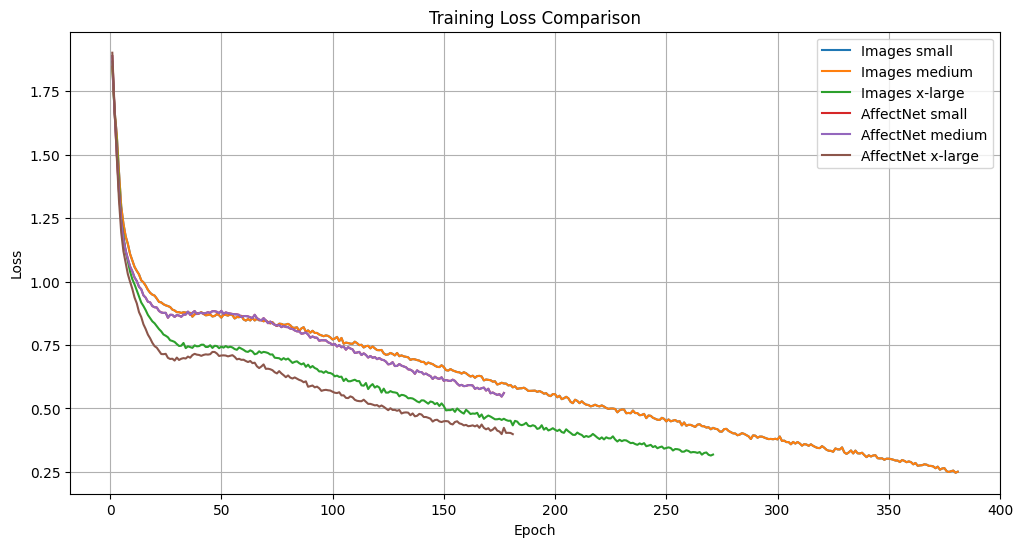

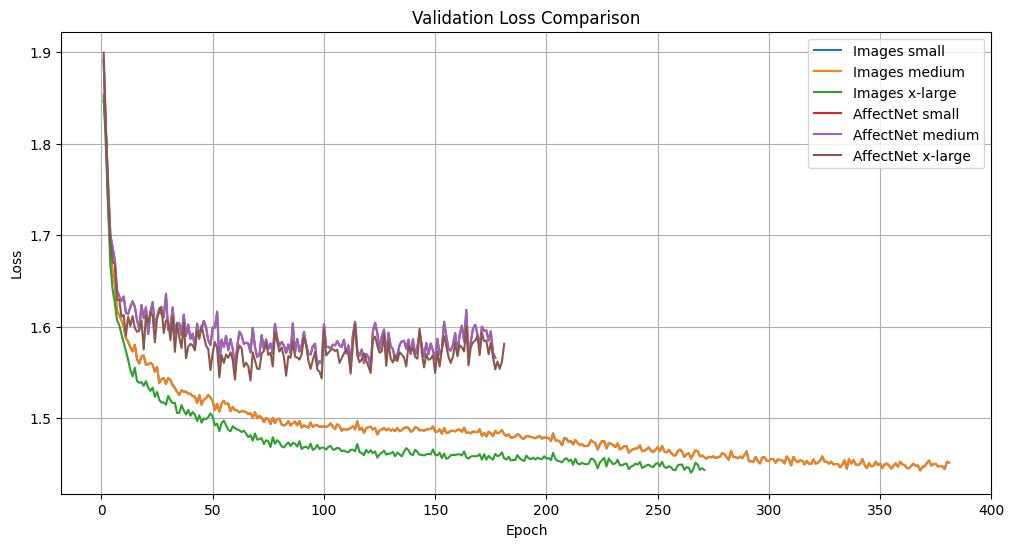

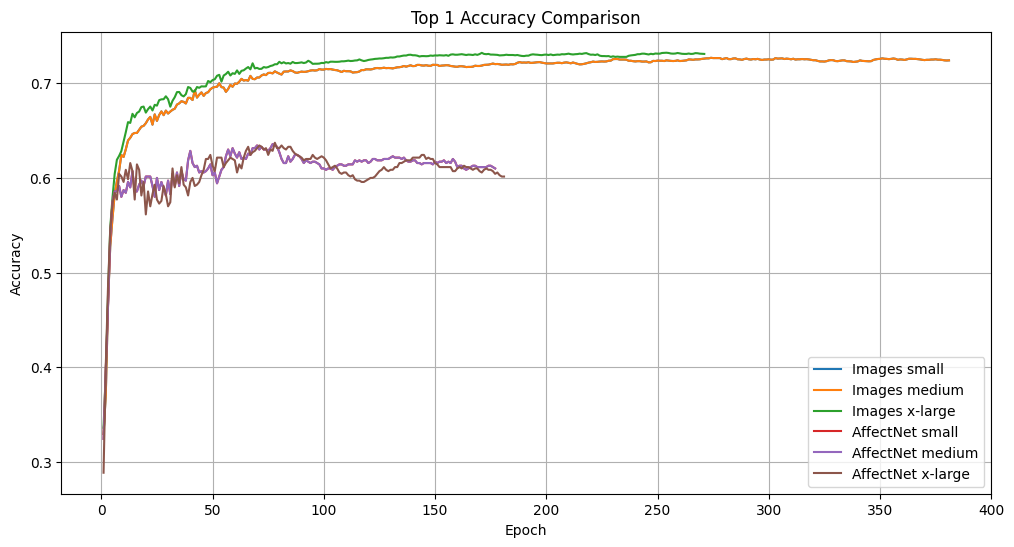

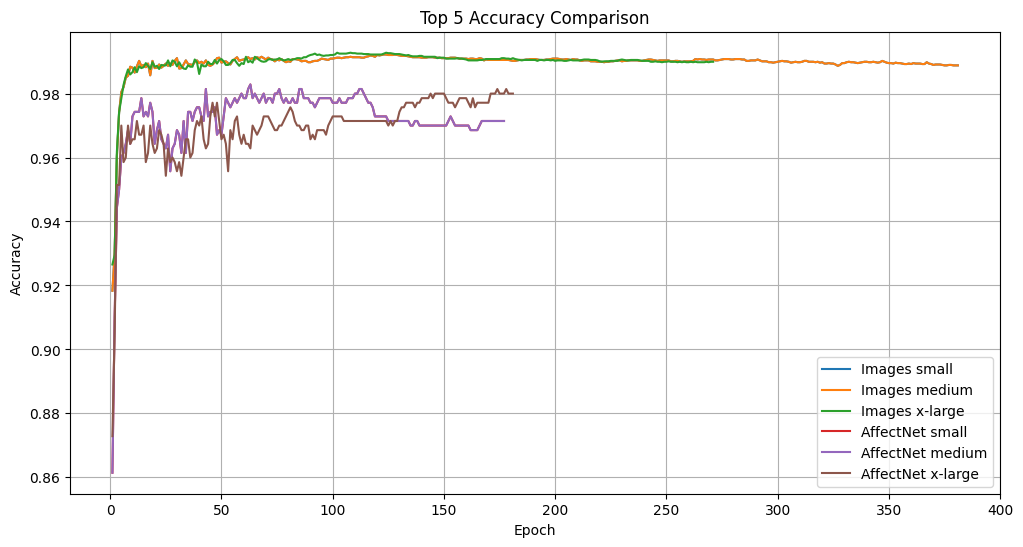

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df_images_n['epoch'], df_images_n['train/loss'], label='Images small')
plt.plot(df_images_m['epoch'], df_images_m['train/loss'], label='Images medium')
plt.plot(df_images_x['epoch'], df_images_x['train/loss'], label='Images x-large')
plt.plot(df_affectnet_n['epoch'], df_affectnet_n['train/loss'], label='AffectNet small')
plt.plot(df_affectnet_m['epoch'], df_affectnet_m['train/loss'], label='AffectNet medium')
plt.plot(df_affectnet_x['epoch'], df_affectnet_x['train/loss'], label='AffectNet x-large')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_images_n['epoch'], df_images_n['val/loss'], label='Images small')
plt.plot(df_images_m['epoch'], df_images_m['val/loss'], label='Images medium')
plt.plot(df_images_x['epoch'], df_images_x['val/loss'], label='Images x-large')
plt.plot(df_affectnet_n['epoch'], df_affectnet_n['val/loss'], label='AffectNet small')
plt.plot(df_affectnet_m['epoch'], df_affectnet_m['val/loss'], label='AffectNet medium')
plt.plot(df_affectnet_x['epoch'], df_affectnet_x['val/loss'], label='AffectNet x-large')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_images_n['epoch'], df_images_n['metrics/accuracy_top1'], label='Images small')
plt.plot(df_images_m['epoch'], df_images_m['metrics/accuracy_top1'], label='Images medium')
plt.plot(df_images_x['epoch'], df_images_x['metrics/accuracy_top1'], label='Images x-large')
plt.plot(df_affectnet_n['epoch'], df_affectnet_n['metrics/accuracy_top1'], label='AffectNet small')
plt.plot(df_affectnet_m['epoch'], df_affectnet_m['metrics/accuracy_top1'], label='AffectNet medium')
plt.plot(df_affectnet_x['epoch'], df_affectnet_x['metrics/accuracy_top1'], label='AffectNet x-large')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Top 1 Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_images_n['epoch'], df_images_n['metrics/accuracy_top5'], label='Images small')
plt.plot(df_images_m['epoch'], df_images_m['metrics/accuracy_top5'], label='Images medium')
plt.plot(df_images_x['epoch'], df_images_x['metrics/accuracy_top5'], label='Images x-large')
plt.plot(df_affectnet_n['epoch'], df_affectnet_n['metrics/accuracy_top5'], label='AffectNet small')
plt.plot(df_affectnet_m['epoch'], df_affectnet_m['metrics/accuracy_top5'], label='AffectNet medium')
plt.plot(df_affectnet_x['epoch'], df_affectnet_x['metrics/accuracy_top5'], label='AffectNet x-large')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Top 5 Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

PREDICTION

In [10]:
import cv2
import time

In [11]:
base_name_n_path = '../data/images_classifier_nano/train/weights/best.pt'
base_name_m_path = '../data/images_classifier_medium/train/weights/best.pt'
base_name_x_path = '../data/images_classifier_large/train/weights/best.pt'
affectnet_name_n_path = '../data/affectnet_classifier_nano/train/weights/best.pt'
affectnet_name_m_path = '../data/affectnet_classifier_medium/train/weights/best.pt'
affectnet_name_x_path = '../data/affectnet_classifier_large/train/weights/best.pt'


base_model_n = YOLO(base_name_n_path)
base_model_n.to(device)

base_model_m = YOLO(base_name_m_path)
base_model_m.to(device)

base_model_x = YOLO(base_name_x_path)
base_model_x.to(device)

affectnet_model_n = YOLO(affectnet_name_n_path)
affectnet_model_n.to(device)

affectnet_model_m = YOLO(affectnet_name_m_path)
affectnet_model_m.to(device)

affectnet_model_x = YOLO(affectnet_name_x_path)
affectnet_model_x.to(device)

YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 80, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(400, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(160, eps=1e-05, momentum=0.1, affine=True, track_

In [22]:
def predict(video_path, model):
    
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Erreur : Impossible d'ouvrir la vidéo")
        exit()
    
    results = []
    stats = []
    
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    video_duration = total_frames / fps
    
    stats.append(total_frames)
    stats.append(fps)
    stats.append(video_duration)
    
    start_time = time.time()
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
            
        resized_frame = cv2.resize(frame, (256, 256))
        normalized_frame = resized_frame / 255.0
        img = torch.tensor(normalized_frame).permute(2, 0, 1).unsqueeze(0).float().to(device)
    
        prediction = model(img)
        
        top1_class_index = prediction[0].probs.top1
        label = prediction[0].names[top1_class_index]
        confidence = prediction[0].probs.top1conf.item()
        
        results.append((label, confidence))
        
    end_time = time.time()
    total_time = end_time - start_time
    
    stats.append(total_time)
        
    cap.release()
    cv2.destroyAllWindows()
        
    return results, stats

In [13]:
video_path = '../data/raw.mp4'

In [23]:
results_base_n, stats_base_n = predict(video_path, base_model_n)
results_base_m, stats_base_m = predict(video_path, base_model_m)
results_base_x, stats_base_x = predict(video_path, base_model_x)
results_affectnet_n, stats_affectnet_n = predict(video_path, affectnet_model_n)
results_affectnet_m, stats_affectnet_m = predict(video_path, affectnet_model_m)
results_affectnet_x, stats_affectnet_x = predict(video_path, affectnet_model_x)


0: 256x256 neutral 0.54, fear 0.14, happy 0.11, sad 0.09, surprise 0.09, 31.0ms
Speed: 0.0ms preprocess, 31.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 neutral 0.54, fear 0.14, happy 0.11, sad 0.09, surprise 0.09, 18.0ms
Speed: 0.0ms preprocess, 18.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 neutral 0.55, fear 0.14, happy 0.10, sad 0.09, surprise 0.09, 15.0ms
Speed: 0.0ms preprocess, 15.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 neutral 0.55, fear 0.14, happy 0.10, sad 0.09, surprise 0.08, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 neutral 0.54, fear 0.14, happy 0.11, sad 0.09, surprise 0.09, 13.0ms
Speed: 0.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 neutral 0.53, fear 0.14, happy 0.11, sad 0.09, surprise 0.09, 12.0ms
Speed: 0.0ms preprocess, 12.0

In [26]:
print('Base Nano Model')
print(f'Temps total de traitement: {stats_base_n[3]:.2f} secondes')
print(f'Durée de la vidéo: {stats_base_n[2]:.2f} secondes')
print(f'Temps de traitement par cadre: {stats_base_n[3] / stats_base_n[0]:.4f} secondes par cadre\n')

print('Base Medium Model')
print(f'Temps total de traitement: {stats_base_m[3]:.2f} secondes')
print(f'Durée de la vidéo: {stats_base_m[2]:.2f} secondes')
print(f'Temps de traitement par cadre: {stats_base_m[3] / stats_base_m[0]:.4f} secondes par cadre\n')

print('Base Large Model')
print(f'Temps total de traitement: {stats_base_x[3]:.2f} secondes')
print(f'Durée de la vidéo: {stats_base_x[2]:.2f} secondes')
print(f'Temps de traitement par cadre: {stats_base_x[3] / stats_base_x[0]:.4f} secondes par cadre\n')

print('AffectNet Nano Model')
print(f'Temps total de traitement: {stats_affectnet_n[3]:.2f} secondes')
print(f'Durée de la vidéo: {stats_affectnet_n[2]:.2f} secondes')
print(f'Temps de traitement par cadre: {stats_affectnet_n[3] / stats_affectnet_n[0]:.4f} secondes par cadre\n')

print('AffectNet Medium Model')
print(f'Temps total de traitement: {stats_affectnet_m[3]:.2f} secondes')
print(f'Durée de la vidéo: {stats_affectnet_m[2]:.2f} secondes')
print(f'Temps de traitement par cadre: {stats_affectnet_m[3] / stats_affectnet_m[0]:.4f} secondes par cadre\n')

print('AffectNet Large Model')
print(f'Temps total de traitement: {stats_affectnet_x[3]:.2f} secondes')
print(f'Durée de la vidéo: {stats_affectnet_x[2]:.2f} secondes')
print(f'Temps de traitement par cadre: {stats_affectnet_x[3] / stats_affectnet_x[0]:.4f} secondes par cadre')

Base Nano Model
Temps total de traitement: 34.38 secondes
Durée de la vidéo: 147.07 secondes
Temps de traitement par cadre: 0.0078 secondes par cadre

Base Medium Model
Temps total de traitement: 33.52 secondes
Durée de la vidéo: 147.07 secondes
Temps de traitement par cadre: 0.0076 secondes par cadre

Base Large Model
Temps total de traitement: 37.19 secondes
Durée de la vidéo: 147.07 secondes
Temps de traitement par cadre: 0.0084 secondes par cadre

AffectNet Nano Model
Temps total de traitement: 34.21 secondes
Durée de la vidéo: 147.07 secondes
Temps de traitement par cadre: 0.0078 secondes par cadre

AffectNet Medium Model
Temps total de traitement: 34.60 secondes
Durée de la vidéo: 147.07 secondes
Temps de traitement par cadre: 0.0078 secondes par cadre

AffectNet Large Model
Temps total de traitement: 38.70 secondes
Durée de la vidéo: 147.07 secondes
Temps de traitement par cadre: 0.0088 secondes par cadre


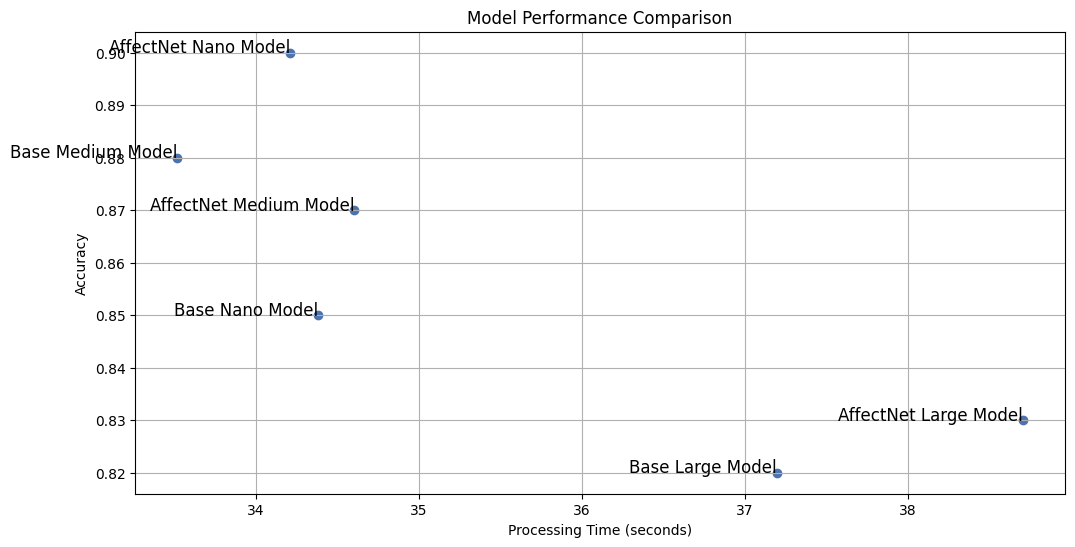

In [25]:
model_names = ['Base Nano Model', 'Base Medium Model', 'Base Large Model', 'AffectNet Nano Model', 'AffectNet Medium Model', 'AffectNet Large Model']
accuracies = [0.85, 0.88, 0.82, 0.90, 0.87, 0.83]
processing_times = [stats_base_n[3], stats_base_m[3], stats_base_x[3], stats_affectnet_n[3], stats_affectnet_m[3], stats_affectnet_x[3]]

plt.figure(figsize=(12, 6))
plt.scatter(processing_times, accuracies, color='b', marker='o')

for i, model_name in enumerate(model_names):
    plt.text(processing_times[i], accuracies[i], model_name, fontsize=12, ha='right')

plt.xlabel('Processing Time (seconds)')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.grid(True)
plt.show()

In [33]:
def plot_results(results, name):
    df_results = pd.DataFrame(results, columns=['label', 'confidence'])
    plt.figure(figsize=(6, 3))
    df_results['label'].value_counts().plot(kind='bar')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.title('Emotion Distribution in results from model {}'.format(name))

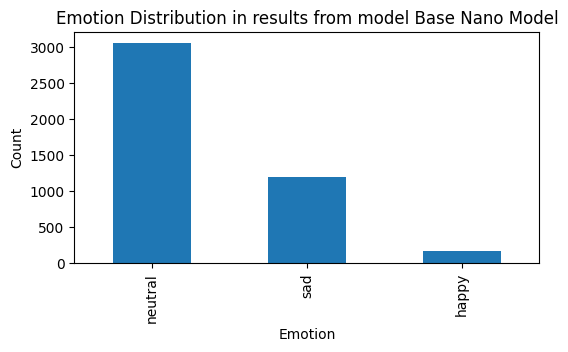

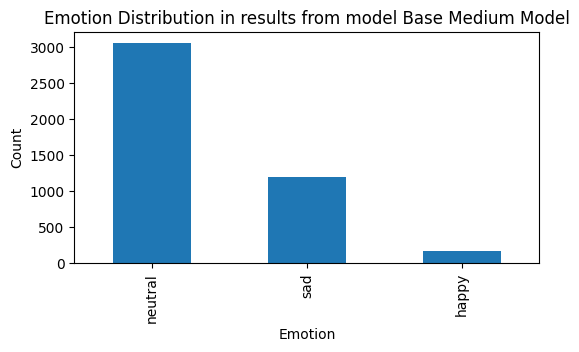

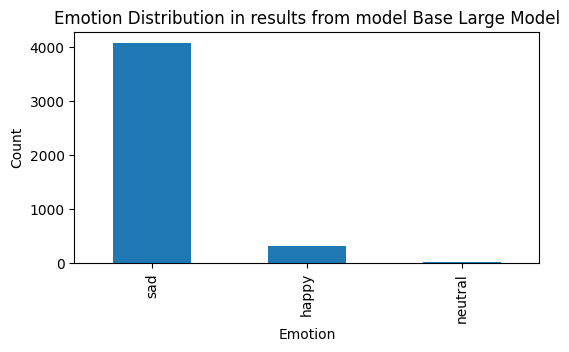

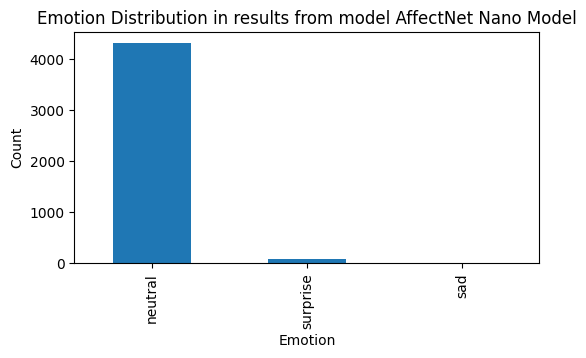

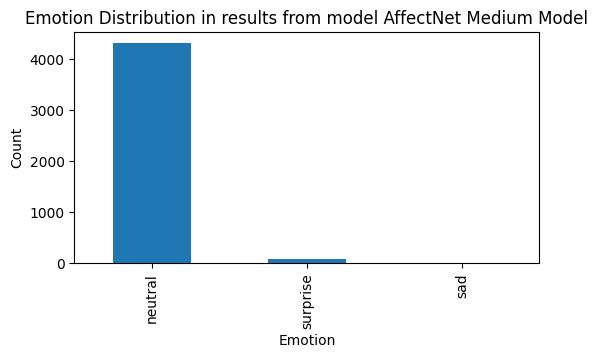

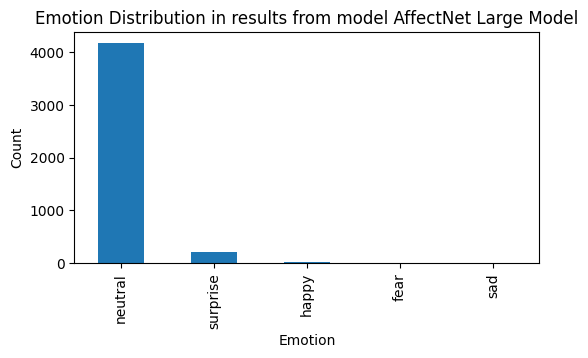

In [34]:
plot_results(results_base_n, 'Base Nano Model')
plot_results(results_base_m, 'Base Medium Model')
plot_results(results_base_x, 'Base Large Model')
plot_results(results_affectnet_n, 'AffectNet Nano Model')
plot_results(results_affectnet_m, 'AffectNet Medium Model')
plot_results(results_affectnet_x, 'AffectNet Large Model')